In [3]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
from auxPlots import selectColor, xSecTest
from aux import getInfo, getLHEevents, getDistributions


pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [4]:
#Reading files
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/*/*.npz'))
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/sm/*/*.npz'))
data = []
bias_2k_2 = []
bias_2k_4 = []
data_sm = []
#Loading the distributions
for f in files + sm_files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        if '2k_2' in f:
            bias_2k_2.append(aux)
        elif '2k_4' in f:
            bias_2k_4.append(aux)
        else:
            data_sm.append(aux)
        
    else:
        data.append(aux)
        
data_sm.append(bias_2k_2)
data_sm.append(bias_2k_4)

data = sorted(data, key=lambda d: d['mass_params'][0])

In [5]:
print(data[0]['mass_params'])
xSecTest(data + data_sm[-1] + data_sm[-2], True)

[200. 190.]
EFT $g g \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.448410520 sum of weights = 0.448410524 
EFT $q q \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.411134550 sum of weights = 0.411134551 
1-loop VLF $g g \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.957700000 sum of weights = 0.957700000 
1-loop VLF $q q \to t \bar{t}$  mPsiT: 200.0, mSDM: 190.0 Result: Passed
xsec = 0.438900000 sum of weights = 0.438900000 
EFT $g g \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.199104380 sum of weights = 0.199104381 
EFT $q q \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.183055000 sum of weights = 0.183055003 
1-loop VLF $g g \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.405000000 sum of weights = 0.405000000 
1-loop VLF $q q \to t \bar{t}$  mPsiT: 300.0, mSDM: 285.0 Result: Passed
xsec = 0.250900000 sum of weights = 0.250900000 
EFT $g g \to t \bar{t}$  mPsiT: 400.0, m

In [6]:
 for d in data:
    print(d['mass_params'][0], d['model'], d['process'], d['nevents'])

200.0 EFT $g g \to t \bar{t}$ 100000
200.0 EFT $q q \to t \bar{t}$ 100000
200.0 1-loop VLF $g g \to t \bar{t}$ 51527
200.0 1-loop VLF $q q \to t \bar{t}$ 138105
300.0 EFT $g g \to t \bar{t}$ 100000
300.0 EFT $q q \to t \bar{t}$ 100000
300.0 1-loop VLF $g g \to t \bar{t}$ 51431
300.0 1-loop VLF $q q \to t \bar{t}$ 60318
400.0 EFT $g g \to t \bar{t}$ 100000
400.0 EFT $q q \to t \bar{t}$ 100000
400.0 1-loop VLF $g g \to t \bar{t}$ 51484
400.0 1-loop VLF $q q \to t \bar{t}$ 51674
500.0 EFT $g g \to t \bar{t}$ 100000
500.0 EFT $q q \to t \bar{t}$ 100000
500.0 1-loop VLF $g g \to t \bar{t}$ 51501
500.0 1-loop VLF $q q \to t \bar{t}$ 43016
600.0 EFT $g g \to t \bar{t}$ 100000
600.0 EFT $q q \to t \bar{t}$ 100000
600.0 1-loop VLF $g g \to t \bar{t}$ 51438
600.0 1-loop VLF $q q \to t \bar{t}$ 51595
700.0 EFT $g g \to t \bar{t}$ 100000
700.0 EFT $q q \to t \bar{t}$ 100000
700.0 1-loop VLF $g g \to t \bar{t}$ 51442
700.0 1-loop VLF $q q \to t \bar{t}$ 60159
800.0 EFT $g g \to t \bar{t}$ 100000
80

In [7]:
print(np.arange(400.,1550.,35.))
#627.5, 977.5, 1257.5
print((627.5 / 977.5)**(-1), (977.5 / 1257.5)**(-1), (627.5 / 1257.5)**(-1) )

[ 400.  435.  470.  505.  540.  575.  610.  645.  680.  715.  750.  785.
  820.  855.  890.  925.  960.  995. 1030. 1065. 1100. 1135. 1170. 1205.
 1240. 1275. 1310. 1345. 1380. 1415. 1450. 1485. 1520.]
1.557768924302789 1.2864450127877236 2.00398406374502


KeyError: '0 is not a file in the archive'

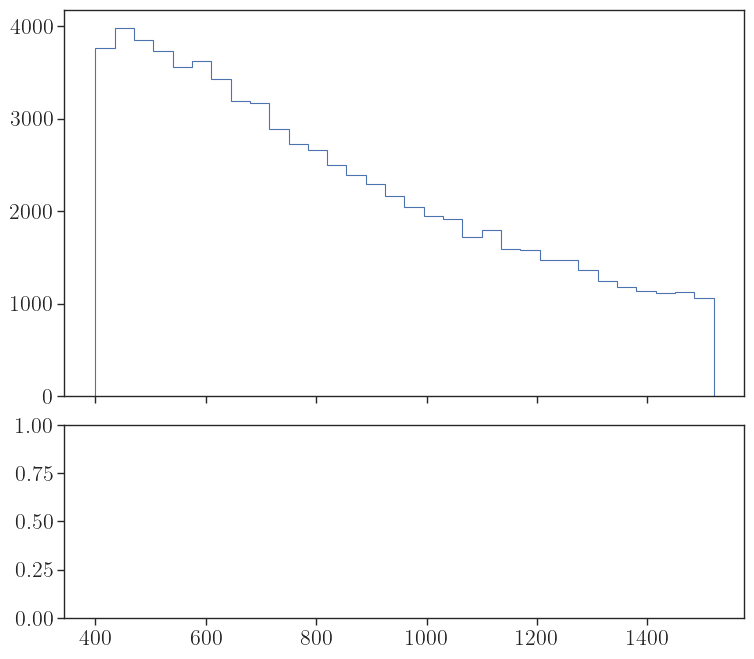

In [8]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        bins = np.arange(400.,1550.,35.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,45.)
    elif mPsiT <=2000:
        bins = np.arange(400.,3300.,75.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,75.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,75.)
    else:
        bins = np.arange(1000.,5300.,125.)

    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            counts,h = np.histogram(d['mTT'],bins=bins)
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            axarr[0].stairs(counts, h)
            
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-1.5,1.5)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\frac{d \sigma_{UV}}{d m(t\bar{t})} - \frac{d \sigma_{EFT}}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
    axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
plt.show()

# Invariant mass $qq\to t\bar{t}$

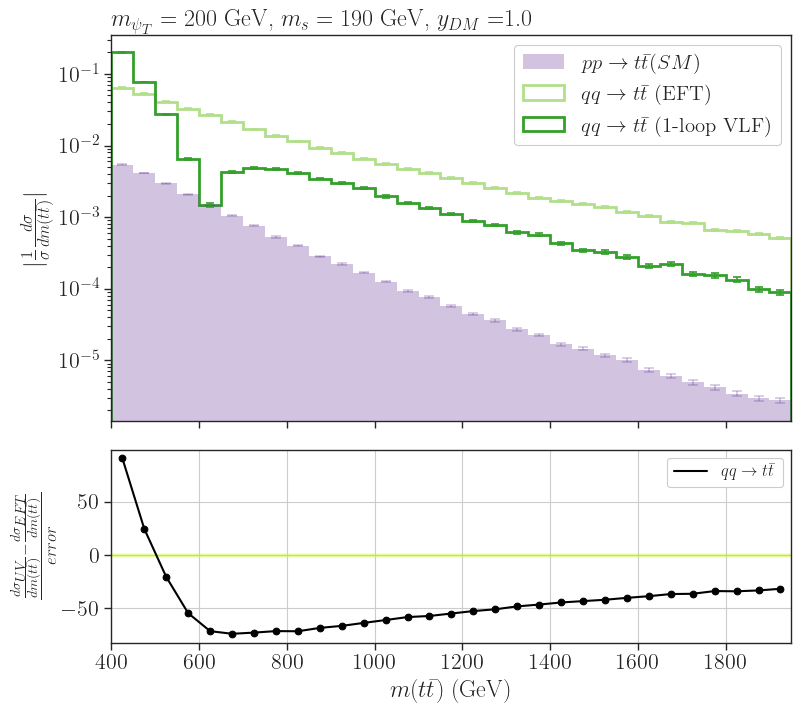

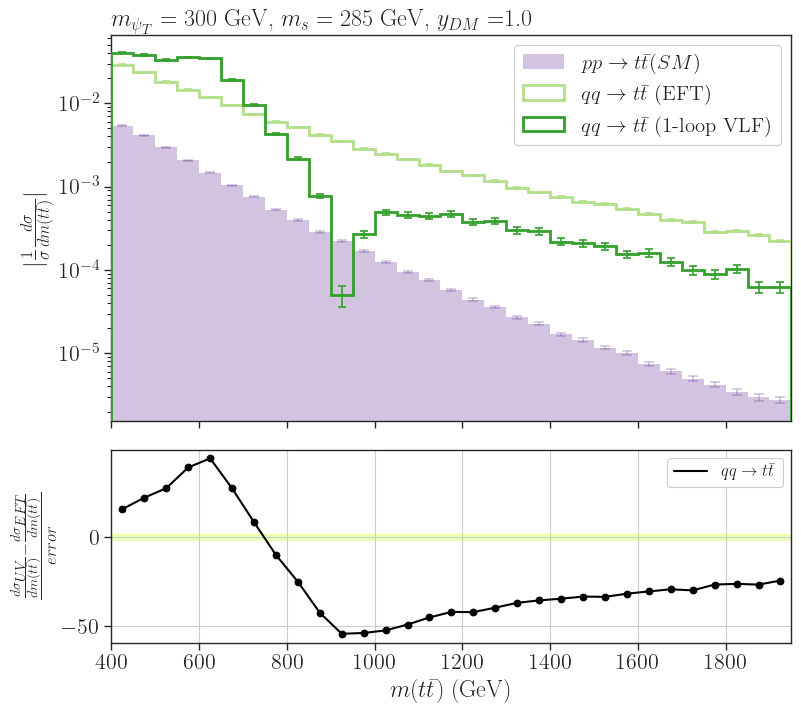

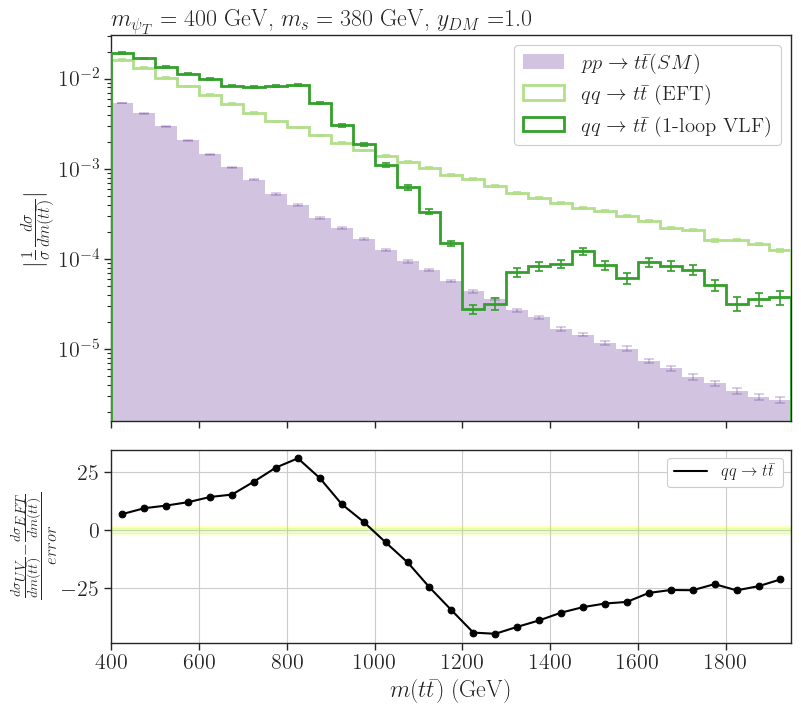

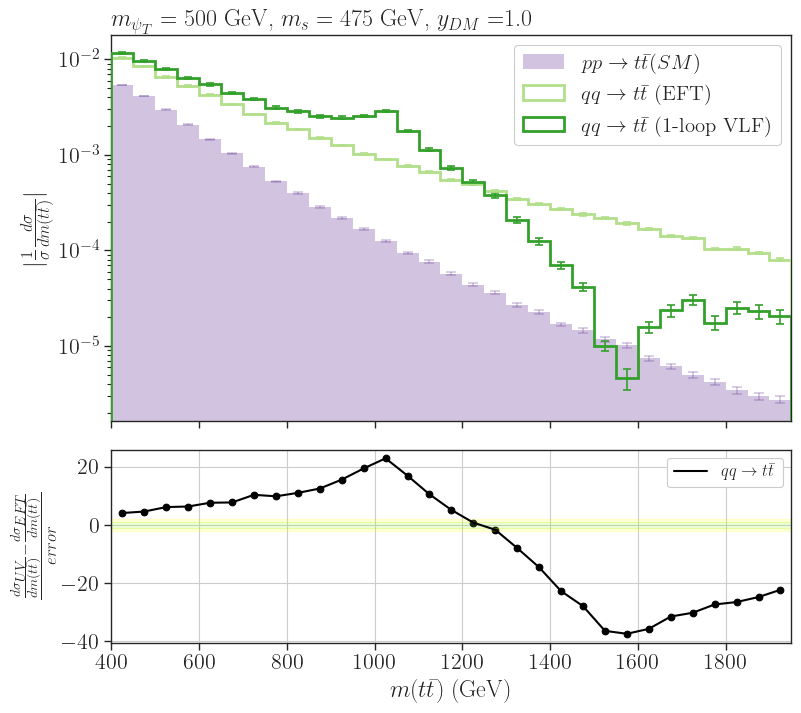

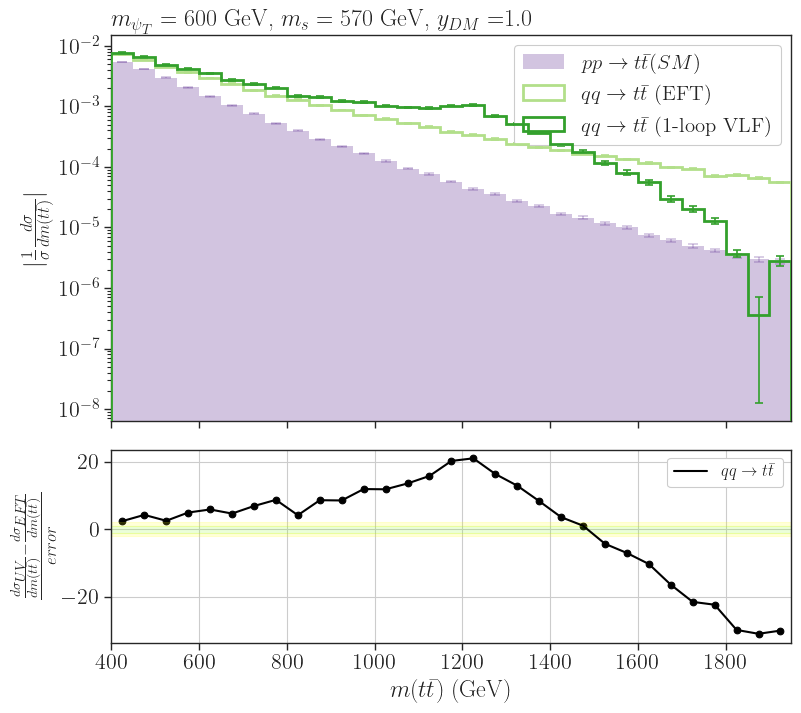

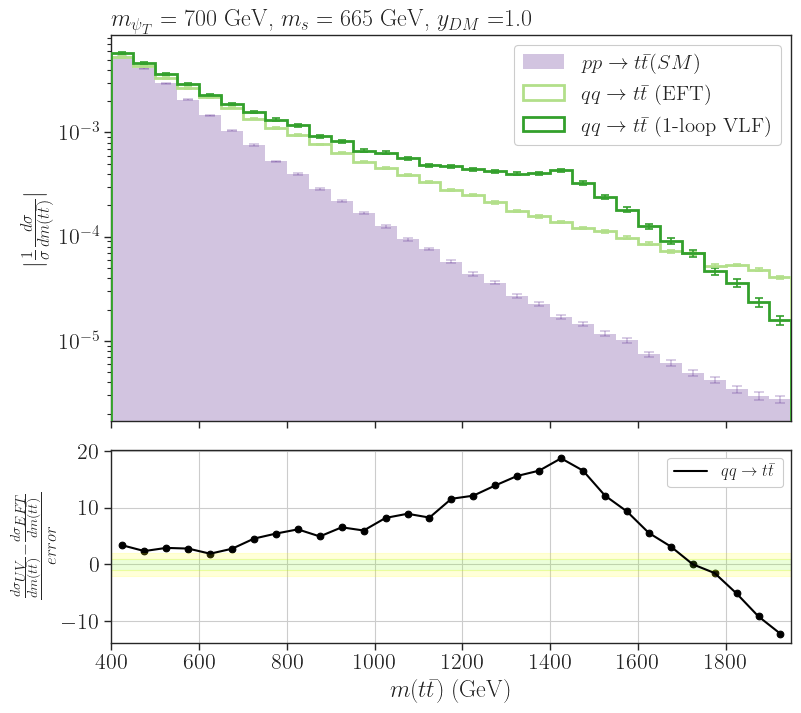

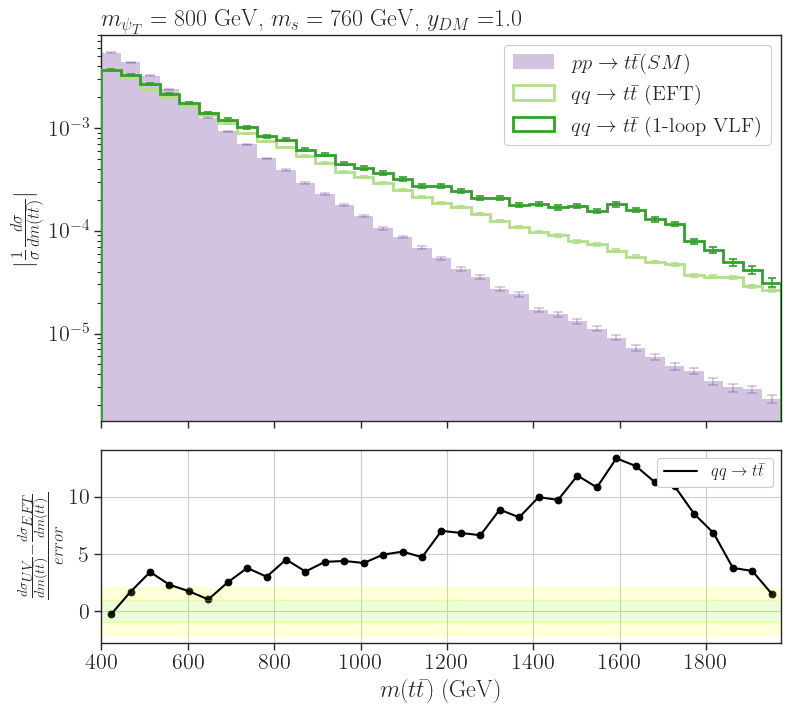

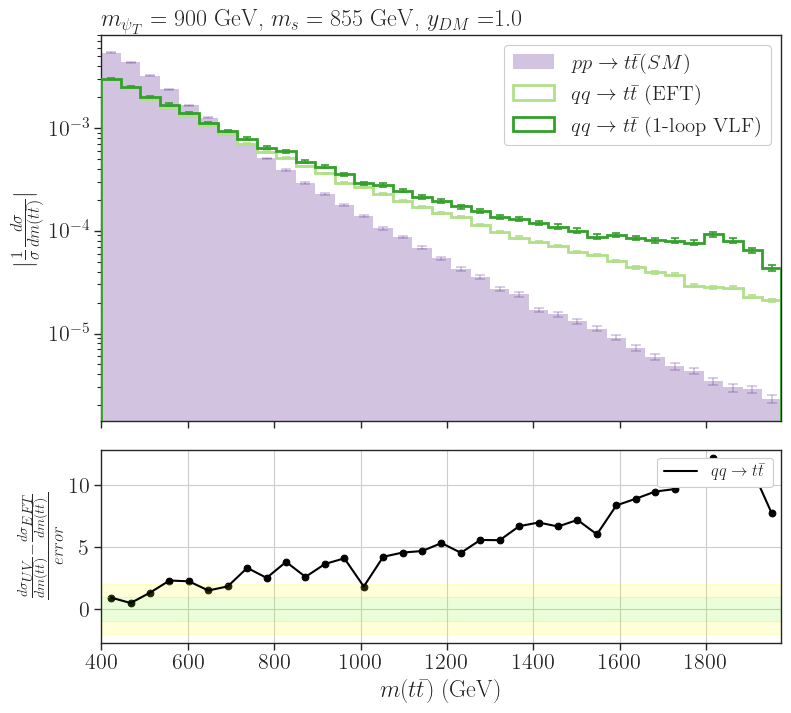

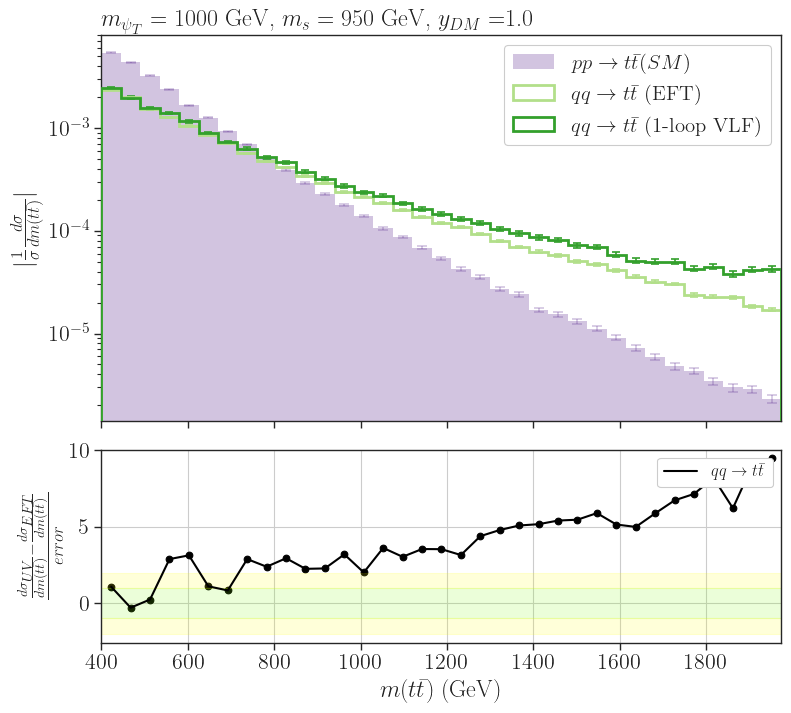

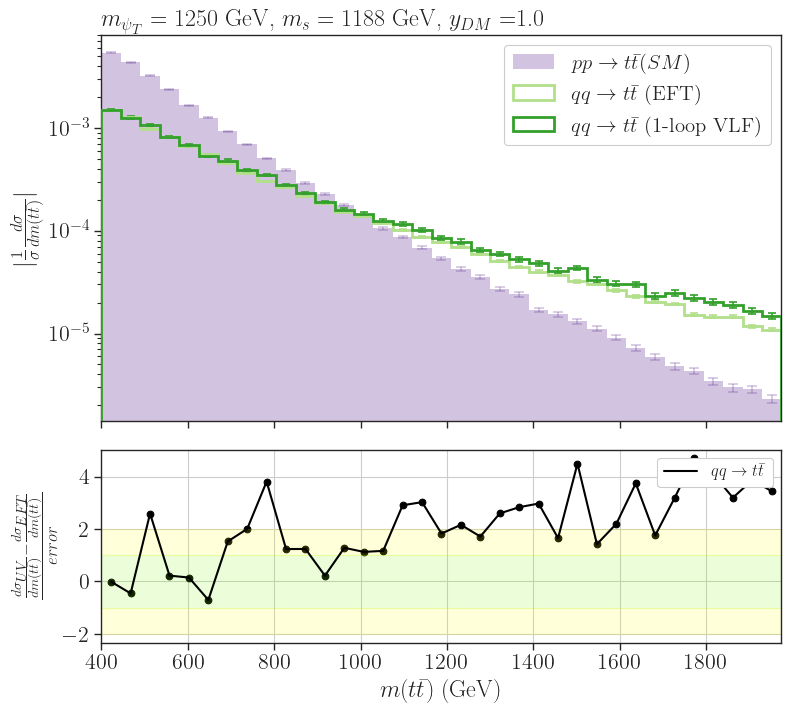

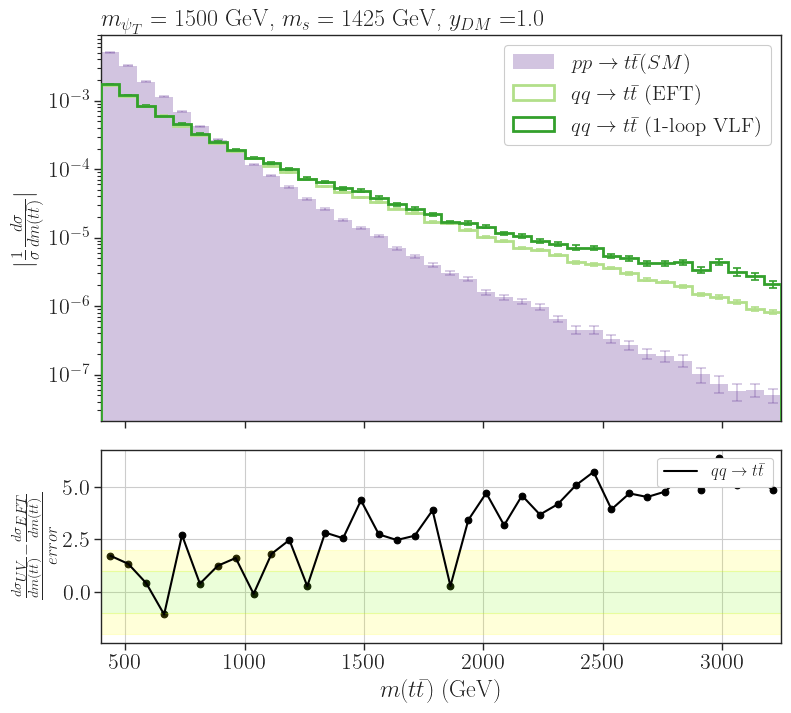

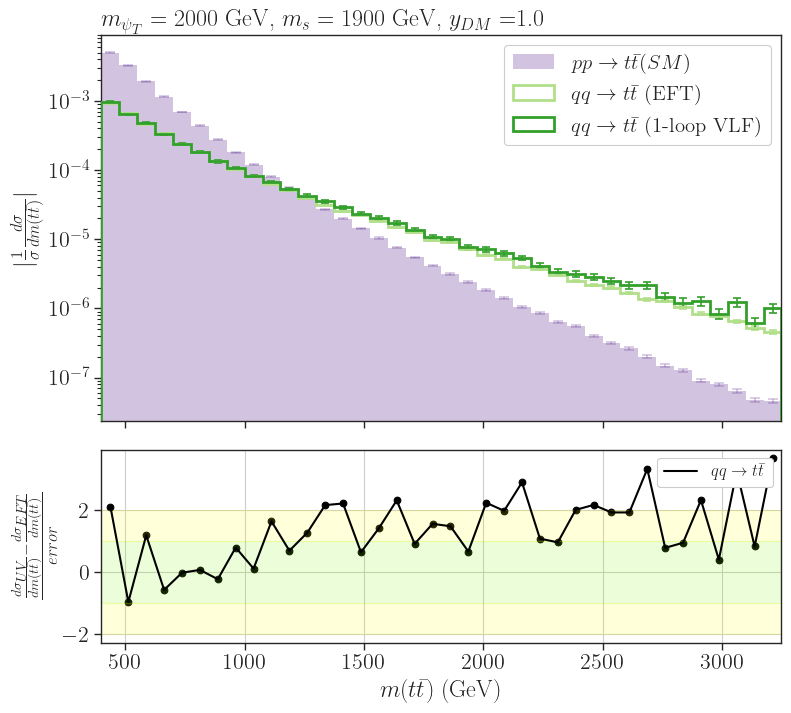

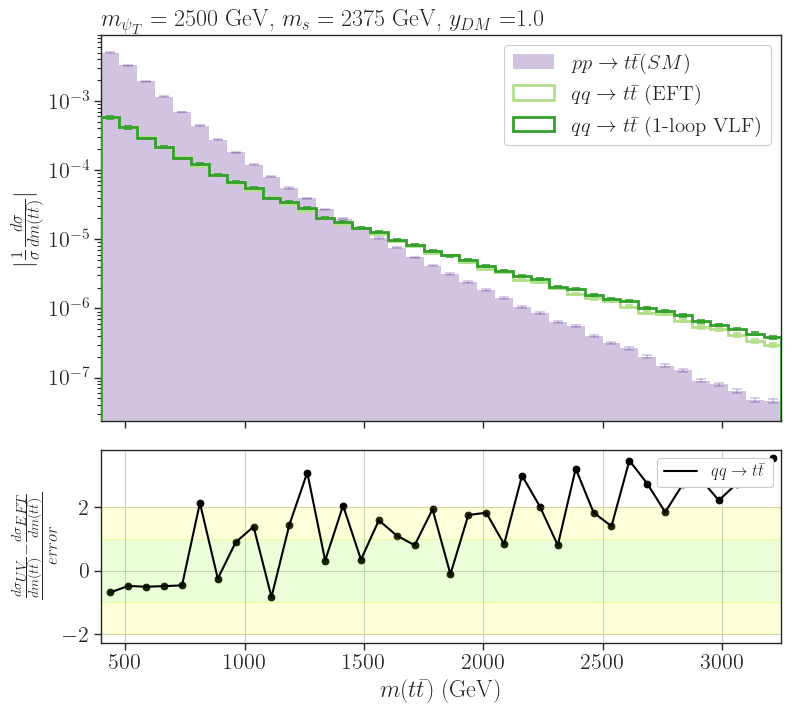

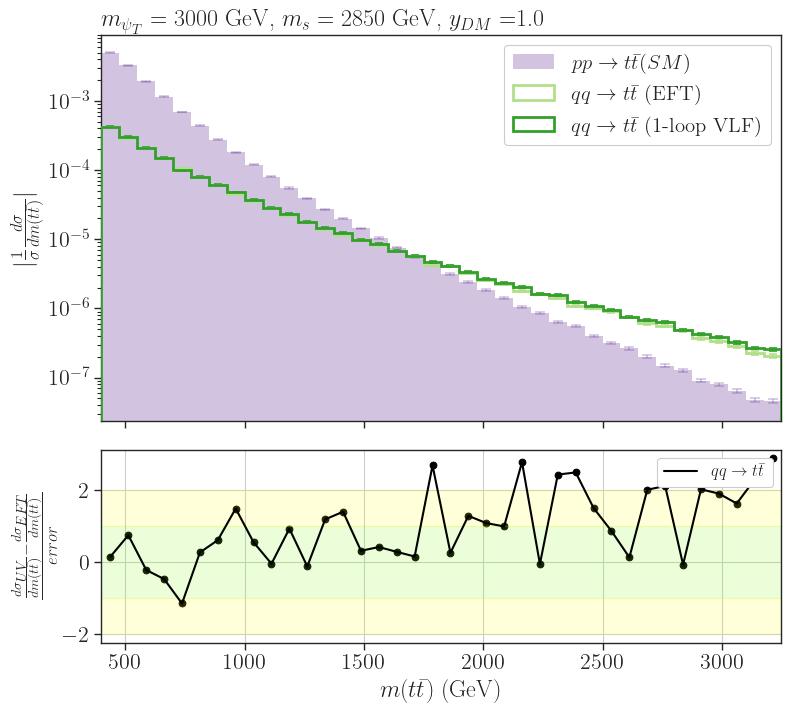

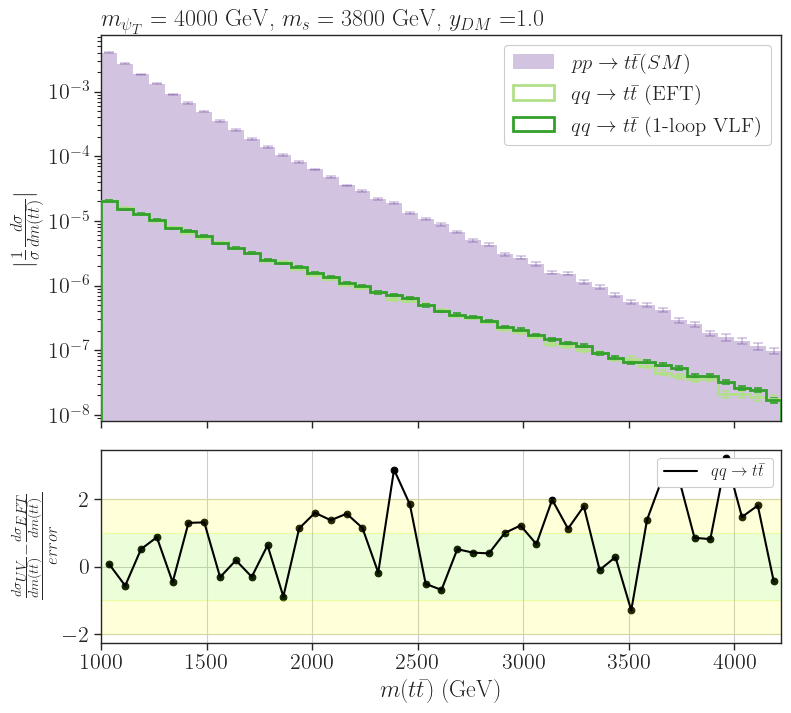

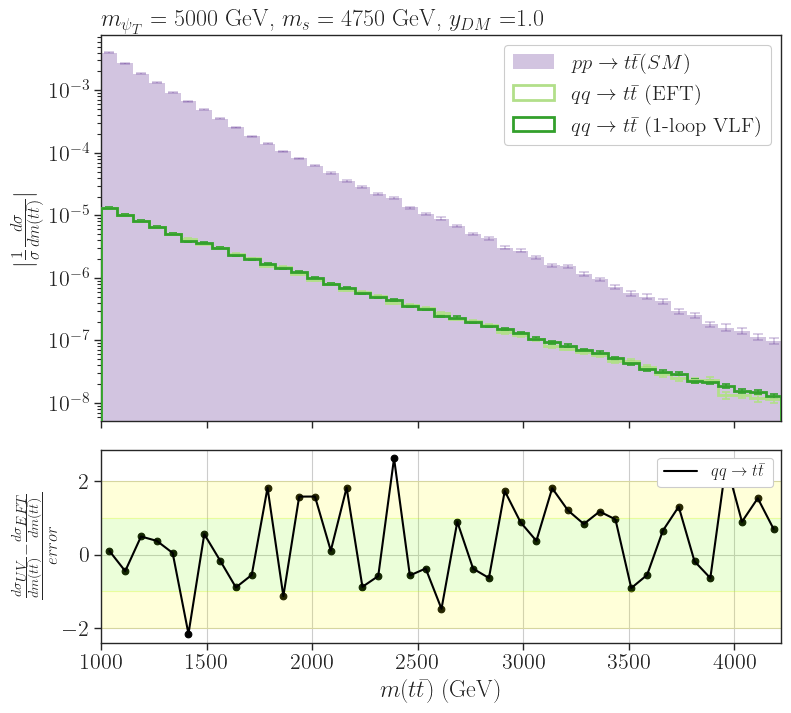

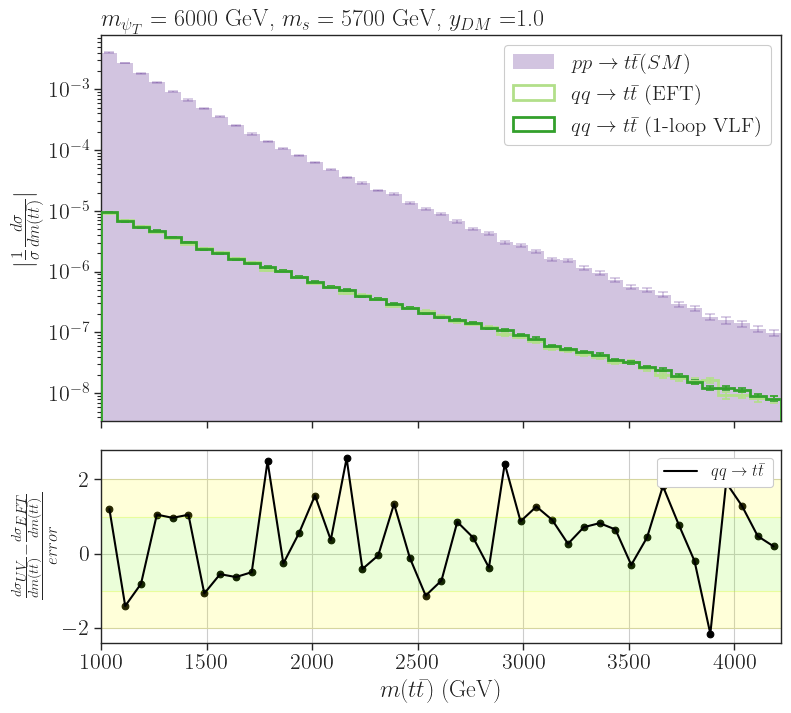

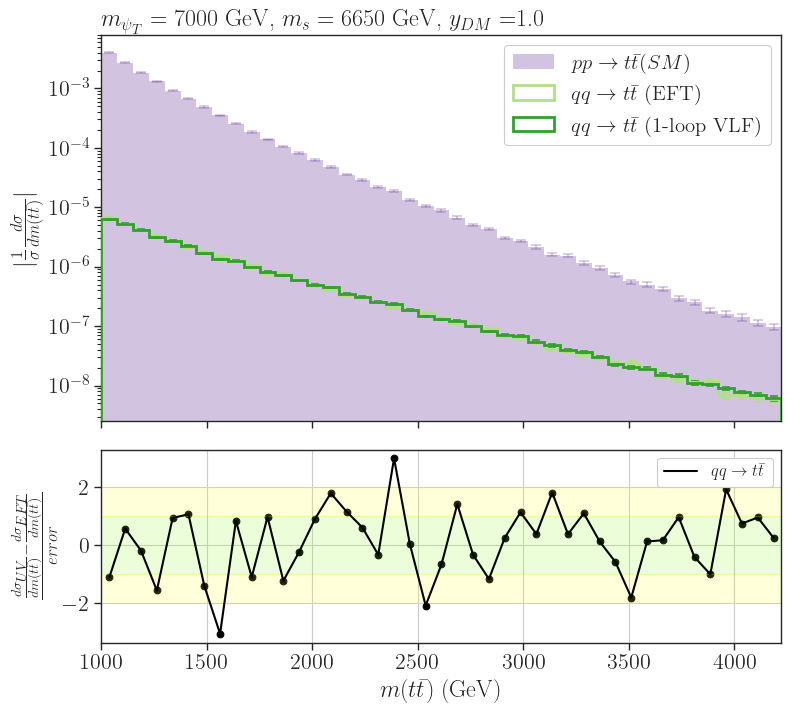

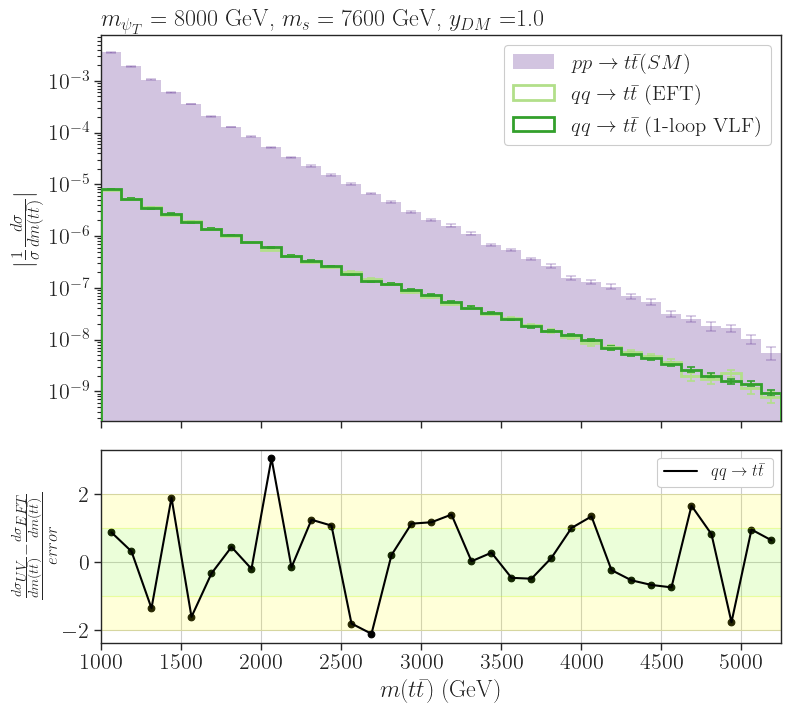

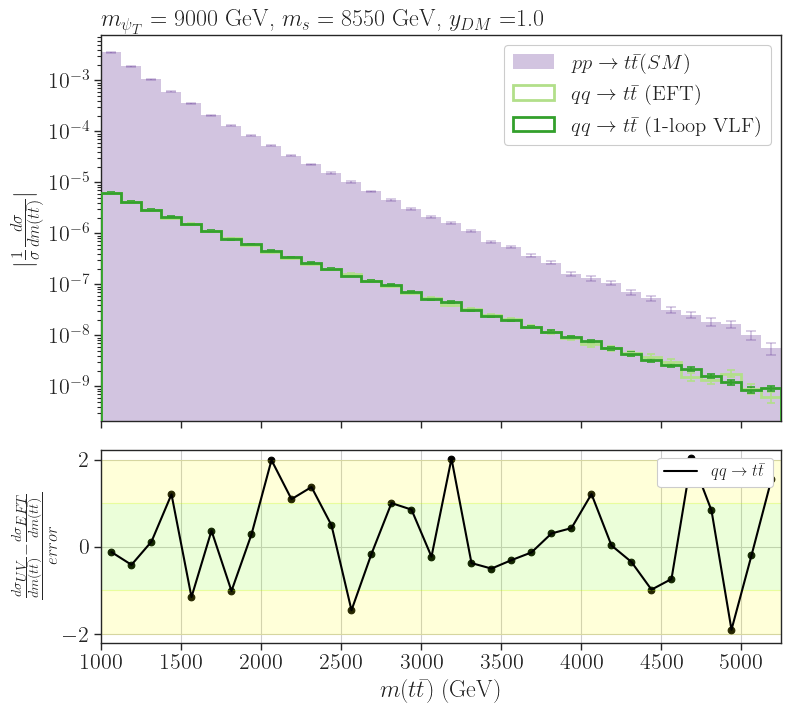

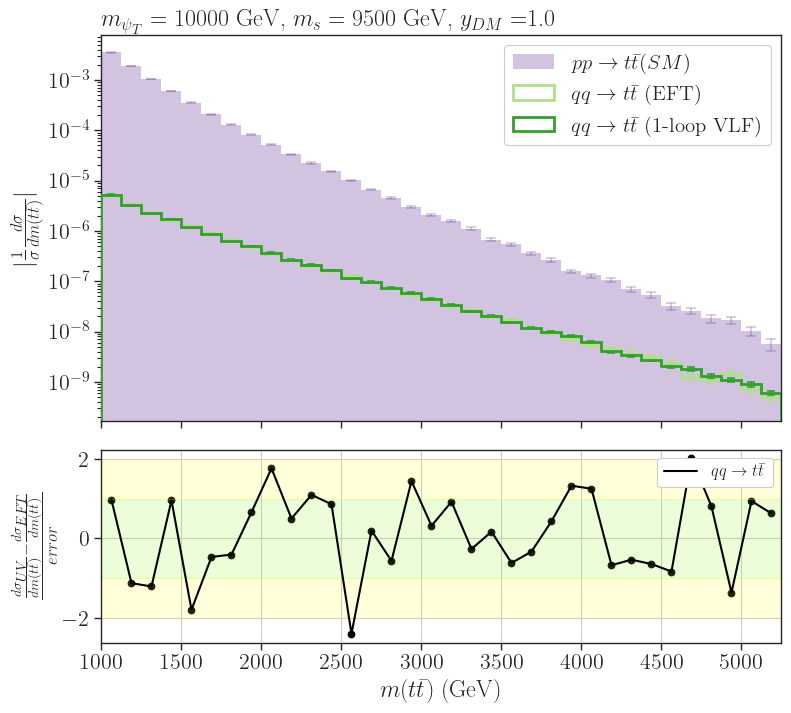

In [13]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        #bins = np.arange(400.,1550.,35.)
        bins = np.arange(400.,2000.,50.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,45.)
    elif mPsiT <=2000:
        bins = np.arange(400.,3300.,75.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,75.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,75.)
    else:
        bins = np.arange(1000.,5300.,125.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM according to the bias
    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    
    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', 
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-1.5,1.5)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\frac{d \sigma_{UV}}{d m(t\bar{t})} - \frac{d \sigma_{EFT}}{d m(t\bar{t})}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
    axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
plt.show()

# $p_T$ $qq\to t\bar{t}$

/tmp/ipykernel_6566/3341745876.py:73: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))
/tmp/ipykernel_6566/3341745876.py:115: RuntimeWarning: invalid value encountered in divide
  yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
/tmp/ipykernel_6566/3341745876.py:140: RuntimeWarning: invalid value encountered in divide
  ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
/tmp/ipykernel_6566/3341745876.py:172: RuntimeWarning: invalid value encountered in divide
  y = np.array(diff)/np.array(diff_err)
/tmp/ipykernel_6566/3341745876.py:172: RuntimeWarning: divide by zero encountered in divide
  y = np.array(diff)/np.array(diff_err)


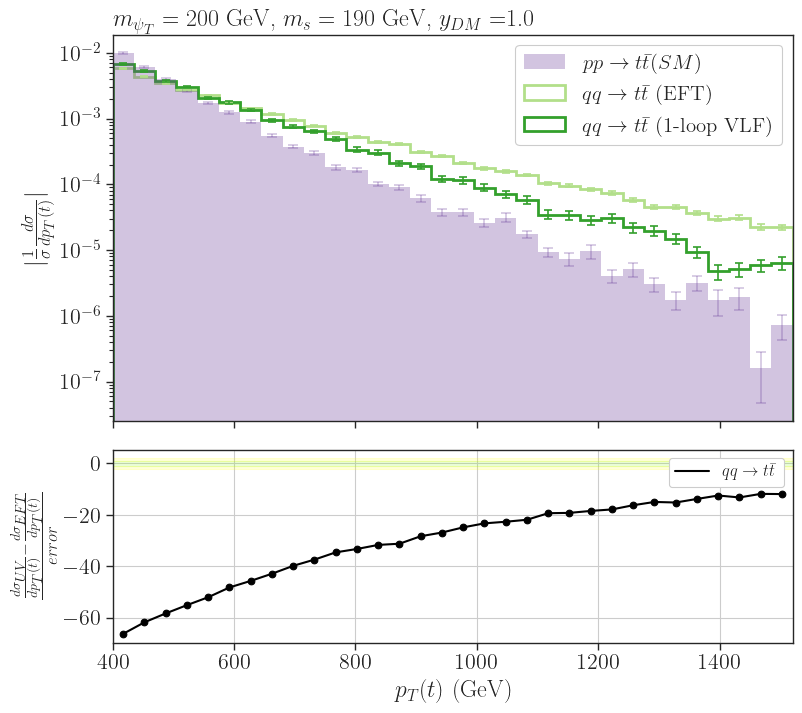

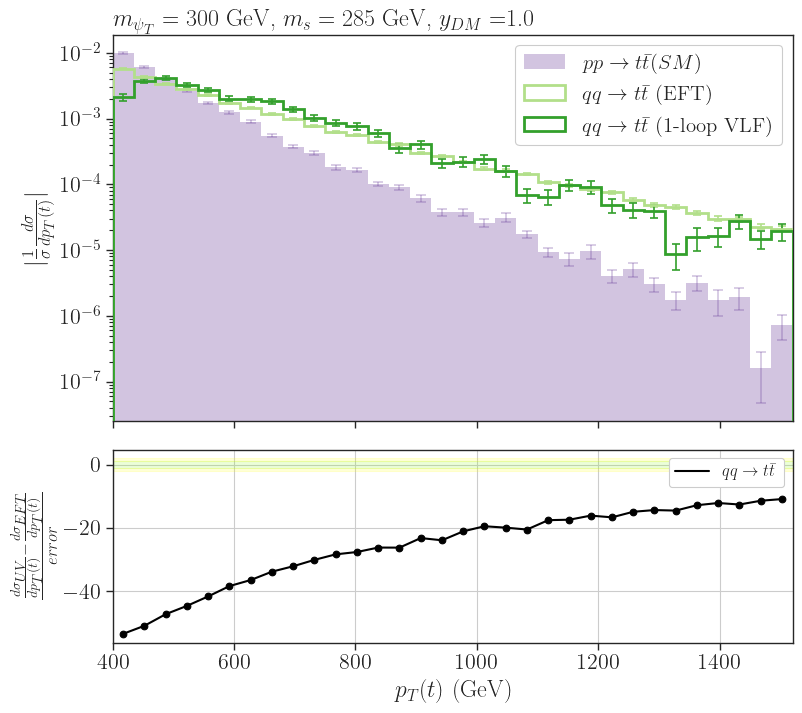

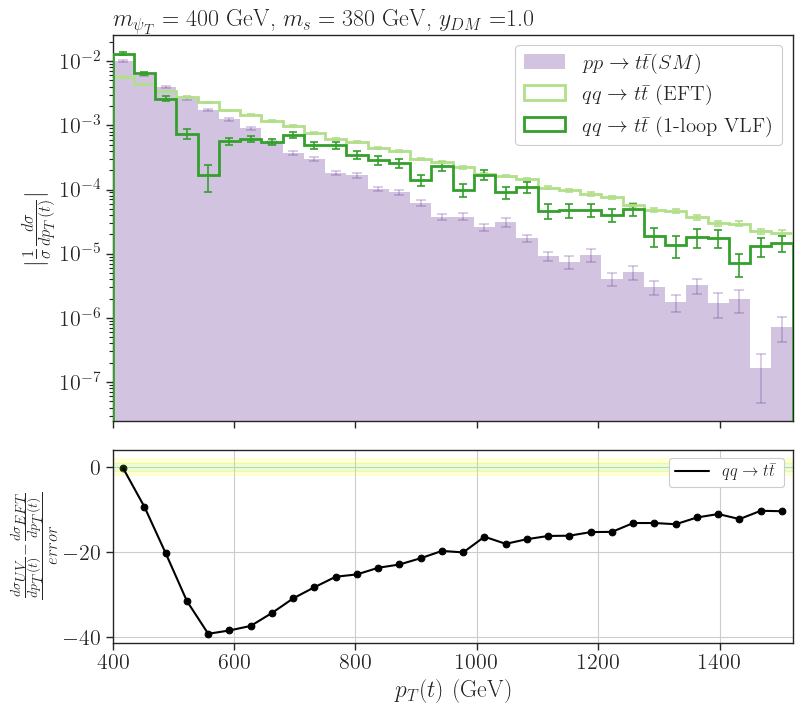

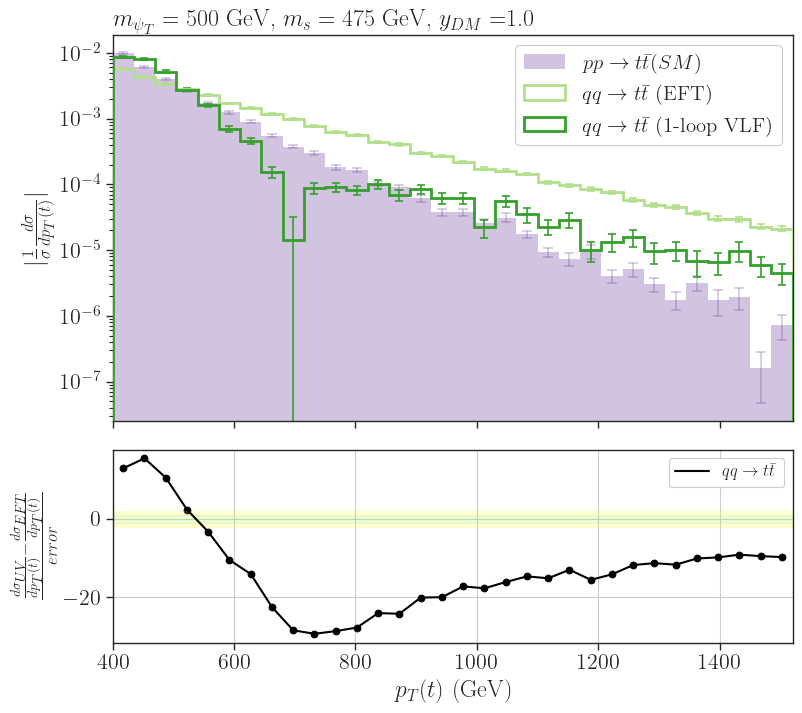

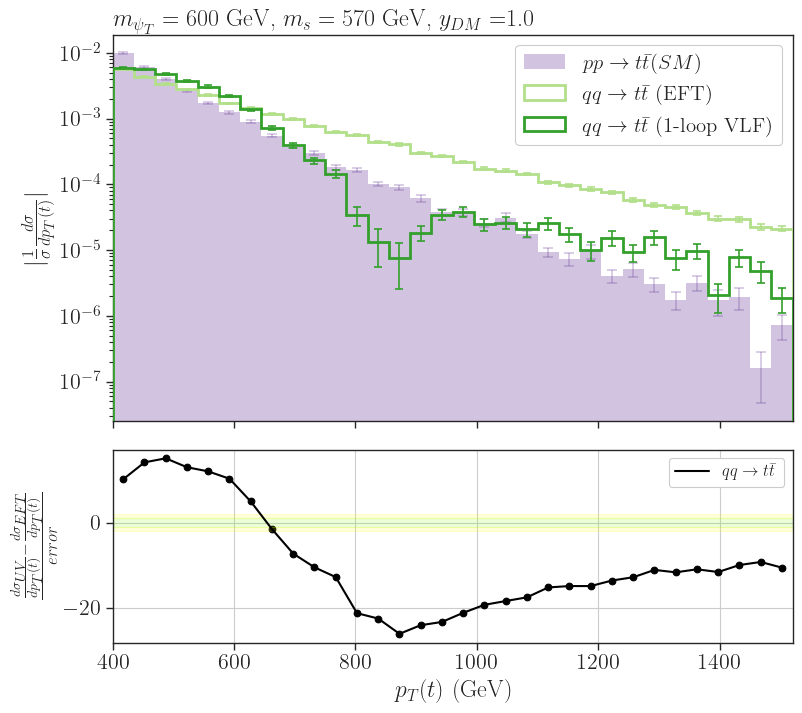

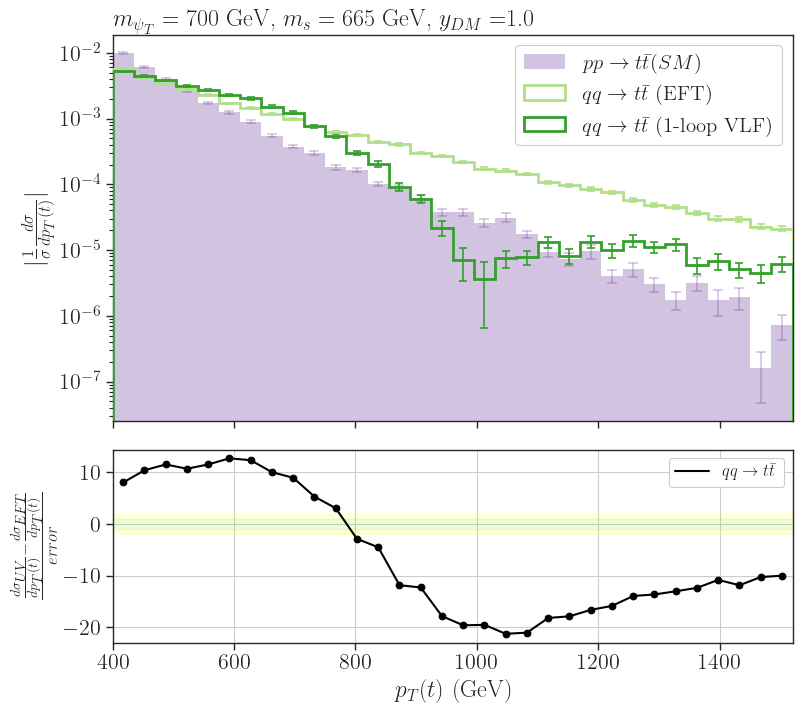

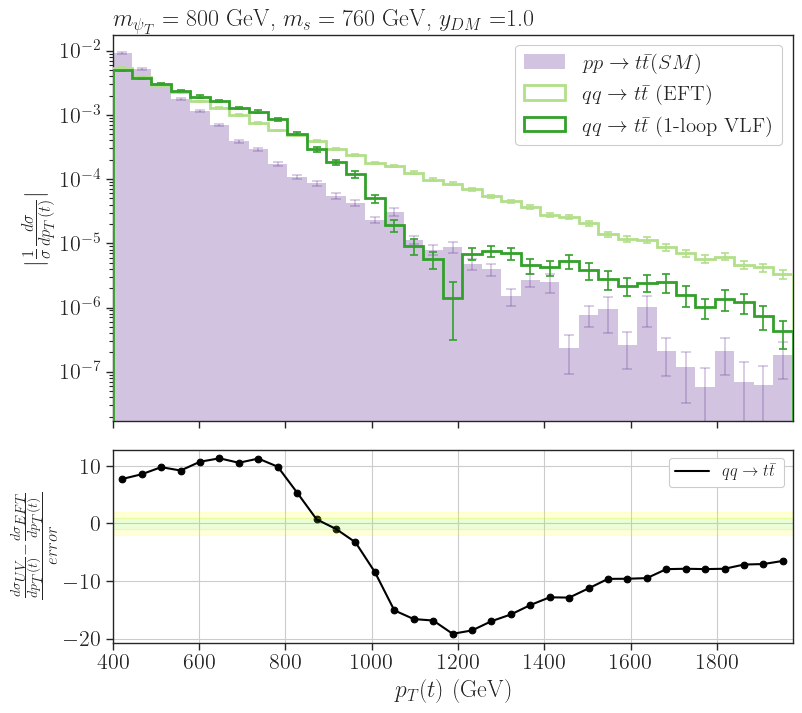

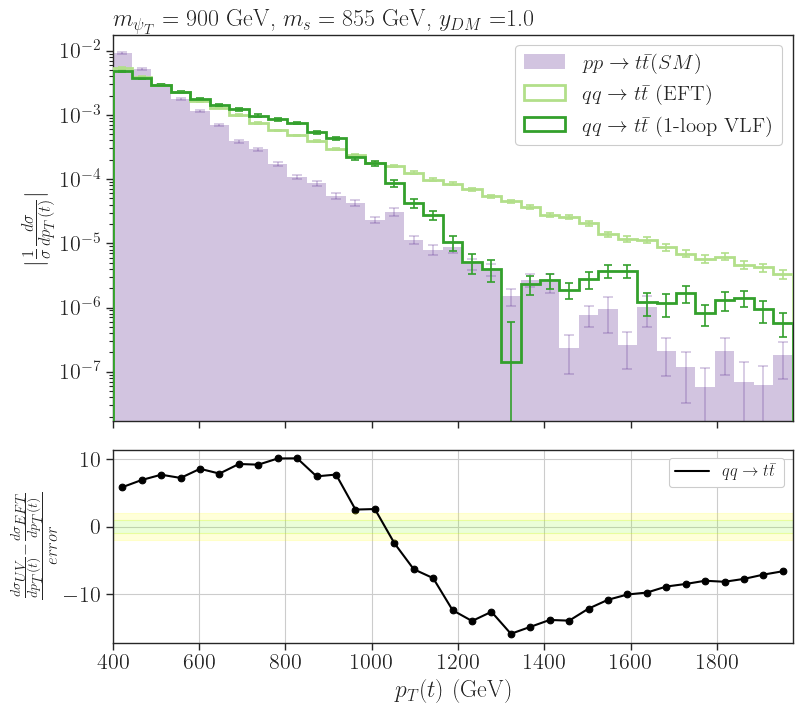

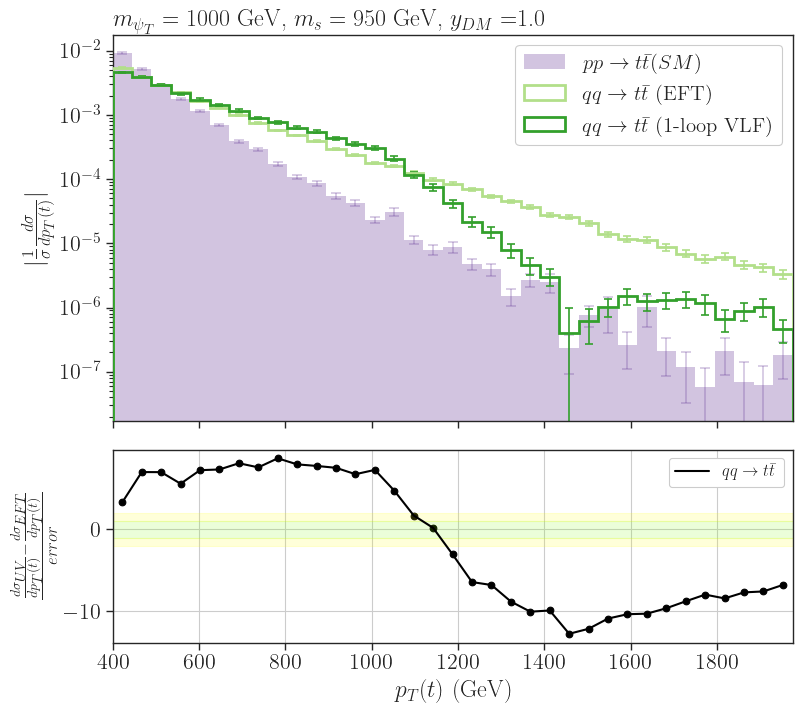

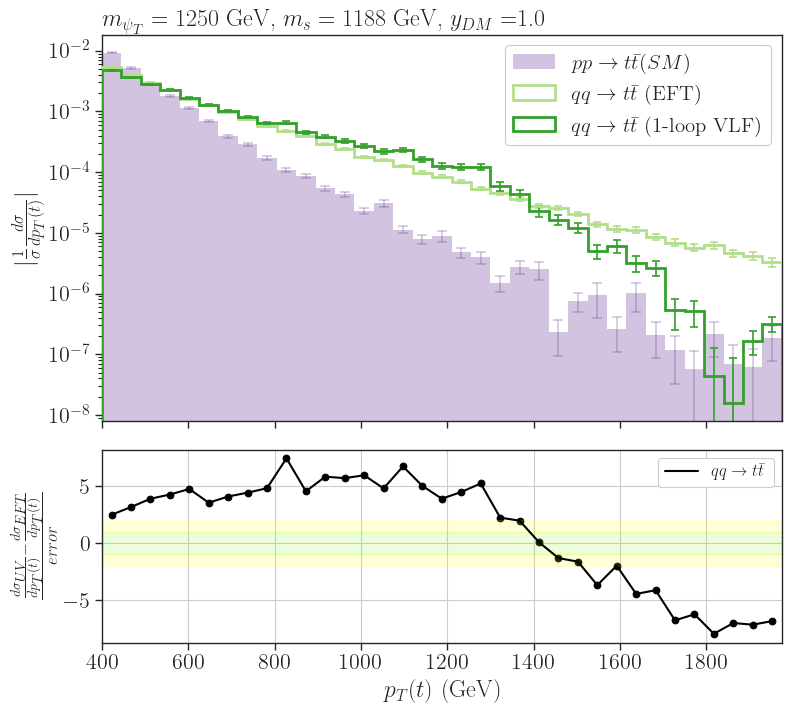

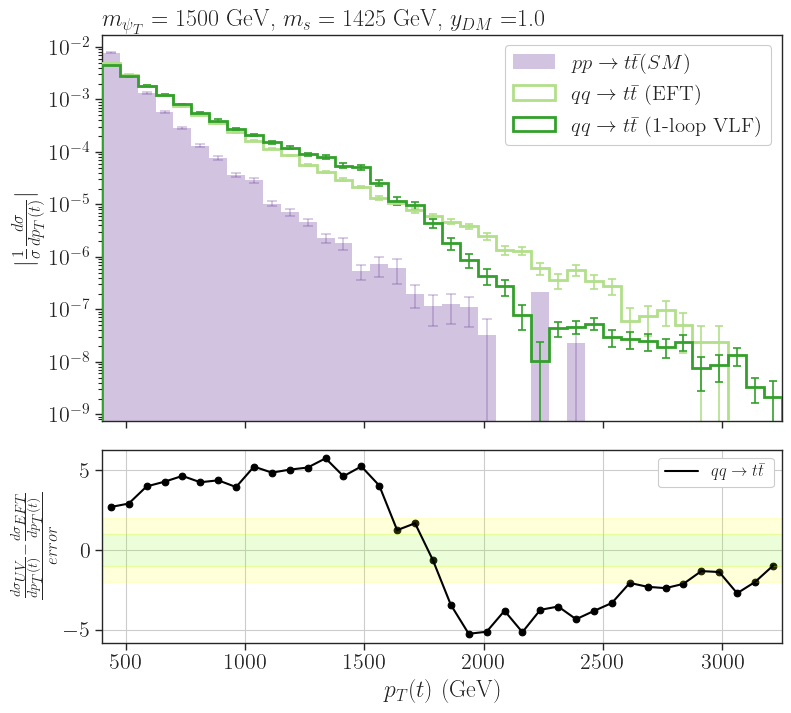

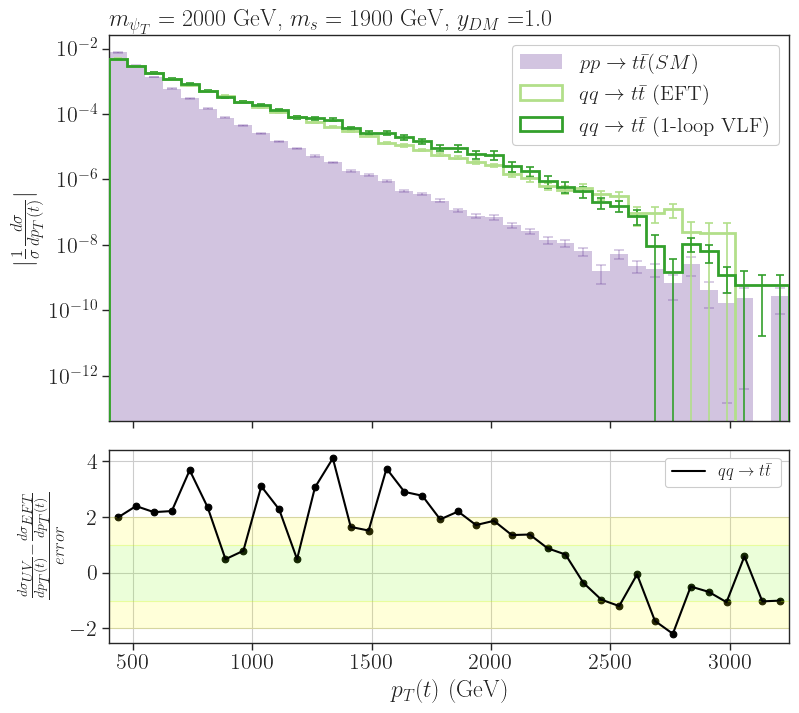

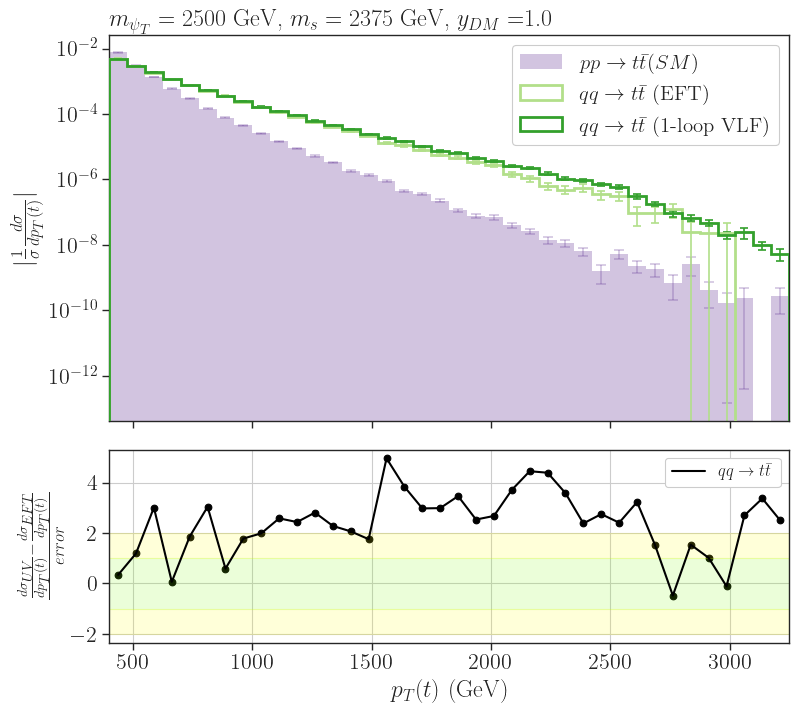

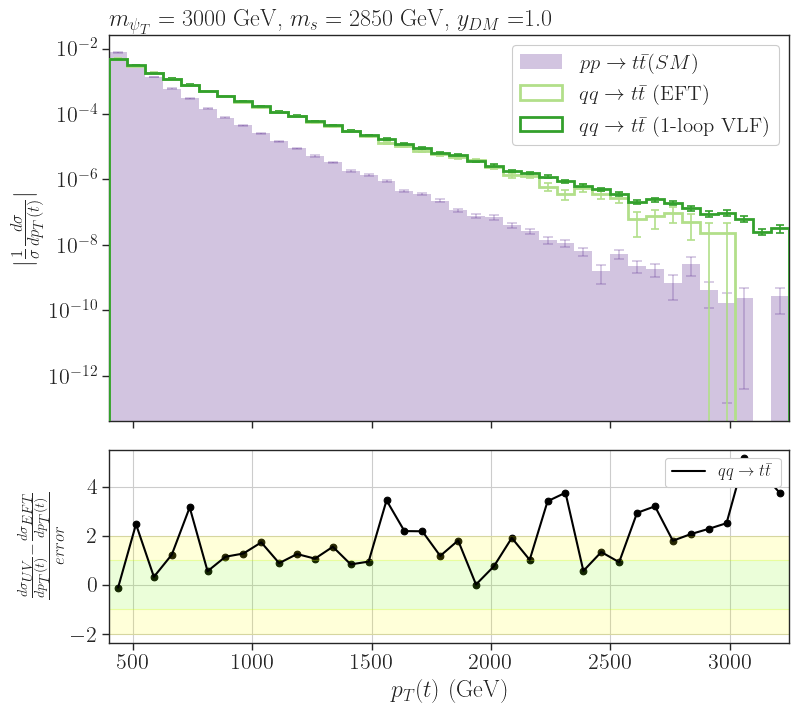

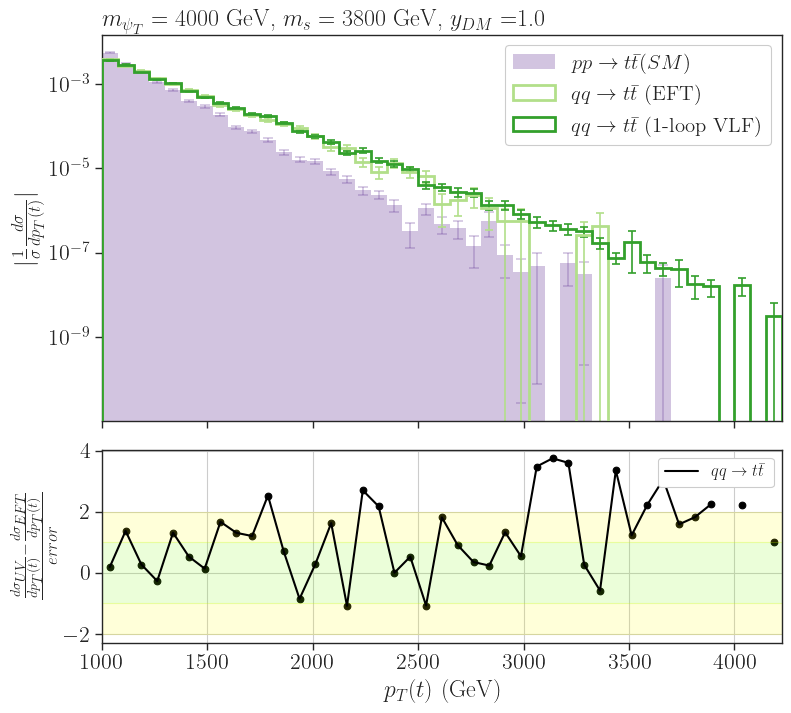

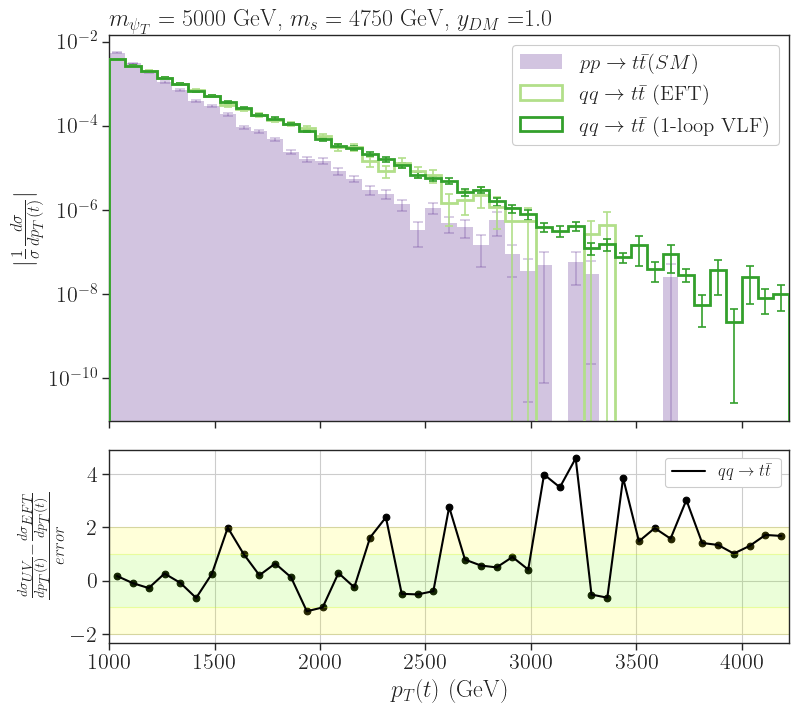

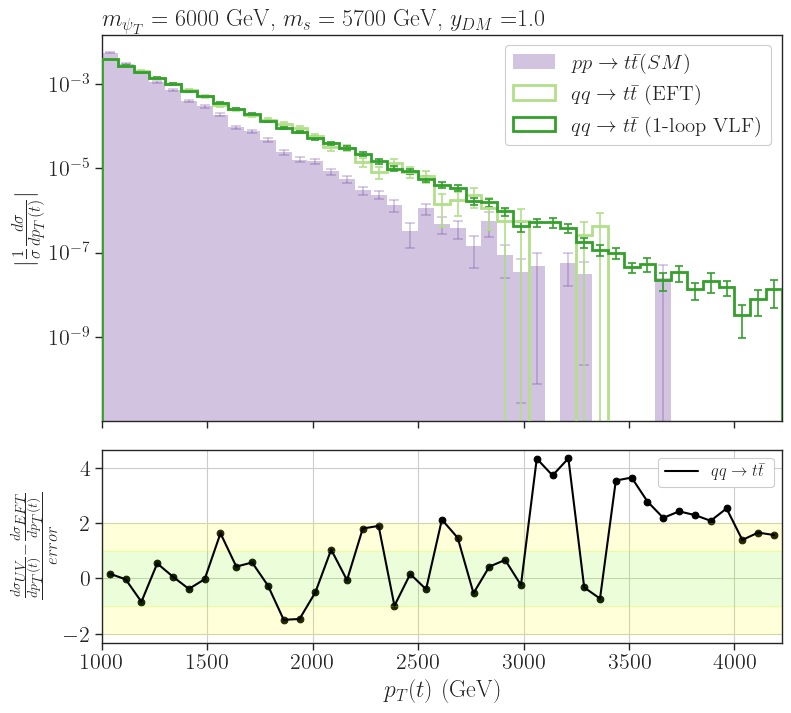

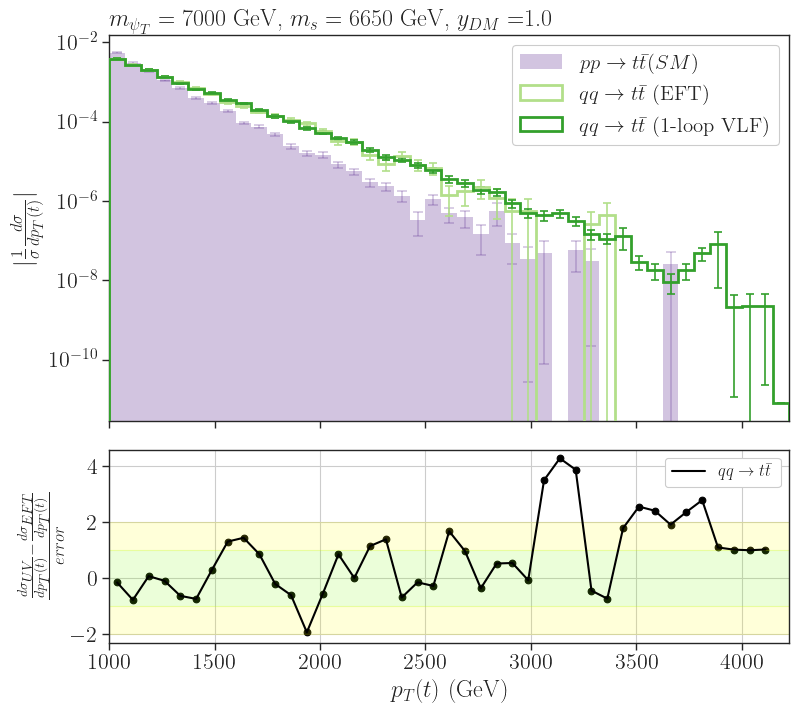

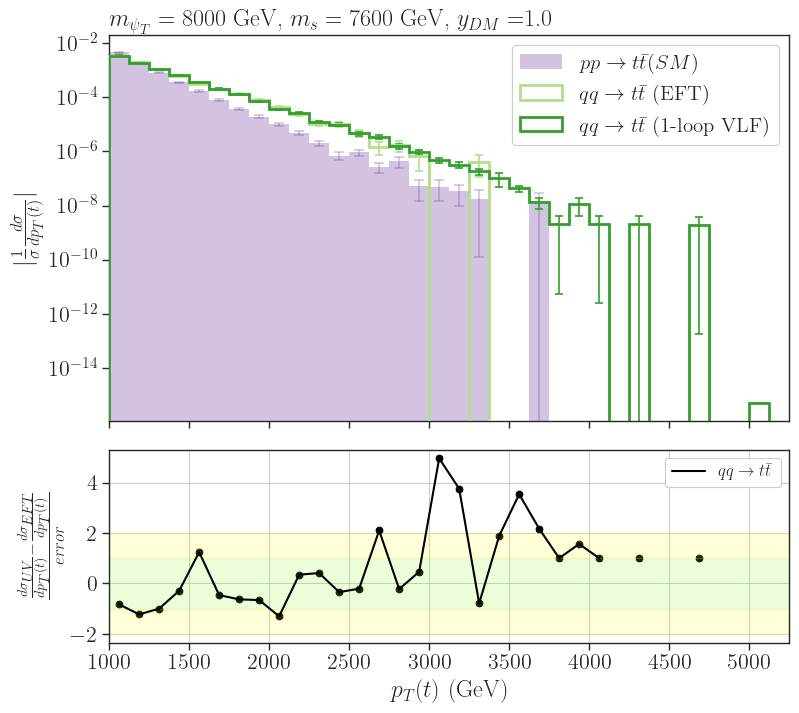

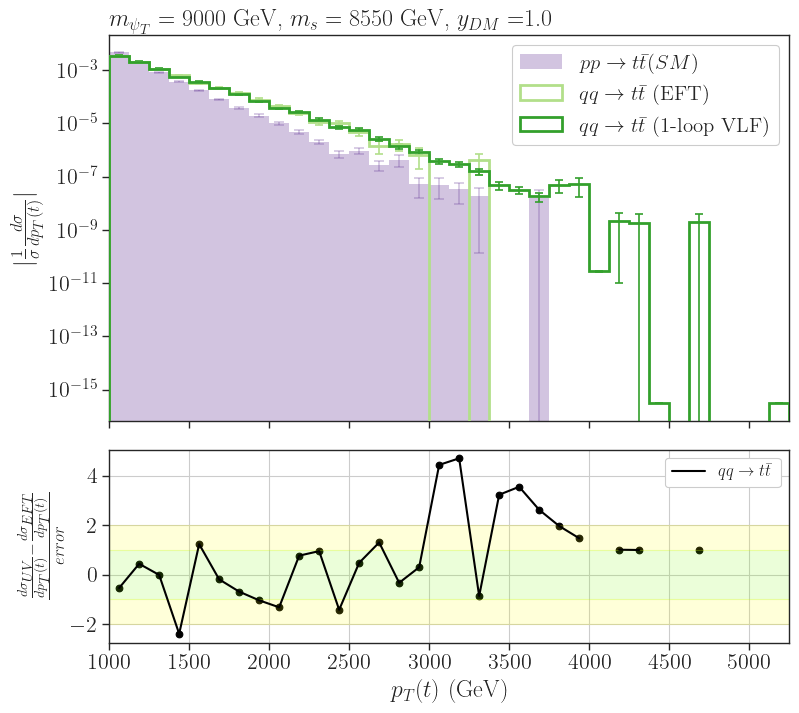

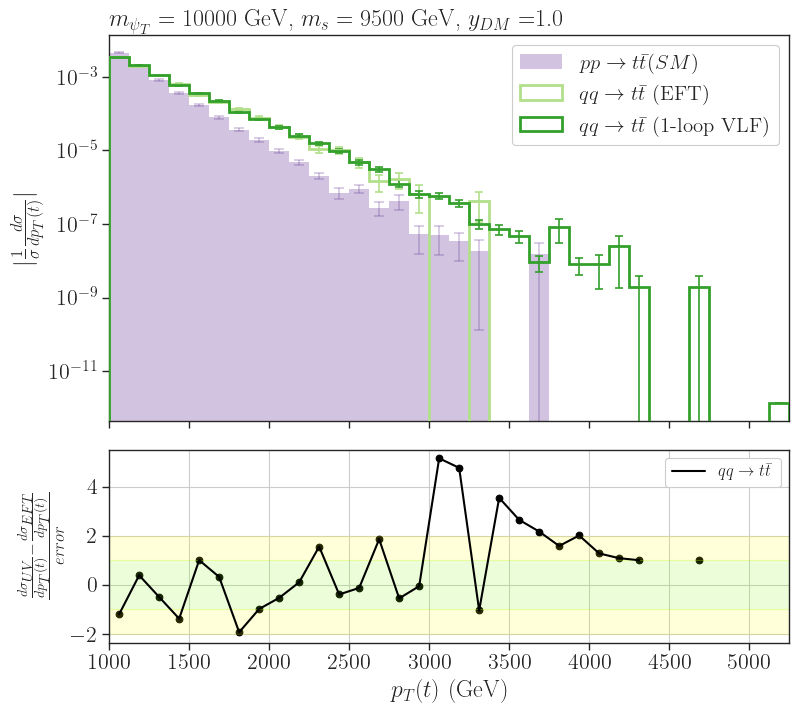

In [25]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False

#Defining the dist type
dist = 'pT'

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']

    #Couping
    yDM = selected[0]['ydm']
    
    #Defining the binning according to the BSM masses
    if mPsiT < 800.0:
        bins = np.arange(400.,1550.,35.)
    elif mPsiT <= 1250:
        bins = np.arange(400.,2000.,45.)
    elif mPsiT <=2000:
        bins = np.arange(400.,3300.,75.)    
    elif mPsiT <=3000:
        bins = np.arange(400.,3300.,75.)
    elif mPsiT <= 7000:
        bins = np.arange(1000.,4300.,75.)
    else:
        bins = np.arange(1000.,5300.,125.)
   
    #SM plot arrays
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []

    #Selecting the SM according to the bias
    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    #Loop over qq and gg to generate pp
    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d[dist],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    
    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #BSM plot arrays
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []

    #Loop over the processes
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d[dist],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d p_T(t)}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    

    #Ratio plot
    
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    
    #Computing the ratio EFT/1-loop UV and its error
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))

    #Computing the difference (1-Loop - EFT) and its error:
    diff = hLoop - hEFT
    diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)
    
    #Verifying the type of the subplot
    label = labels_r[0]
    #Ratio plot
    if ratio_plot == True:
        y = ratio
        y_err = ratio_Err
        y_label = r'$N_{EFT}/N_{1-loop}$'
        #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                             #label=label,c=c[j]) 
        #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
        axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                             label=label,c=c[j]) 
        axarr[1].errorbar(x,y, yerr = y_err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        axarr[1].set_ylim(-1.5,1.5)
        
        axarr[1].axhline(y=1, color='k', linestyle='--')
        #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
        axarr[1].axhline(y=-1, color='k', linestyle='--')
        #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
        #axarr[1].set_ylim(2.5,1.5)
        
    #Diff over error plot
    else:
        y = np.array(diff)/np.array(diff_err)
        y_err = diff_err
        y_label = r'$\frac{\frac{d \sigma_{UV}}{d p_T(t)} - \frac{d \sigma_{EFT}}{d p_T(t)}}{error}$'
        #Plotting
        axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c='0')
        axarr[1].scatter(x,y,color='0')
        axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
        axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
        axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

        
    
    
    
    #Subplot configs
    axarr[1].set_ylabel(y_label)
    #axarr[1].set_ylim(-1.5,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].set_xlabel(r'$p_T(t)$ (GeV)')
    axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
plt.show()

# $\Delta\varphi$ $qq\to t\bar{t}$ 

/tmp/ipykernel_5019/3056359883.py:58: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))
/tmp/ipykernel_5019/3056359883.py:102: RuntimeWarning: invalid value encountered in divide
  yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
/tmp/ipykernel_5019/3056359883.py:119: RuntimeWarning: invalid value encountered in divide
  ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)


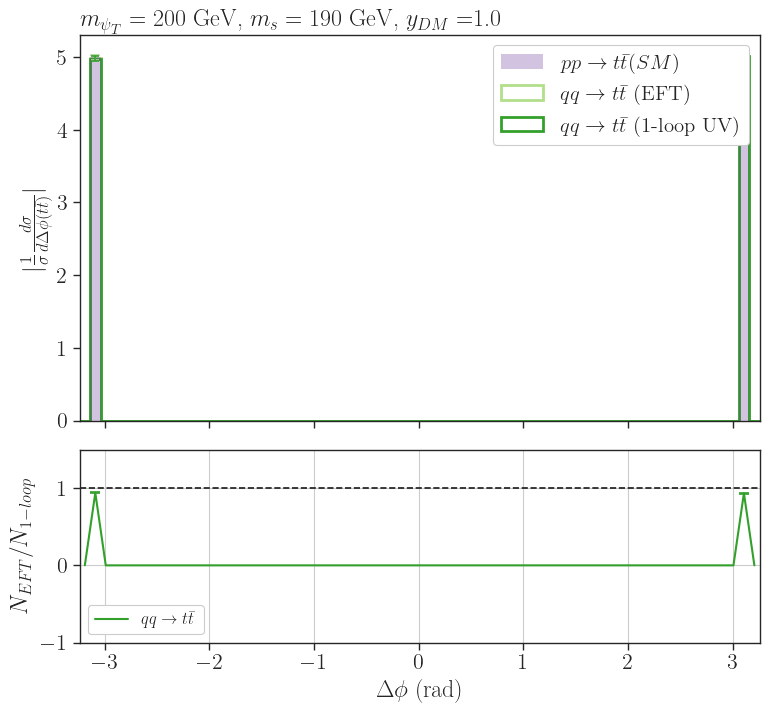

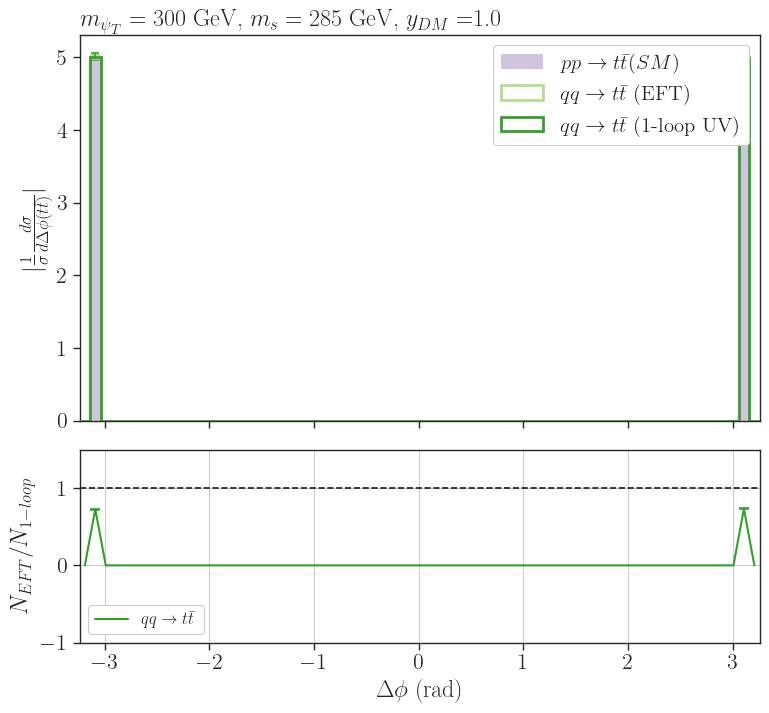

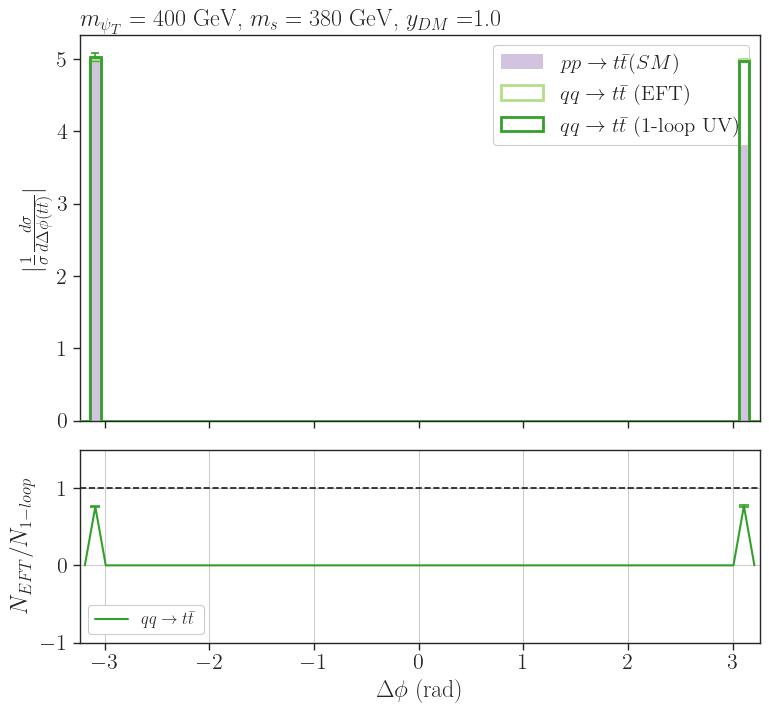

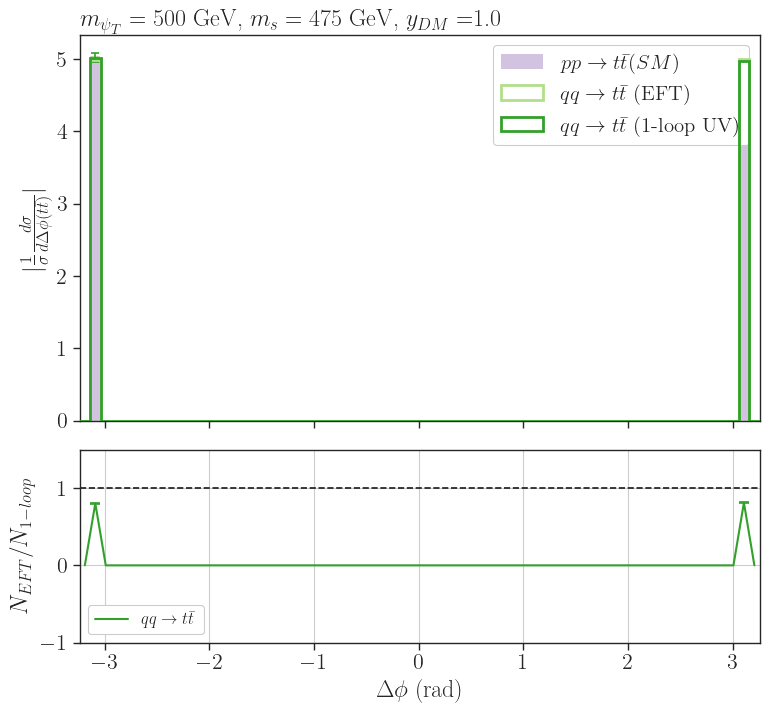

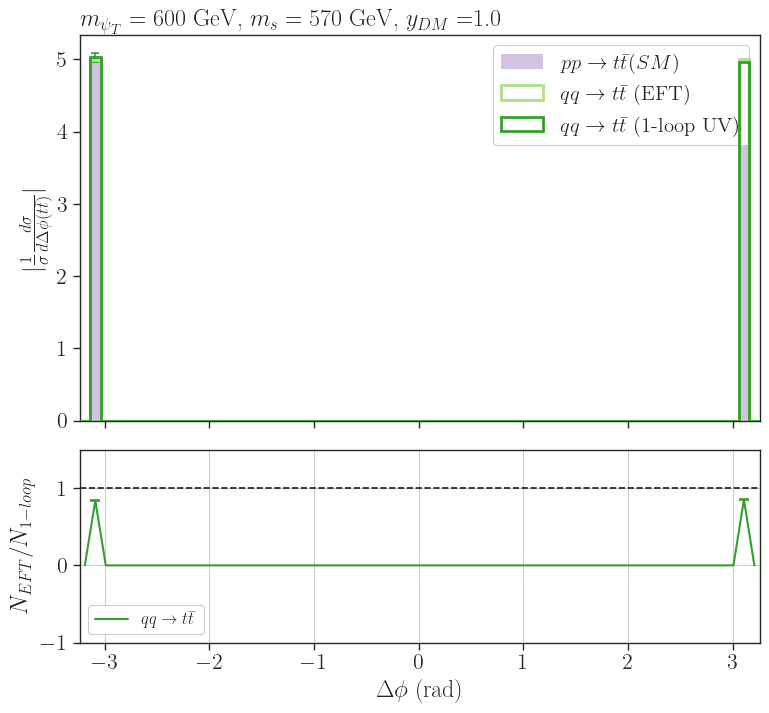

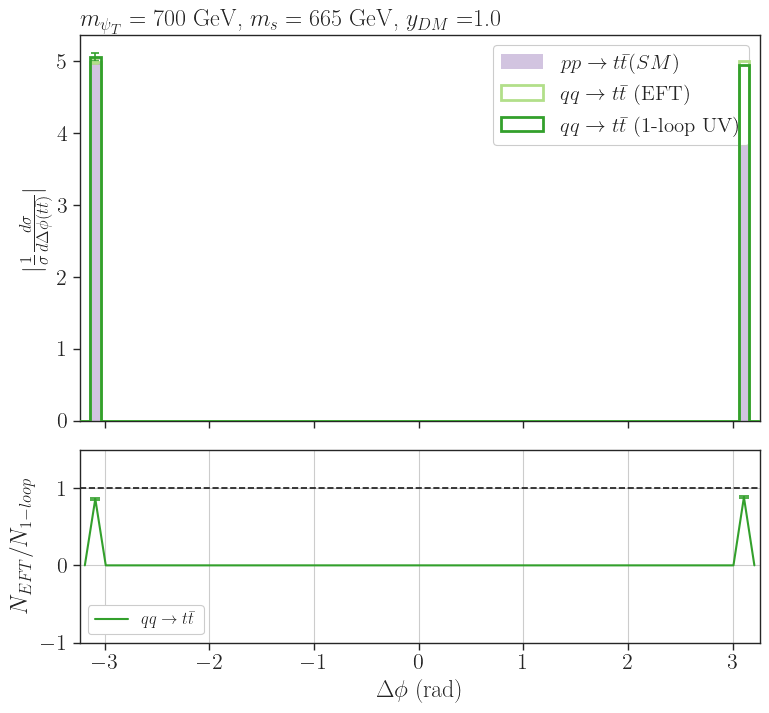

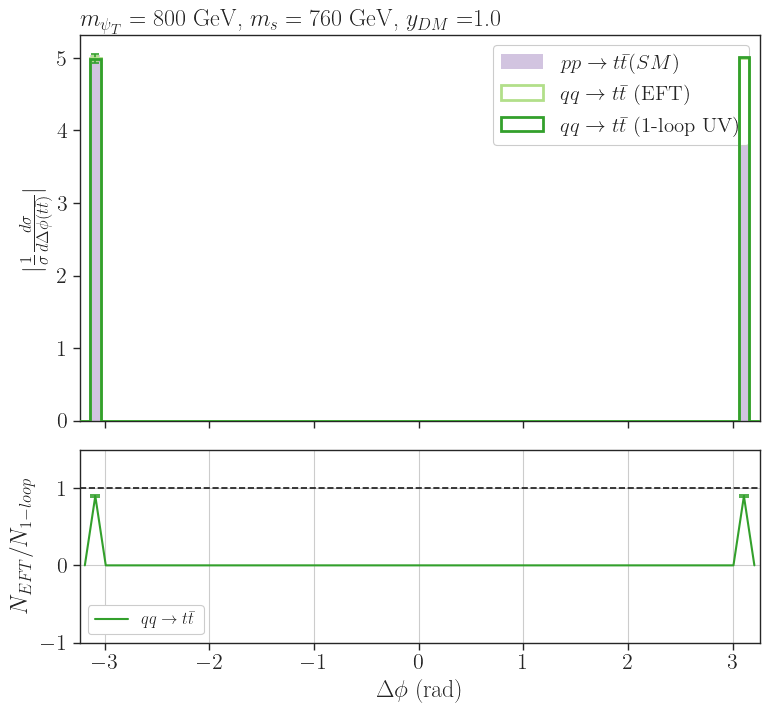

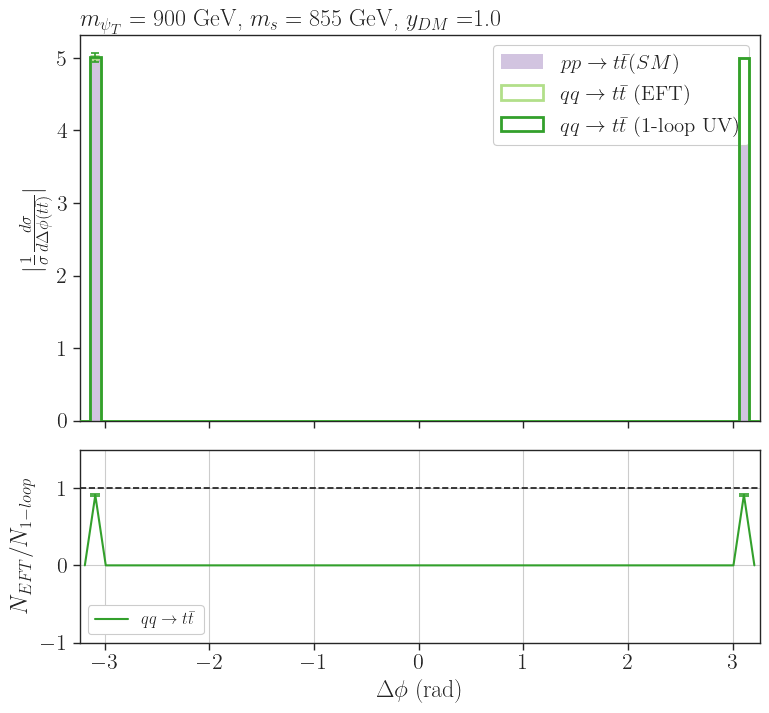

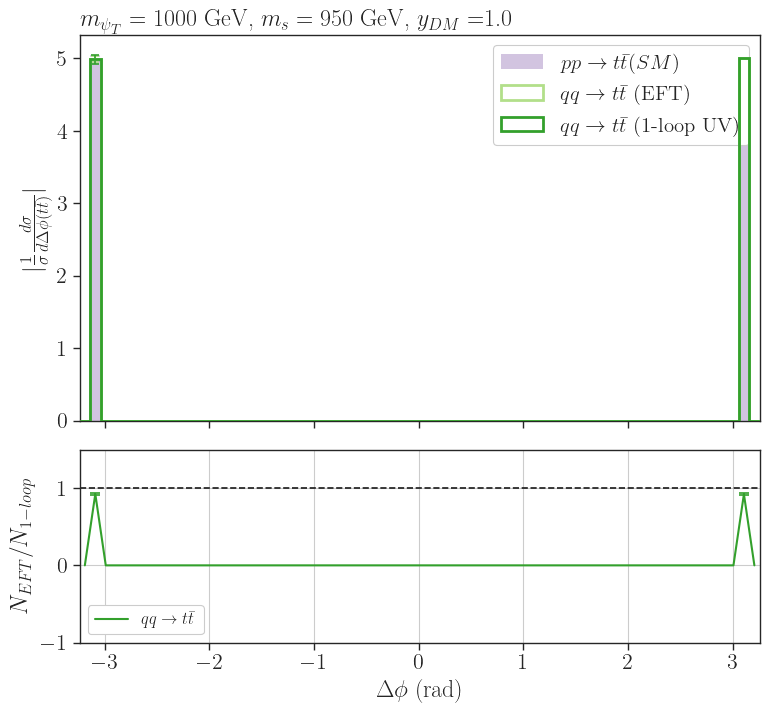

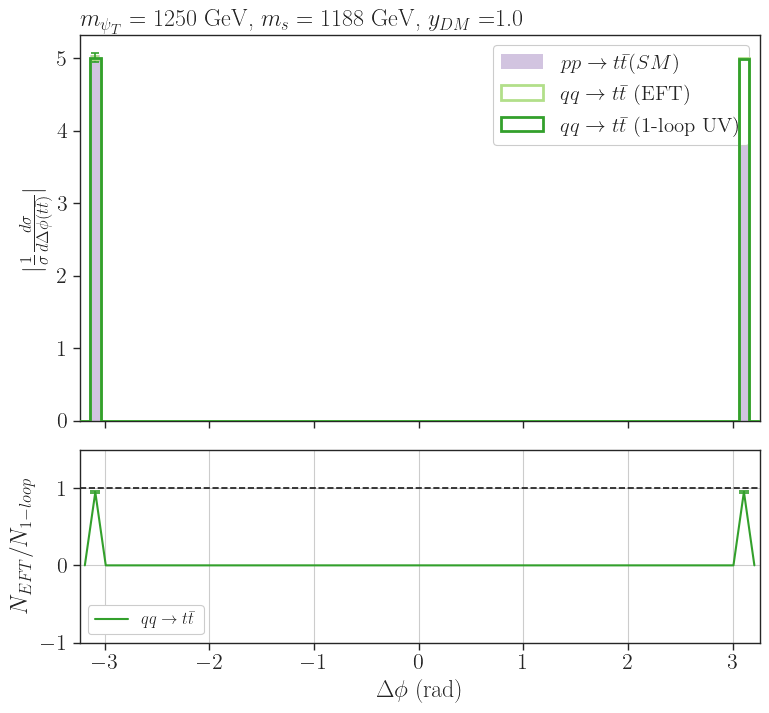

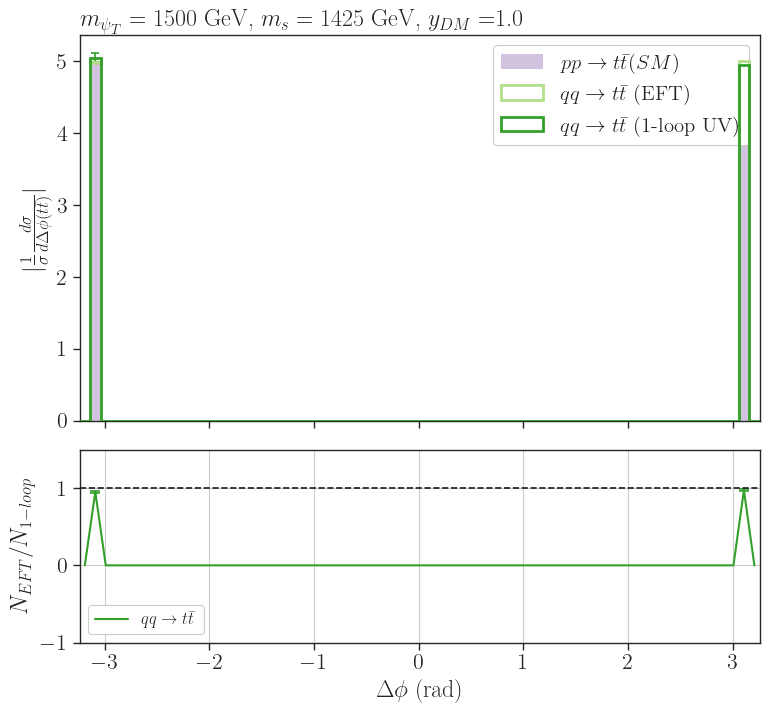

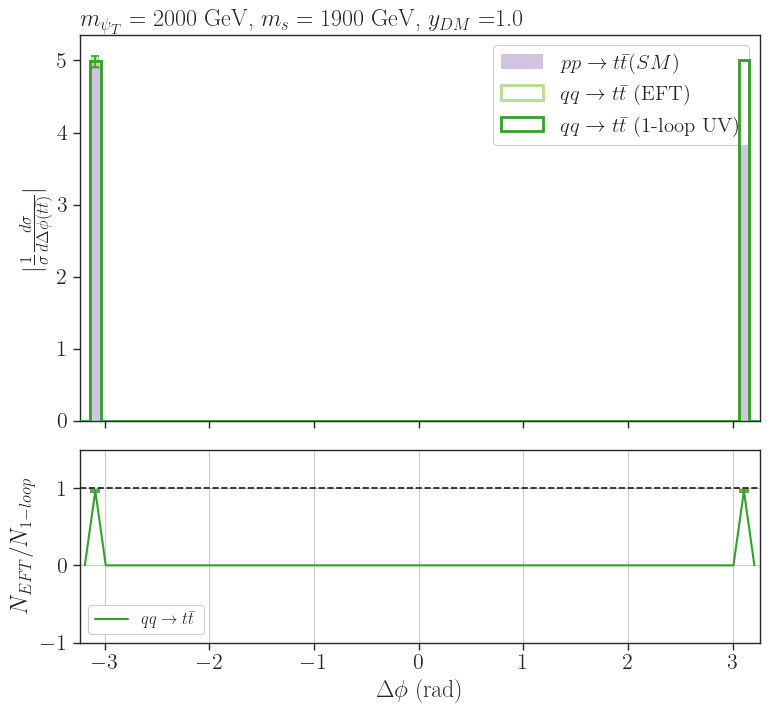

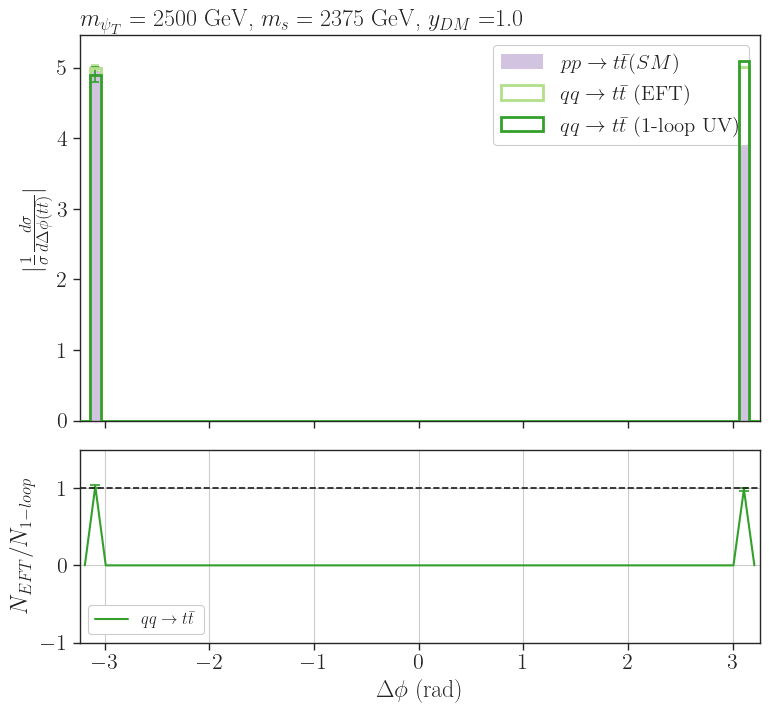

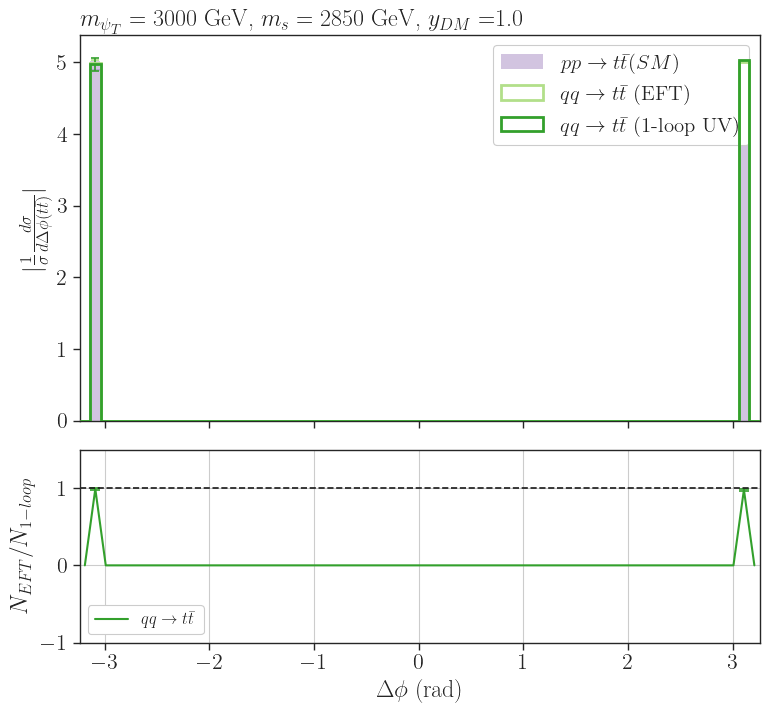

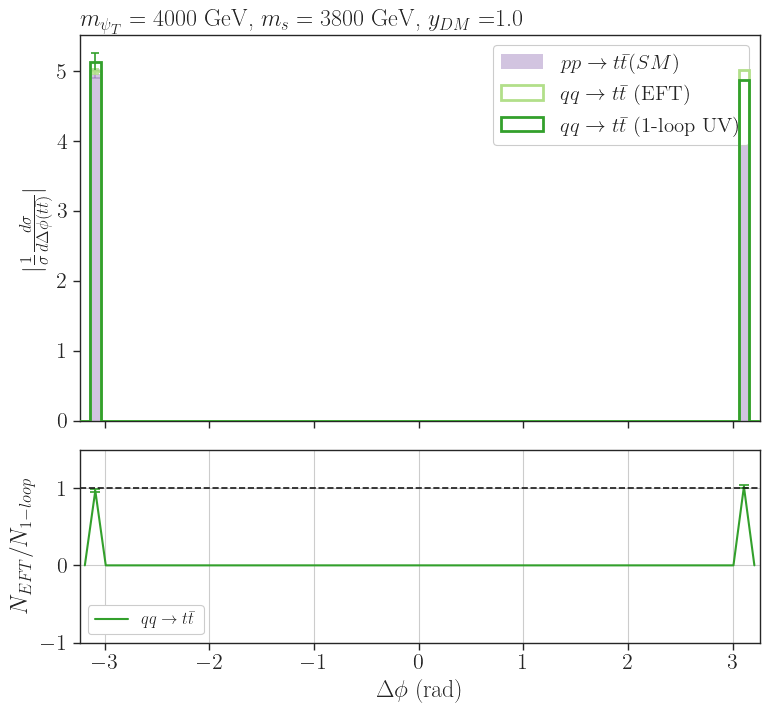

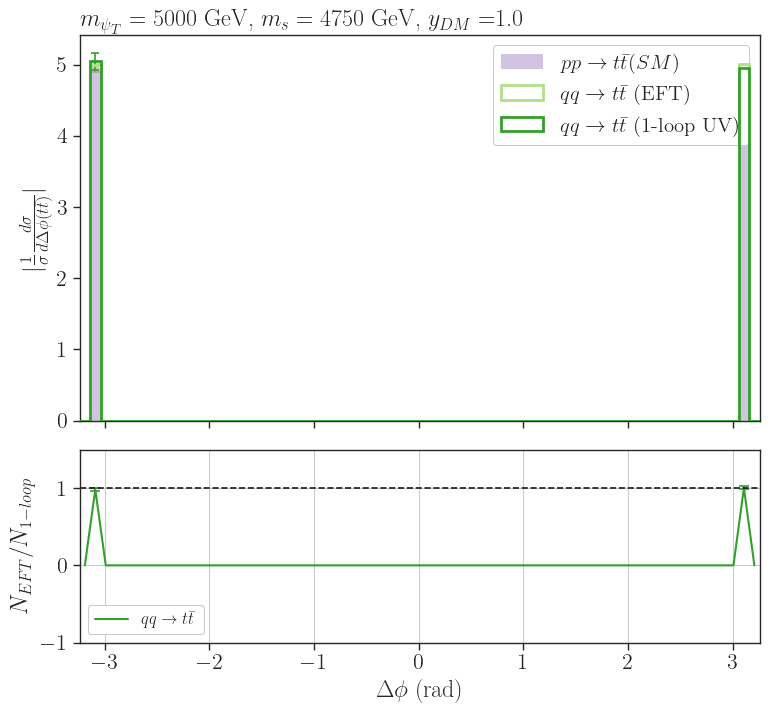

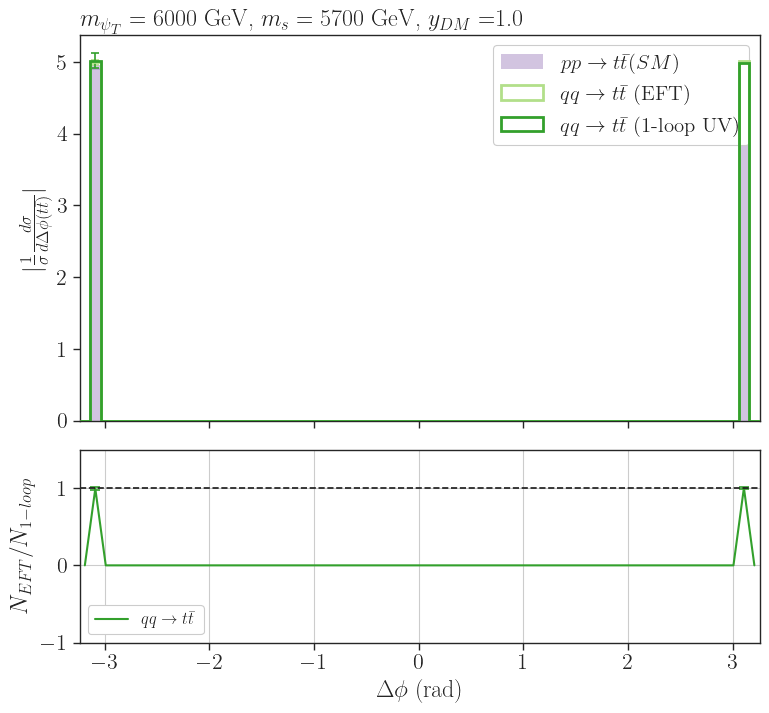

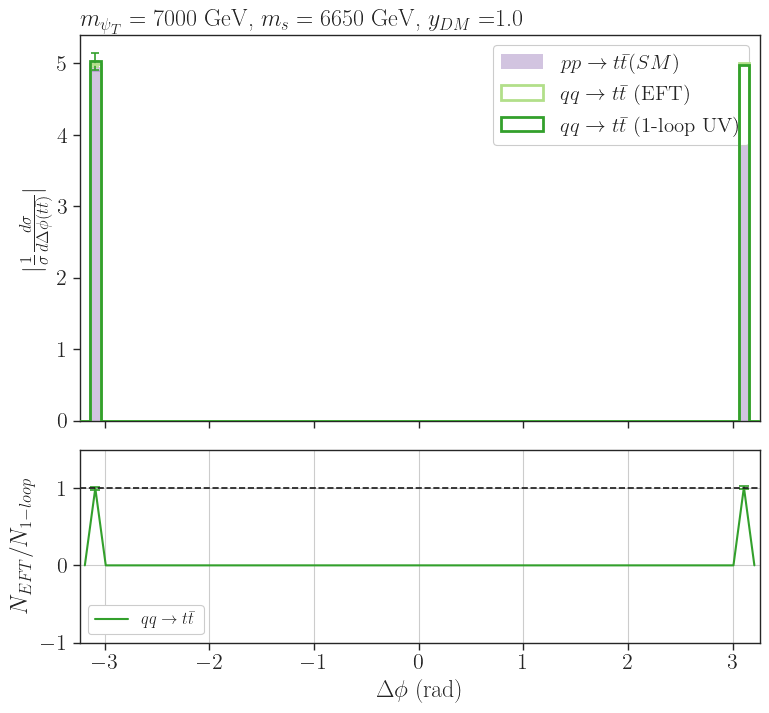

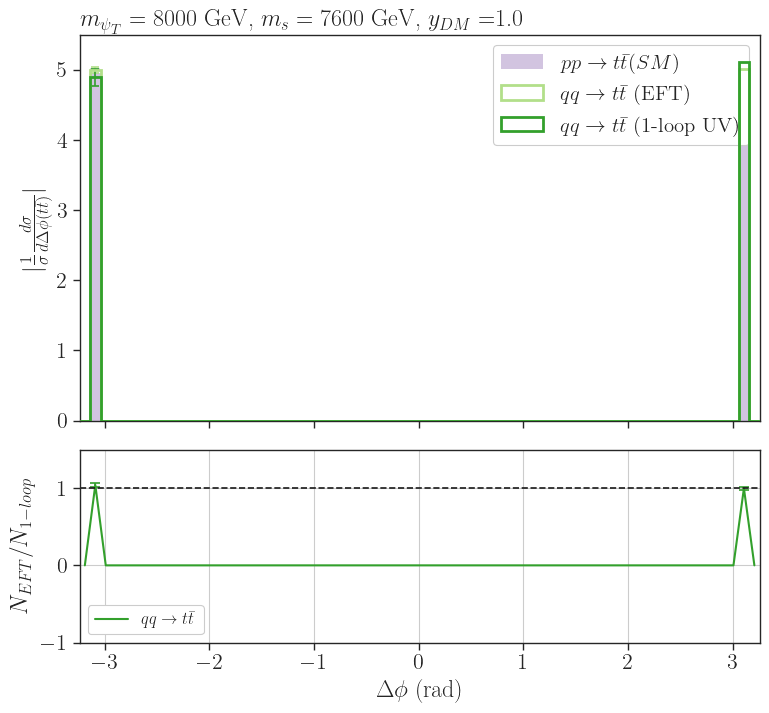

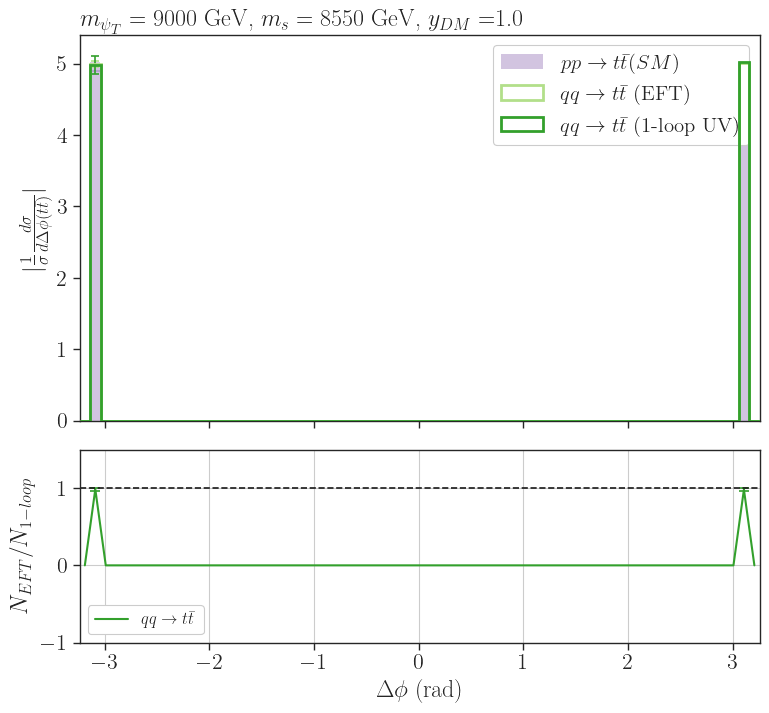

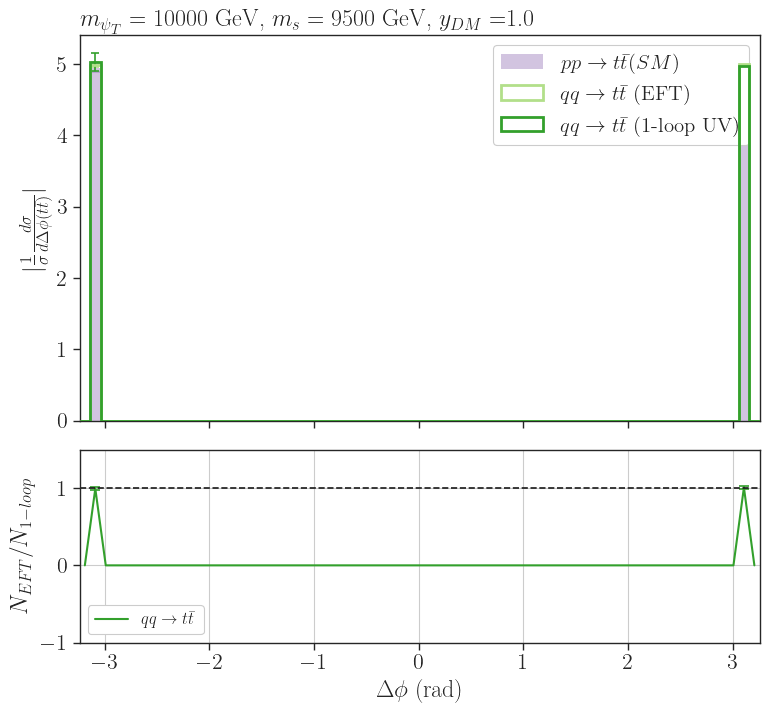

In [60]:



# Generating the BSM histograms and plotting them
# Coupling value
yDM = 1.0

#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']
    #Defining the binning according to the BSM masses
    
    bins = np.arange(-np.pi-0.1,np.pi+0.2,0.1)
    #Loop over the processes and models

    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d['deltaPhi'],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['deltaPhi'],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d['deltaPhi'],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d['deltaPhi'],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    #axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d \Delta \phi(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    
    
    #Subplot configs
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$\Delta \phi$ (rad)')
    
plt.show()

# $\cos{(\theta^*)}$ $qq\to t \bar{t}$

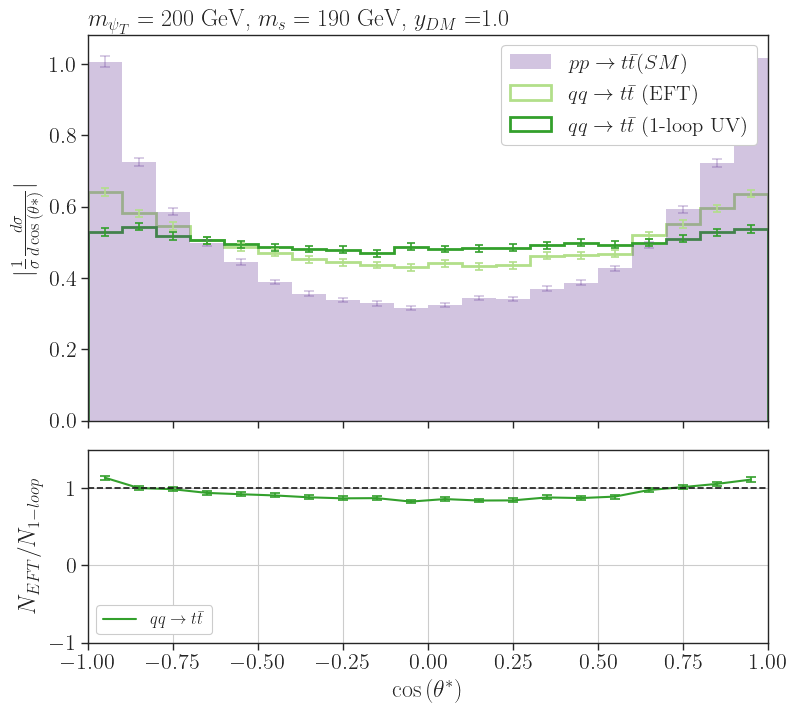

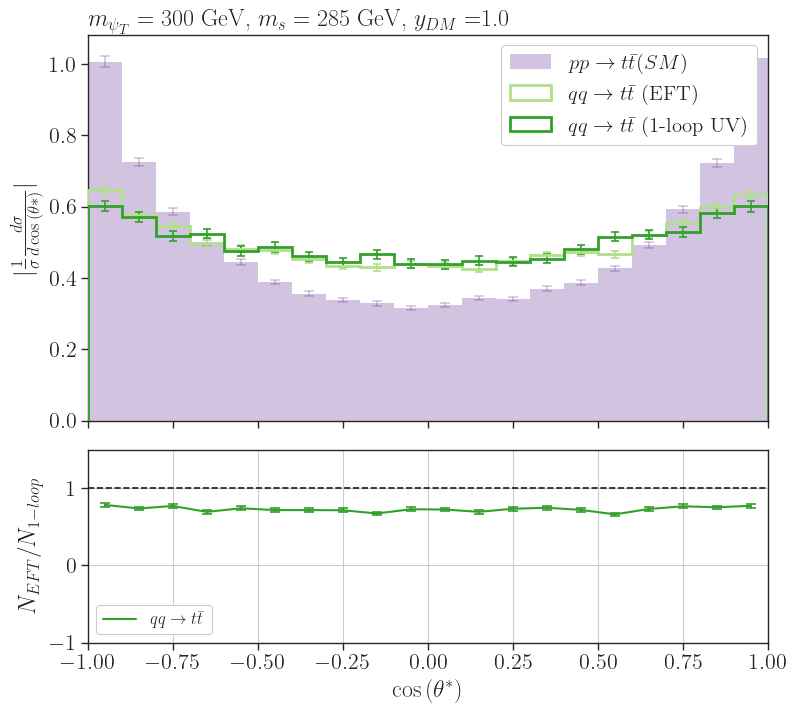

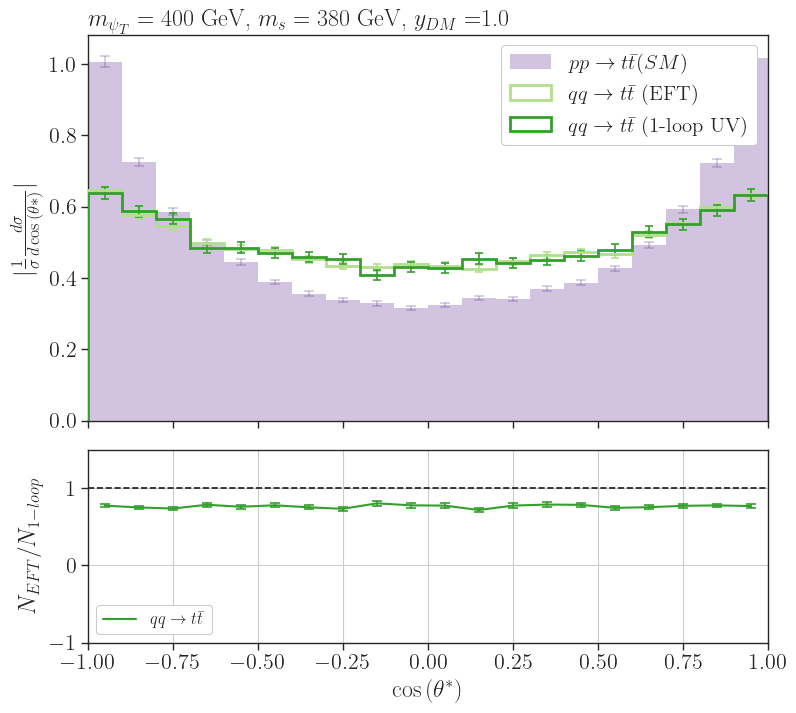

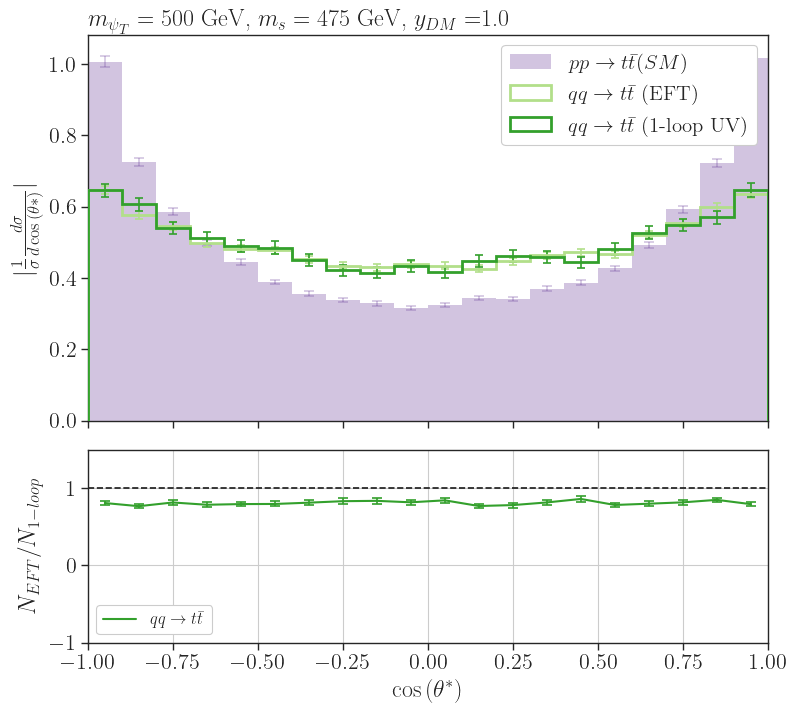

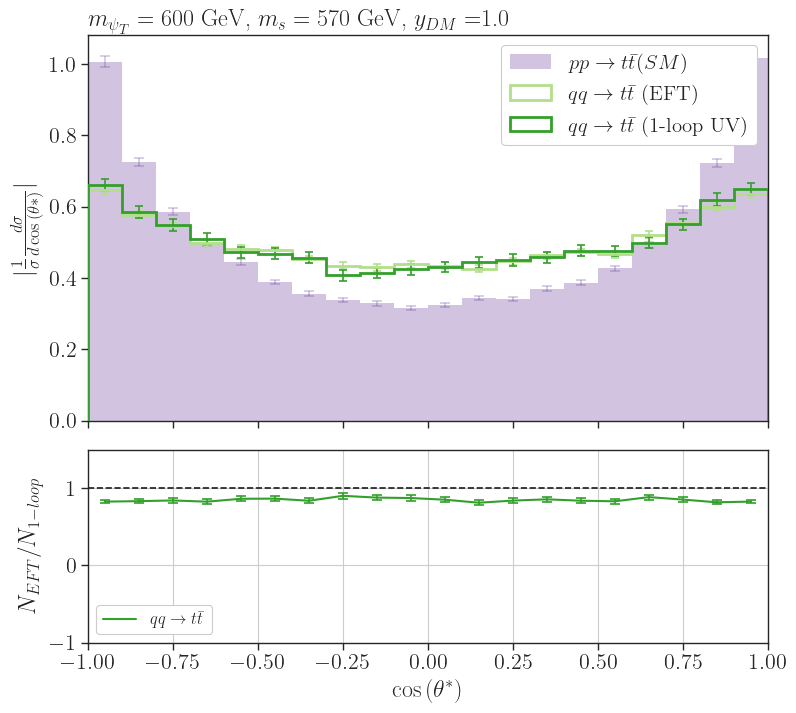

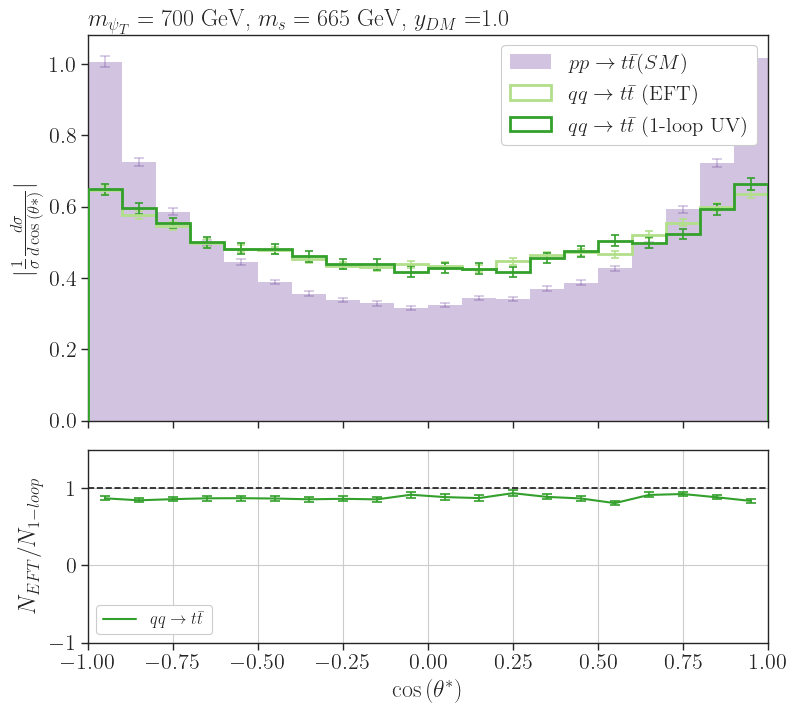

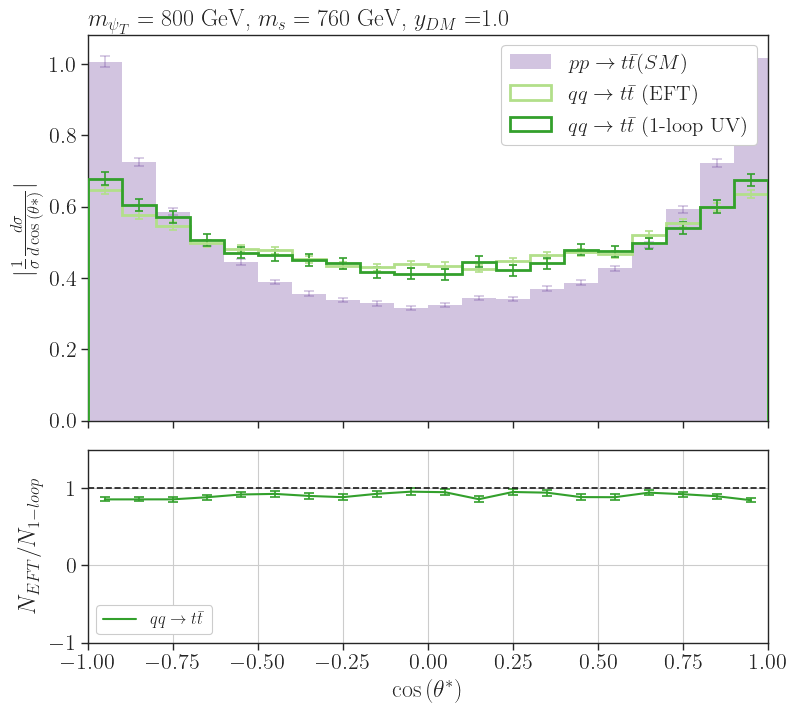

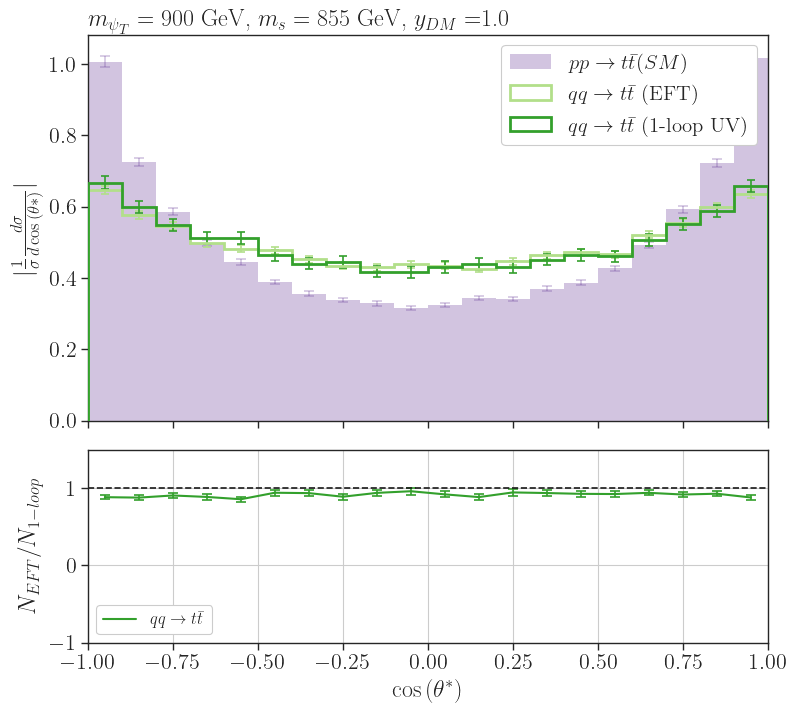

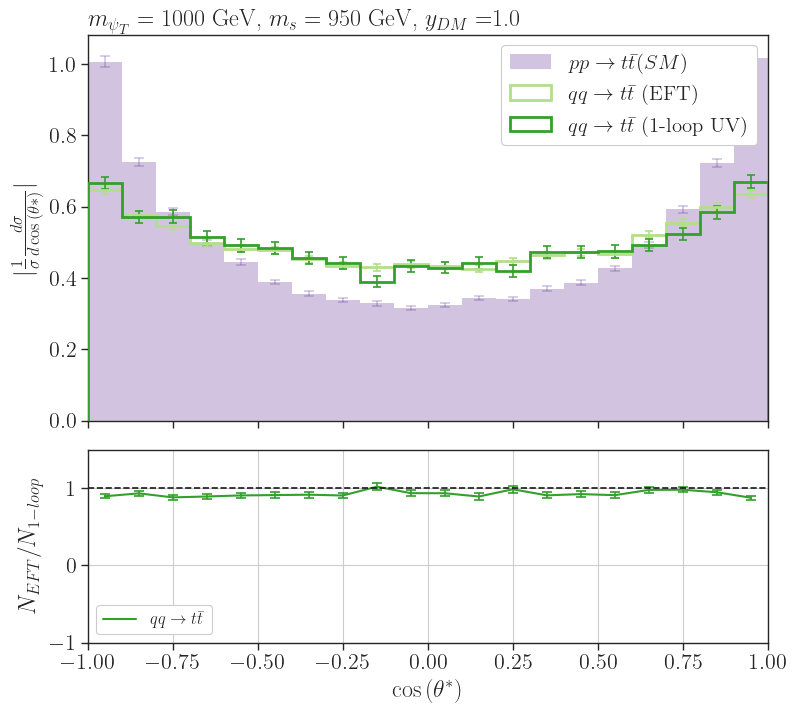

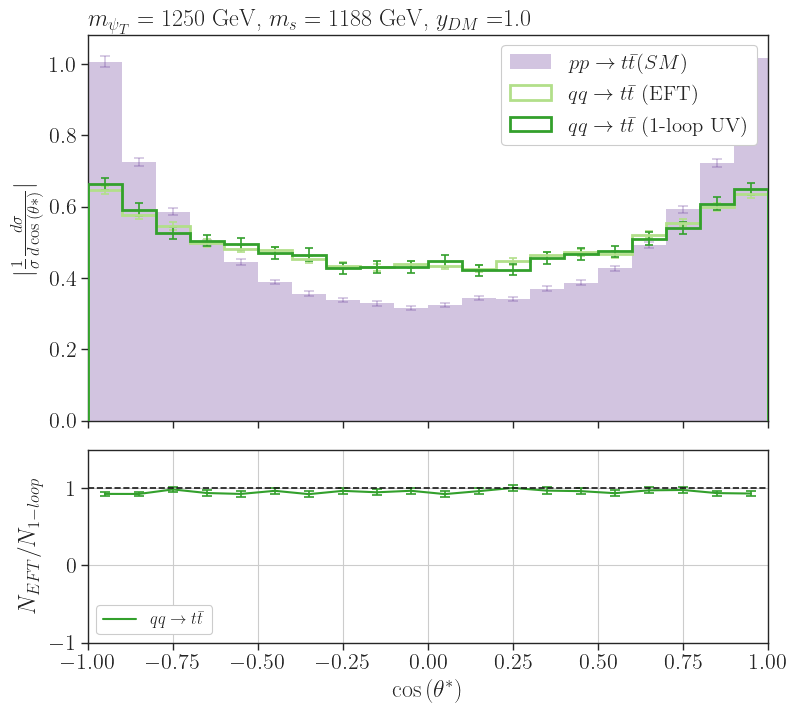

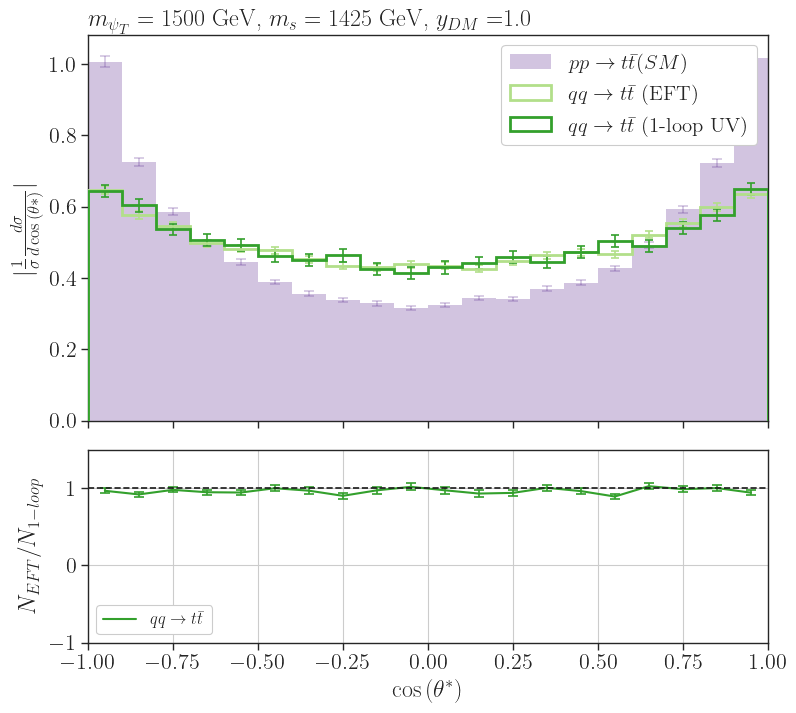

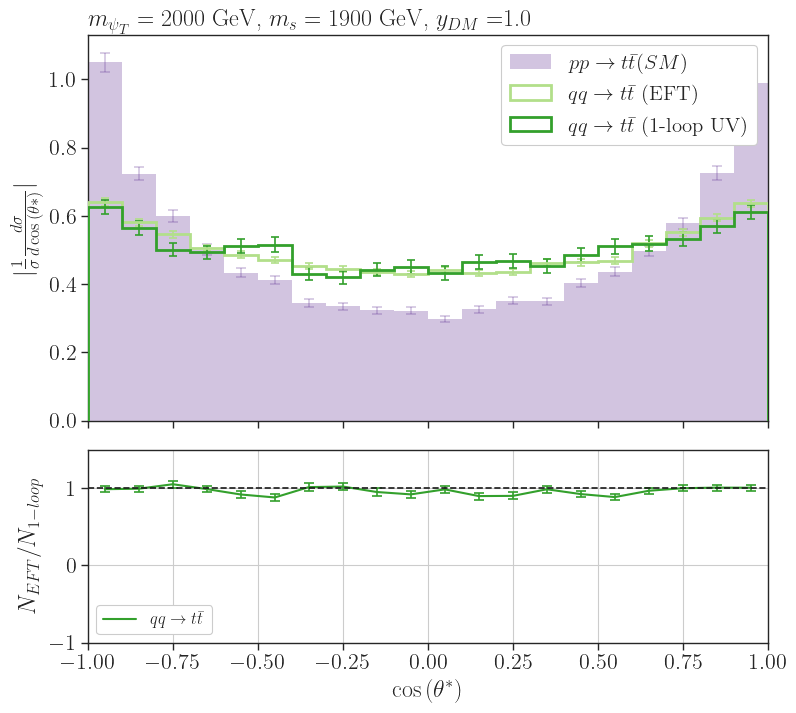

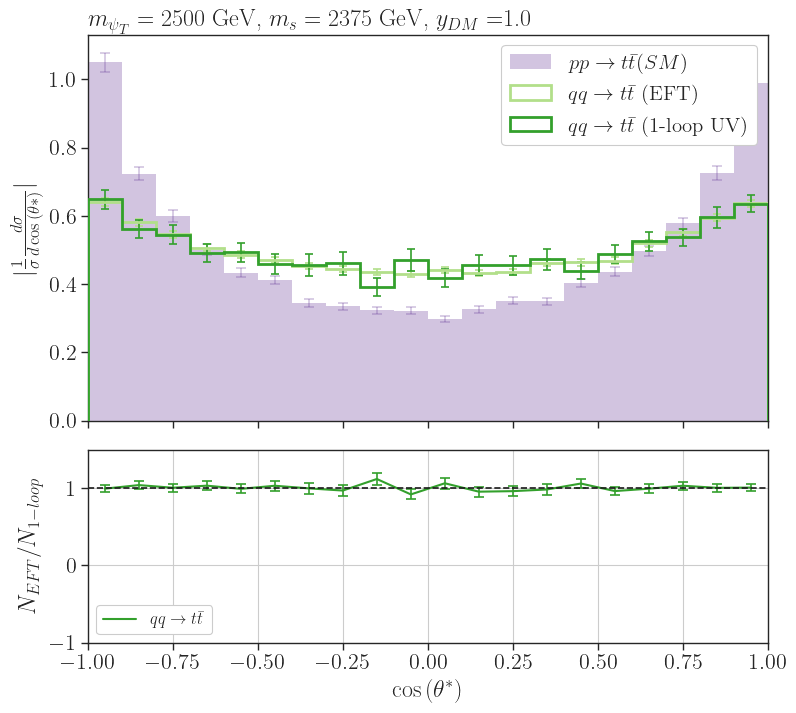

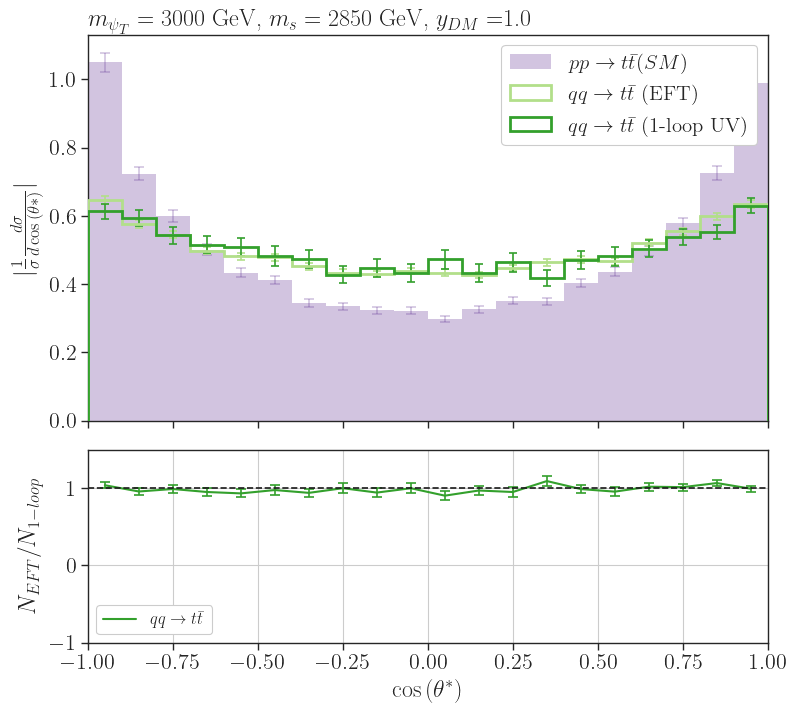

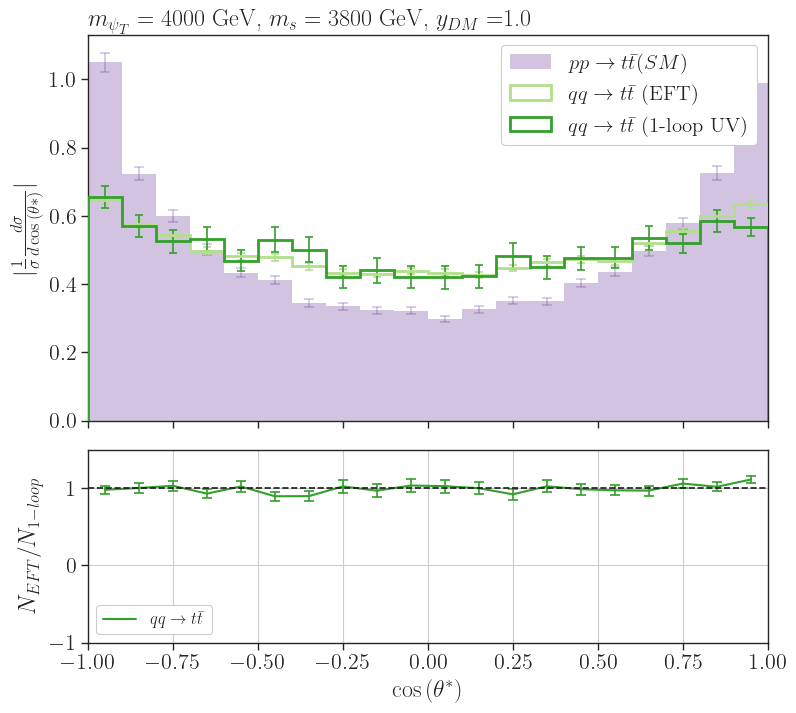

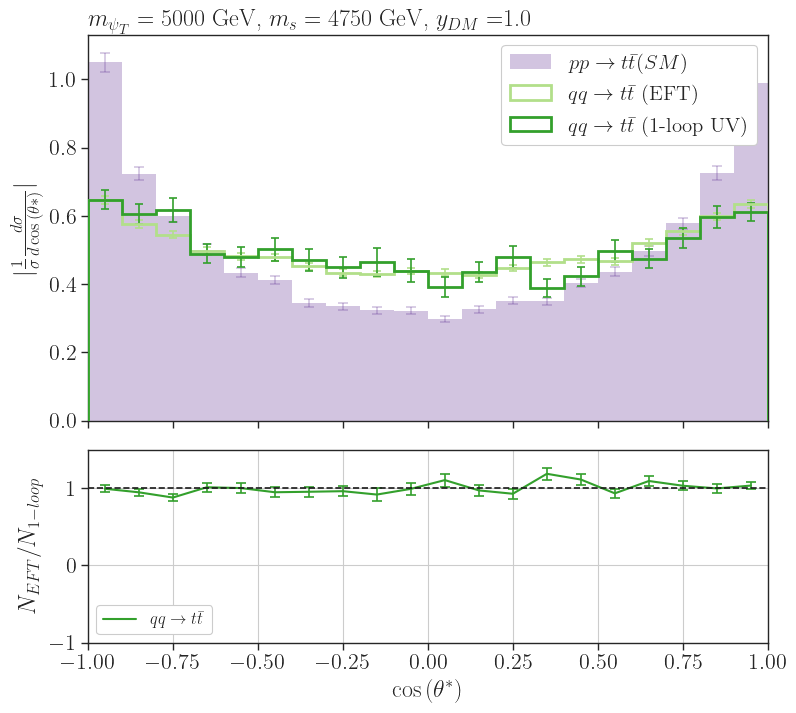

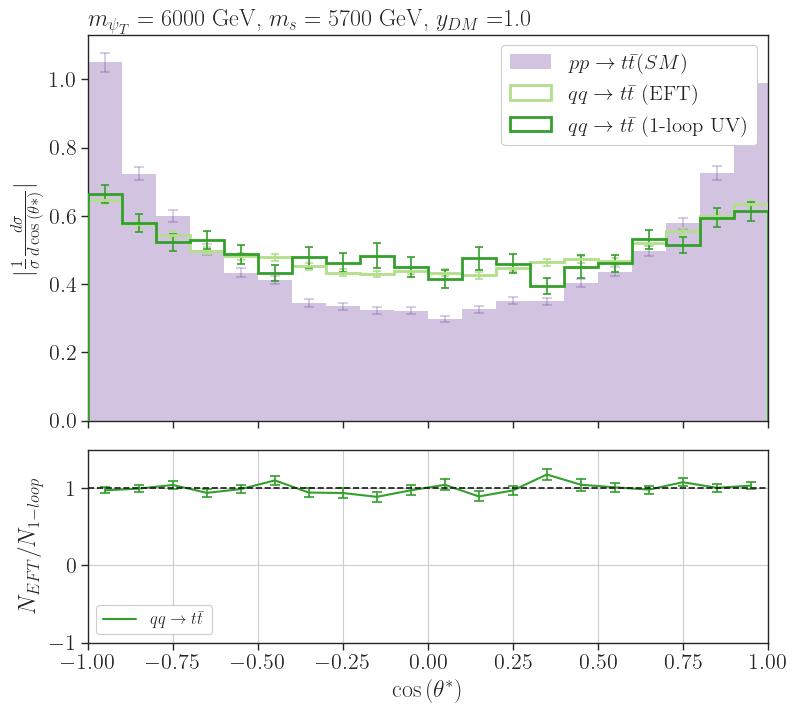

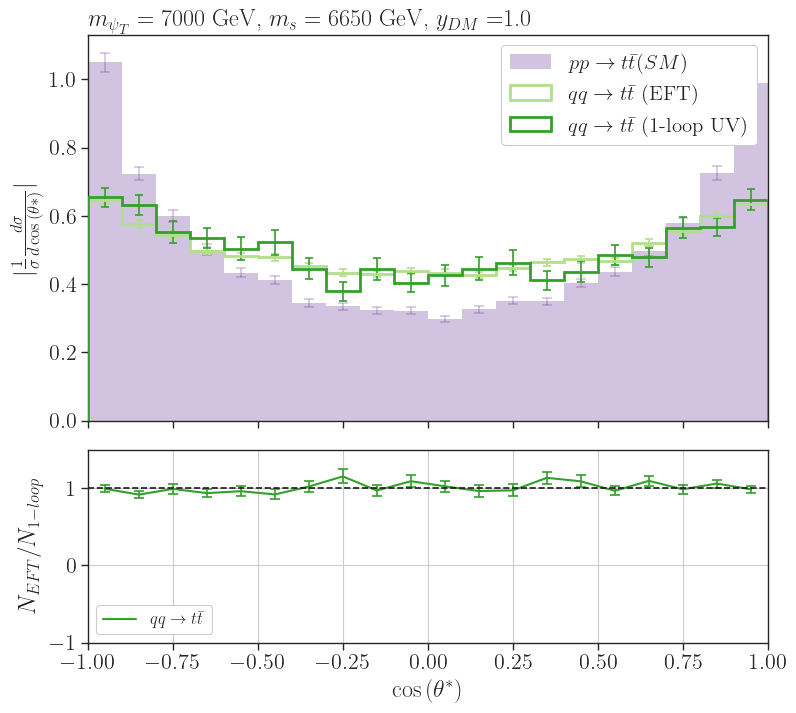

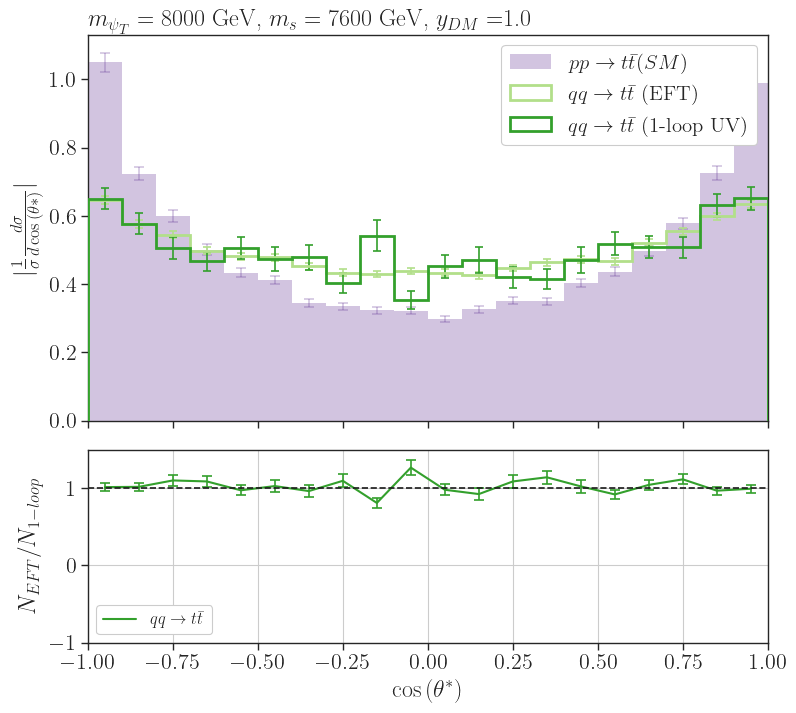

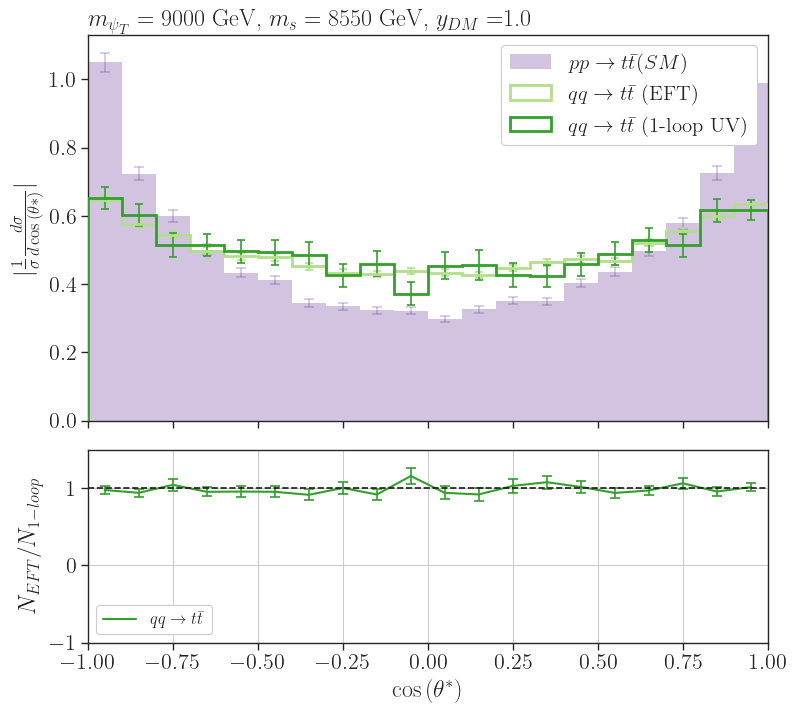

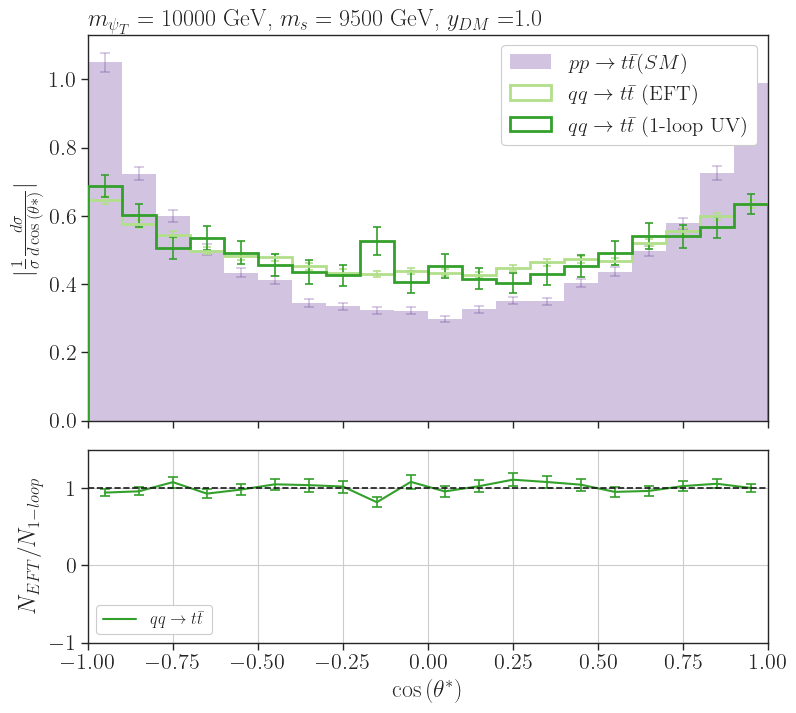

In [61]:


# Generating the BSM histograms and plotting them
# Coupling value
yDM = 1.0
dist = 'cost*'
#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']
    #Defining the binning according to the BSM masses
    
    bins = np.arange(-1,1.1,0.1)
    #Loop over the processes and models

    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d[dist],bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(d[dist],bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(d[dist],bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    #axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d \cos{(\theta*)}}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    
    
    #Subplot configs
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$\cos{(\theta^*)}$')
    
plt.show()

# Top rapidity $\vert y_t\vert$ $qq\to t \bar{t}$

/tmp/ipykernel_5019/621164801.py:102: RuntimeWarning: invalid value encountered in divide
  yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
/tmp/ipykernel_5019/621164801.py:119: RuntimeWarning: invalid value encountered in divide
  ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
/tmp/ipykernel_5019/621164801.py:58: RuntimeWarning: invalid value encountered in divide
  yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))


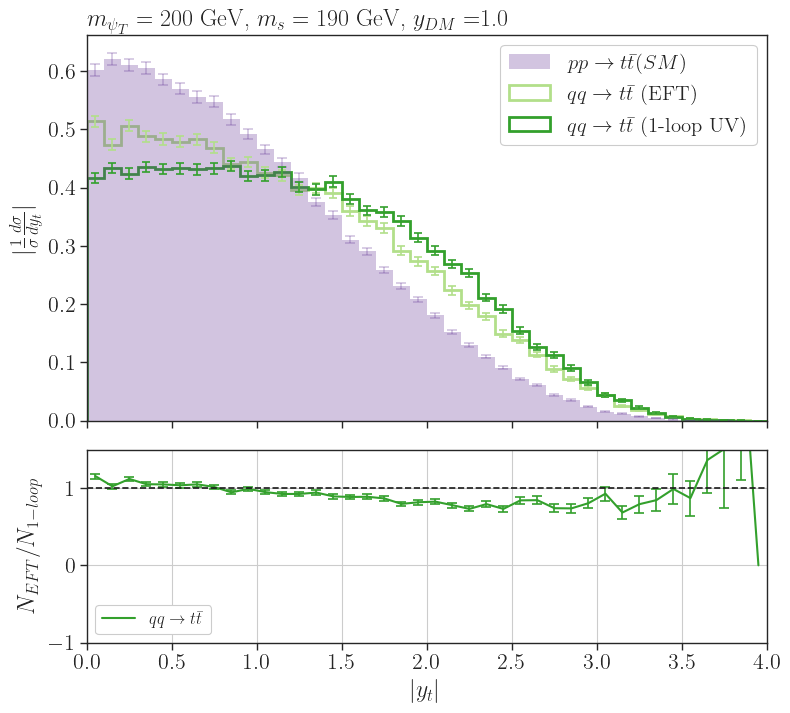

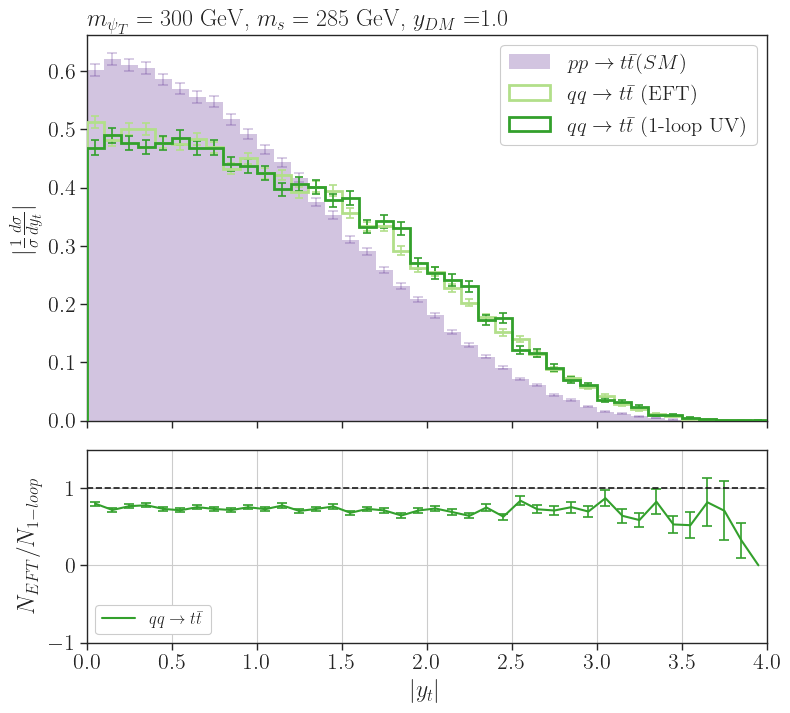

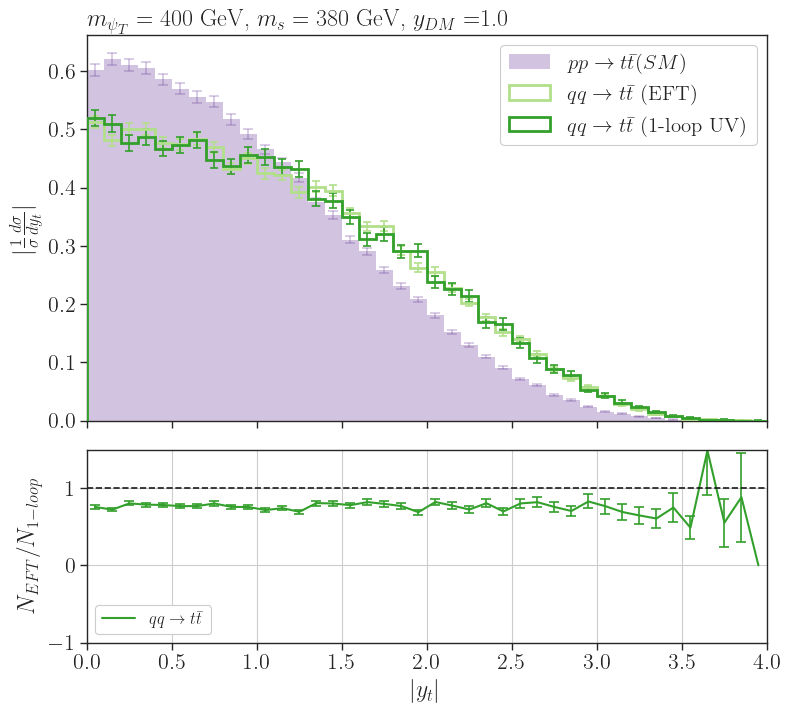

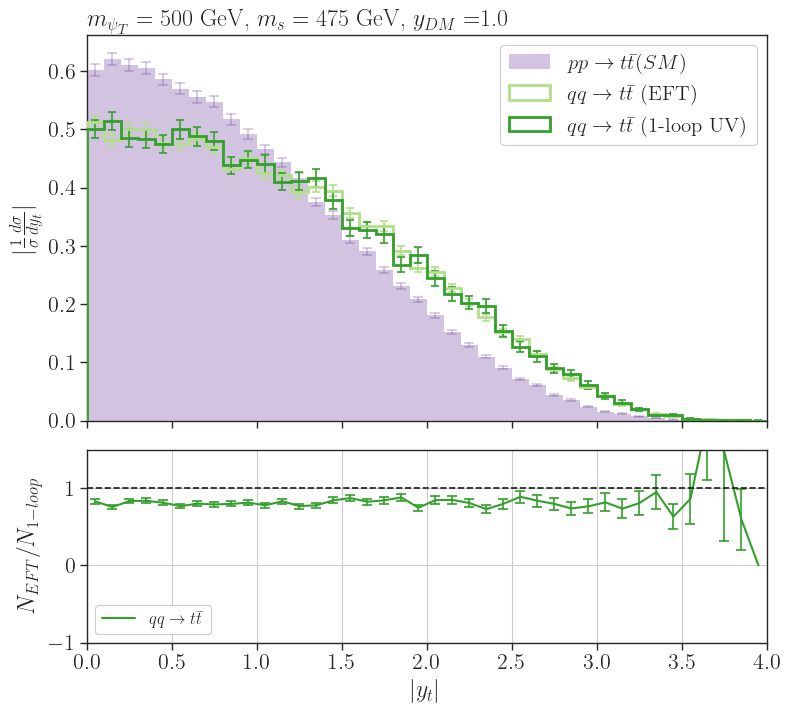

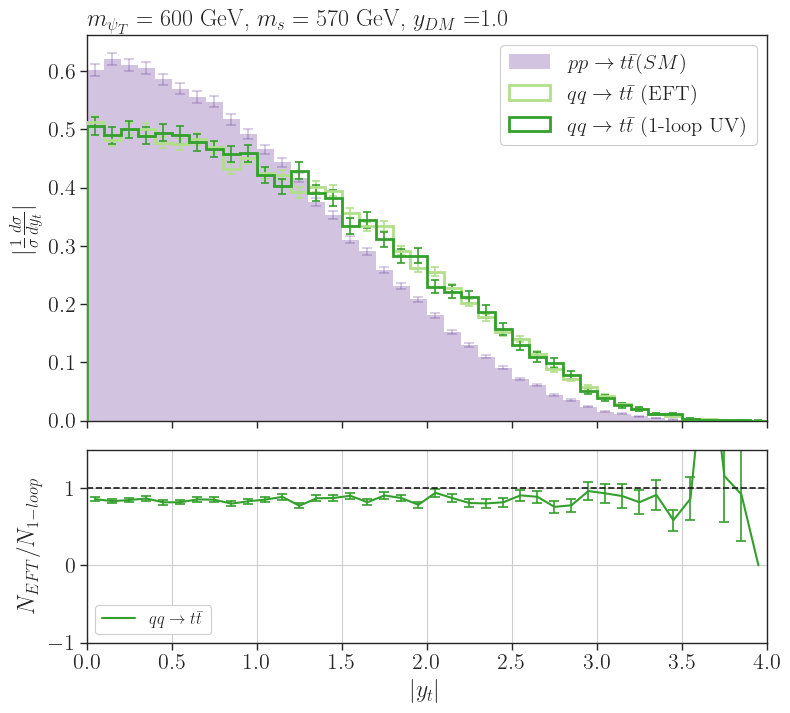

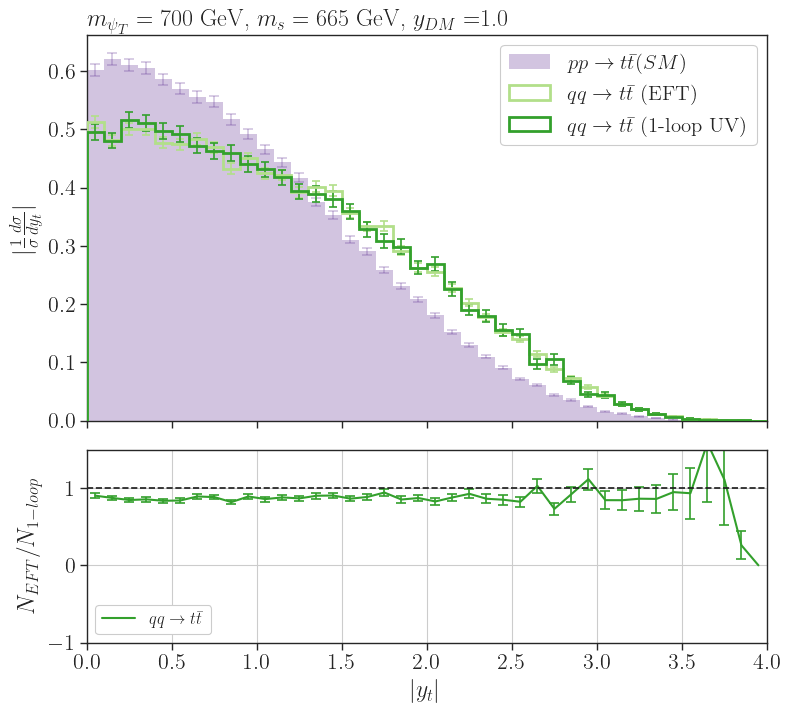

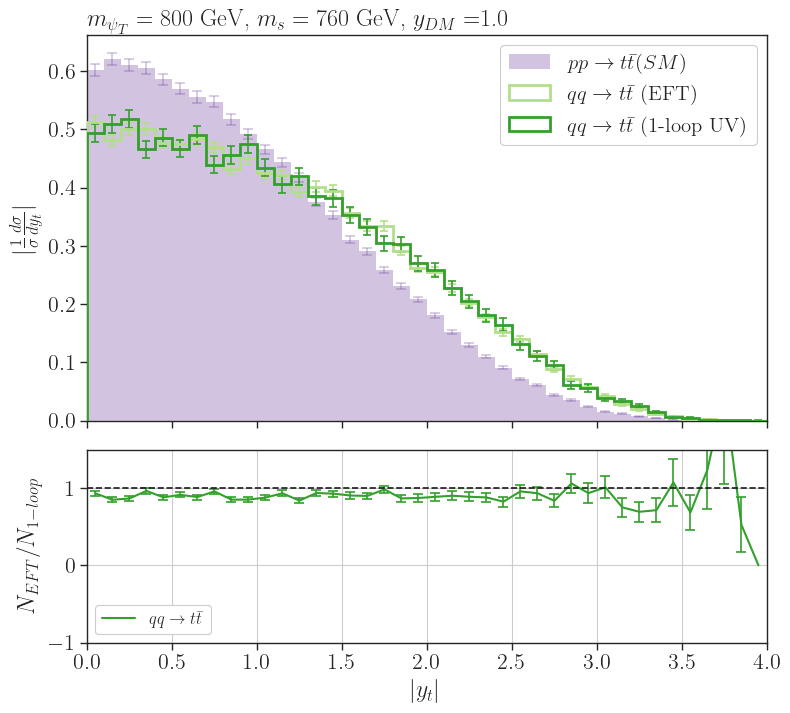

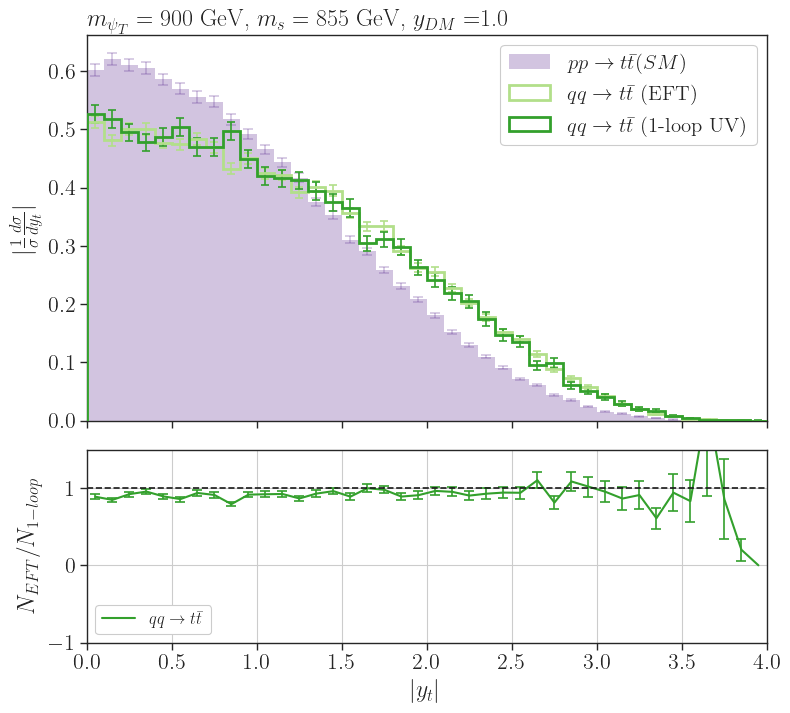

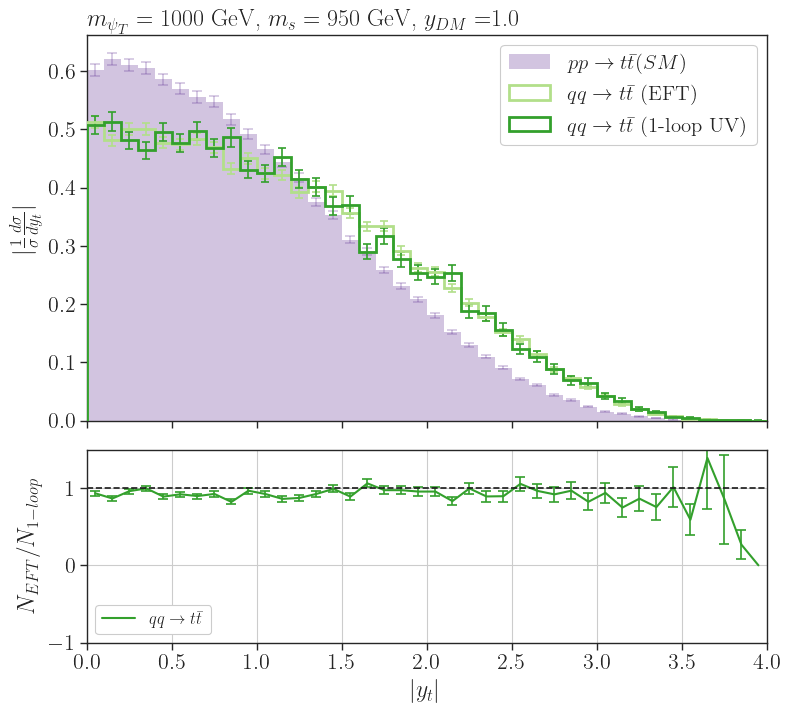

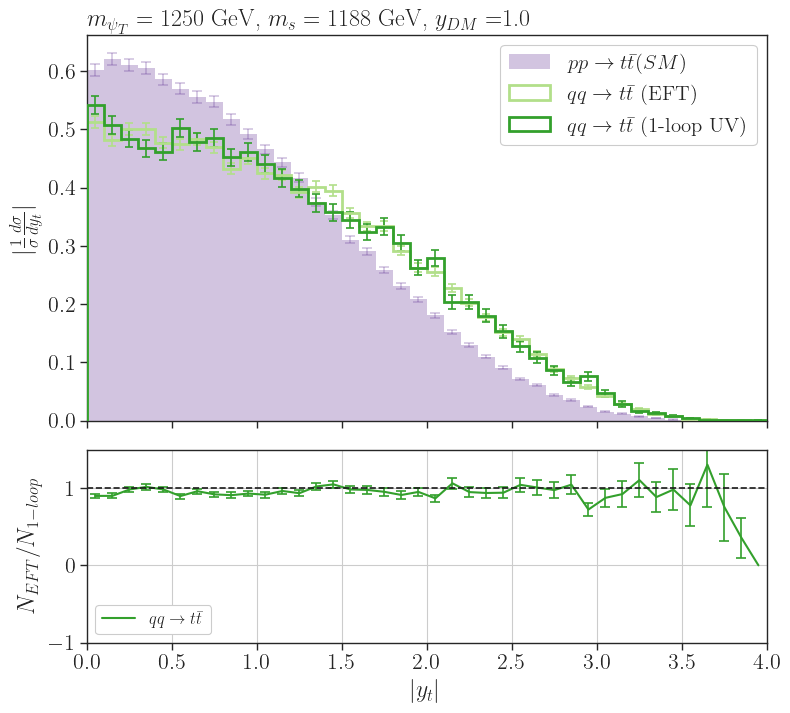

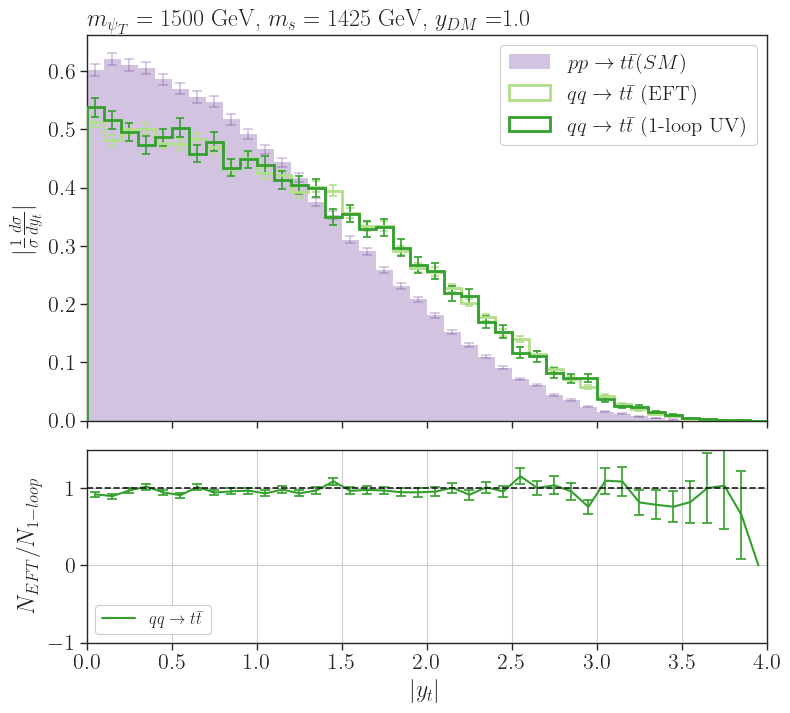

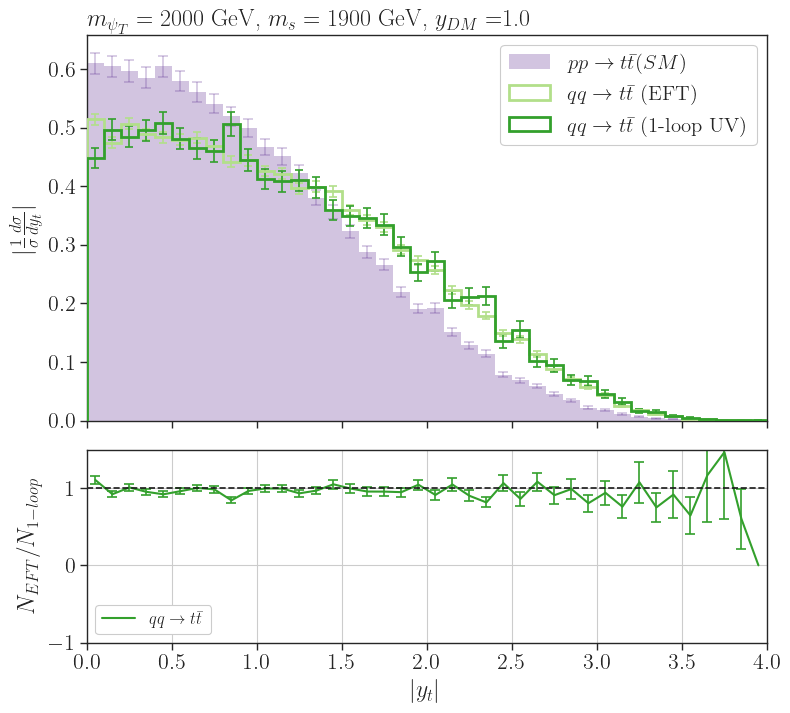

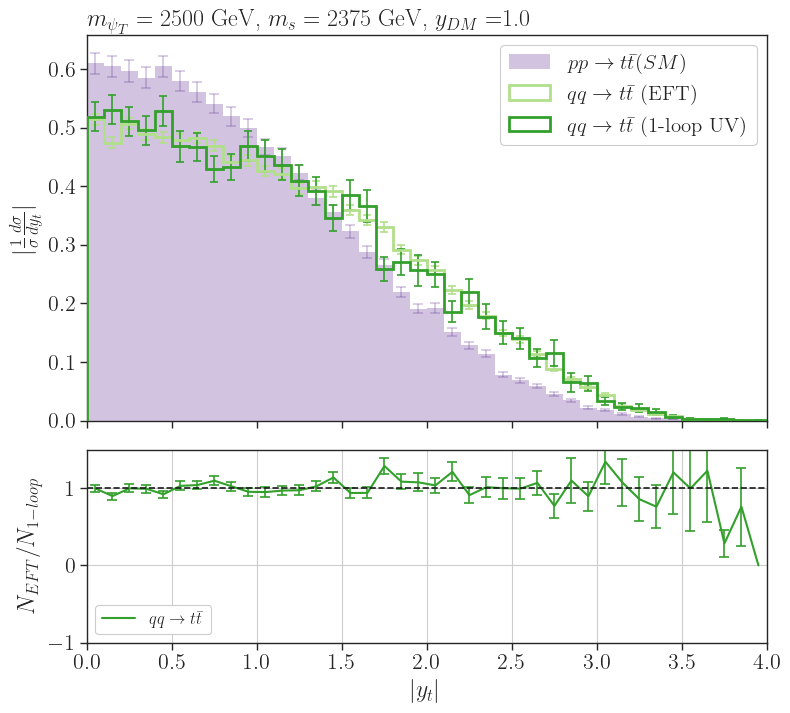

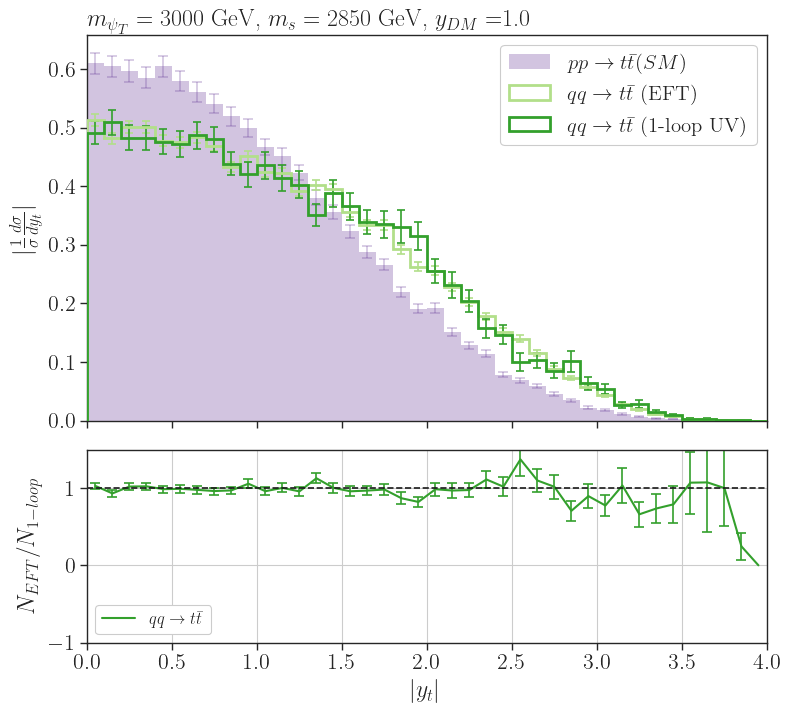

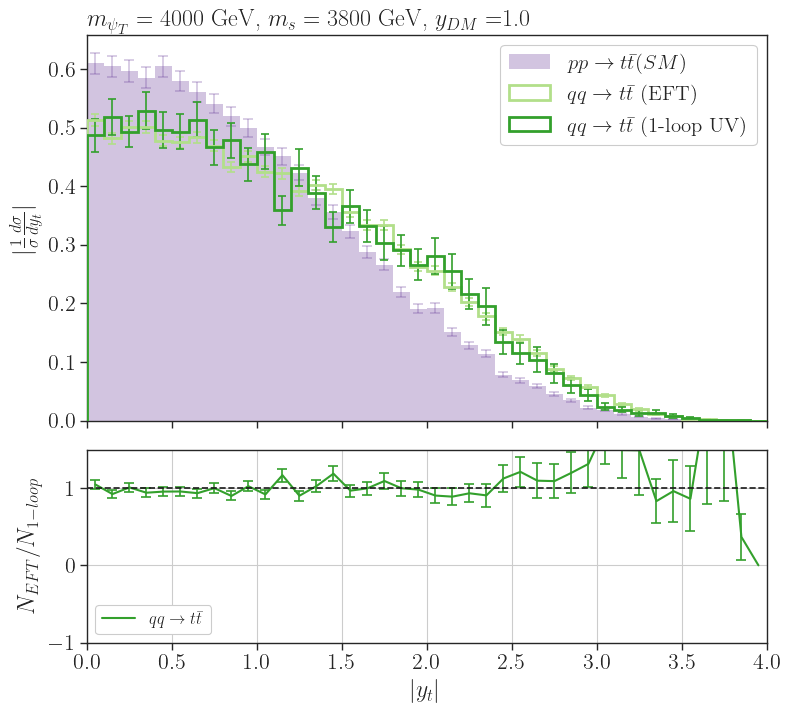

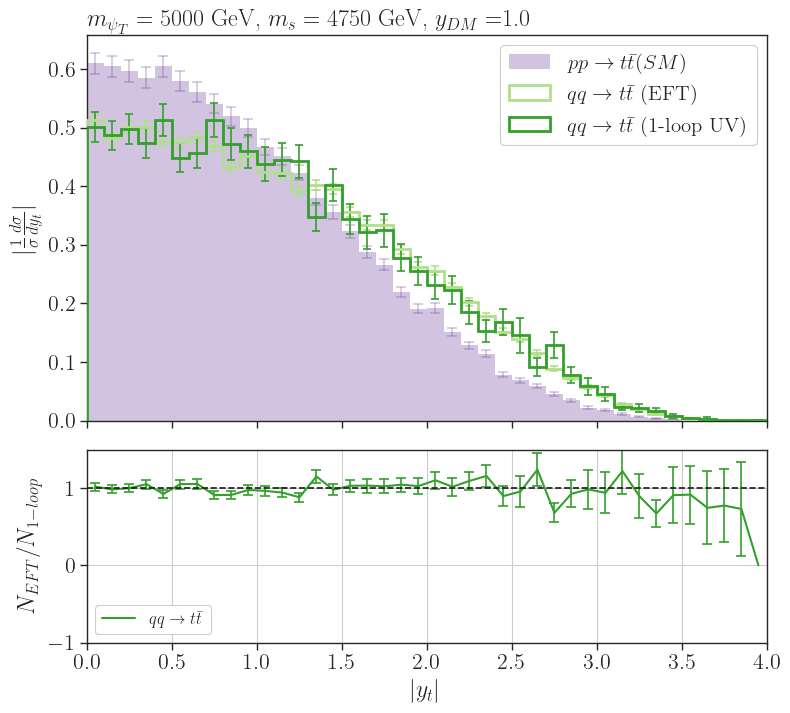

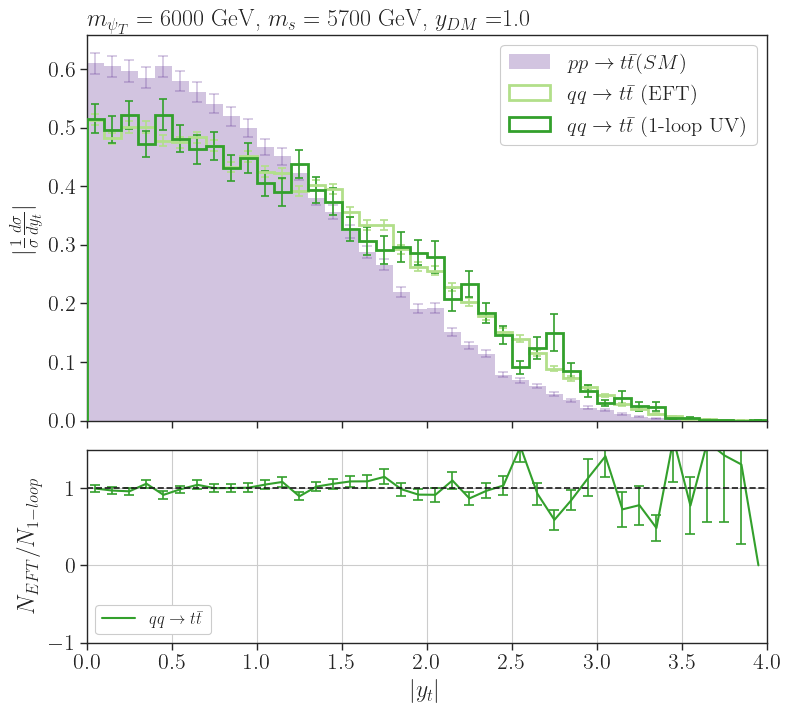

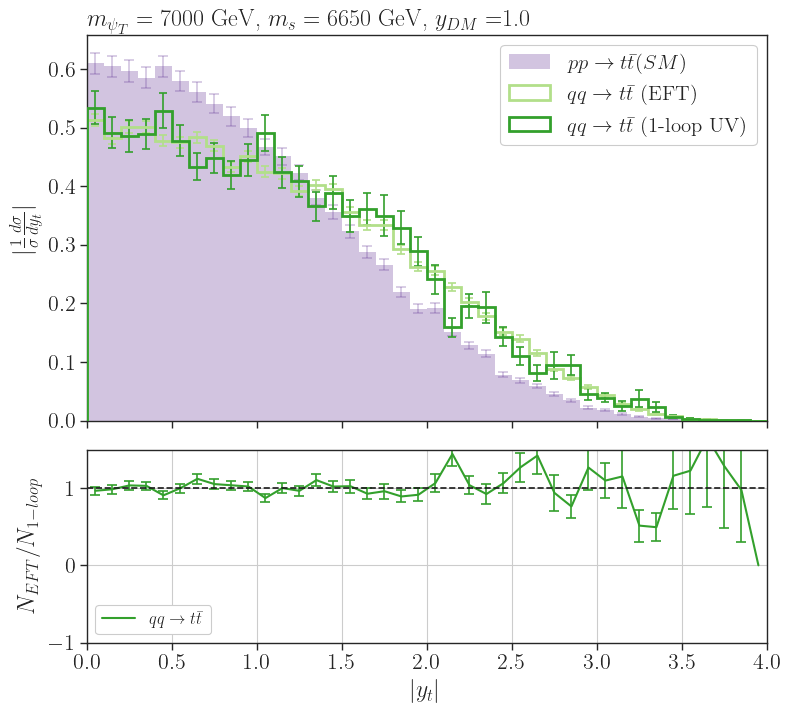

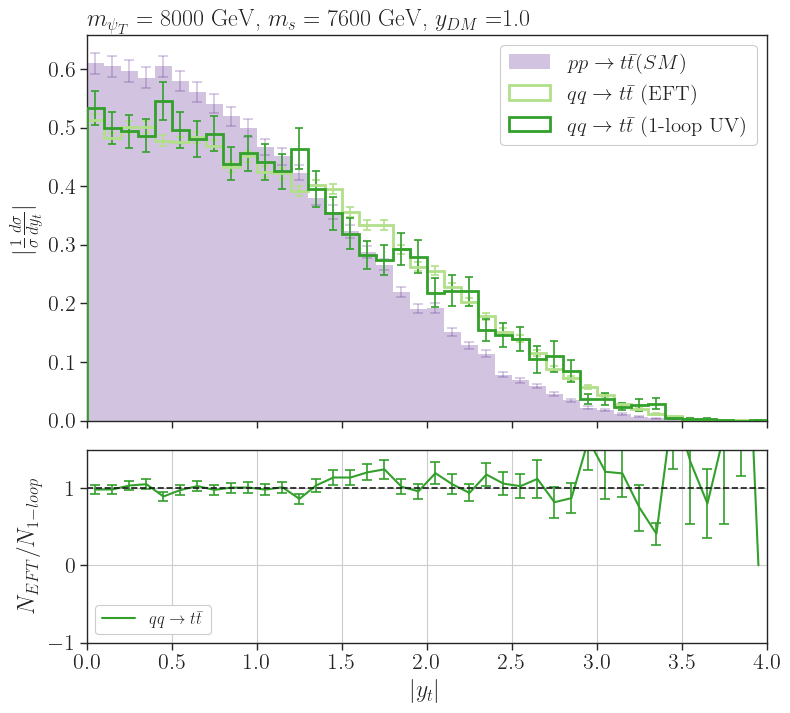

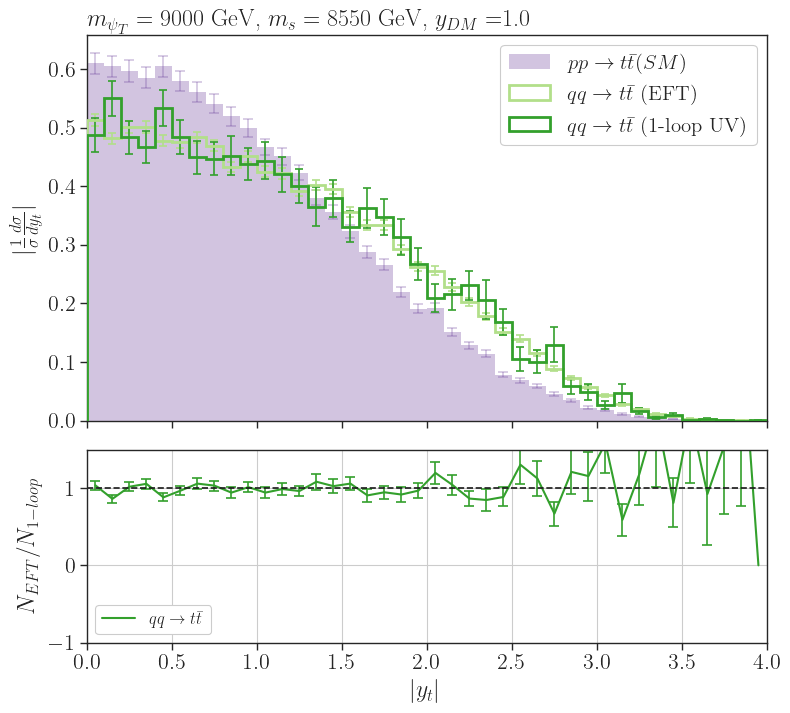

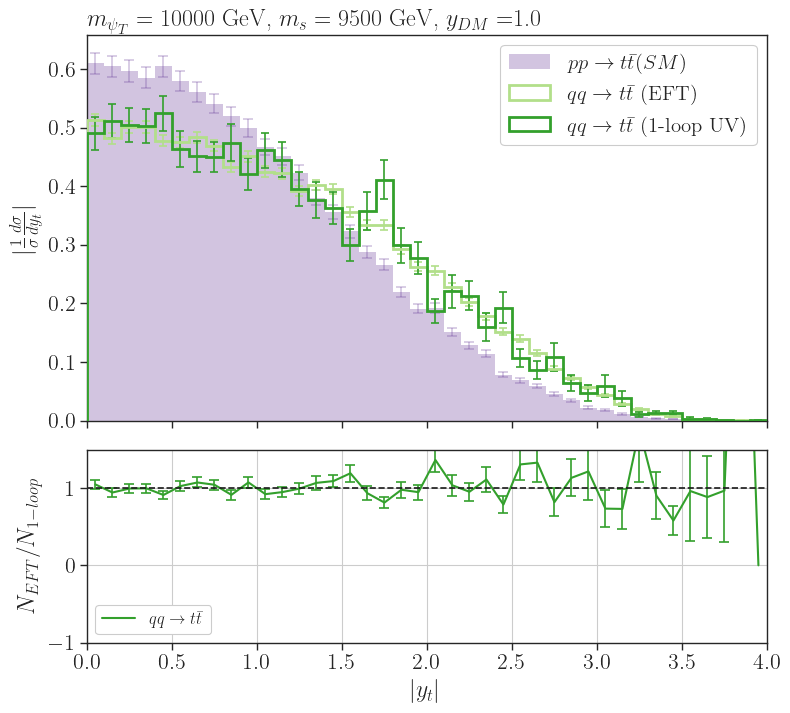

In [62]:


# Generating the BSM histograms and plotting them
# Coupling value
yDM = 1.0
dist = 'y_t'
#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']
    #Defining the binning according to the BSM masses
    
    bins = np.arange(0.0,4.1,0.1)
    #Loop over the processes and models

    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(abs(d[dist]),bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(abs(d[dist]),bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(abs(d[dist]),bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(abs(d[dist]),bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    #axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d y_t}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    
    
    #Subplot configs
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$\vert y_t\vert$')
    
plt.show()

# Absolute value of the rapidity difference between the top and anti top $qq \to t\bar{t}$

$$\vert\Delta y_{t\bar{t}}\vert = \vert y_t - y_{\bar{t}} \vert$$

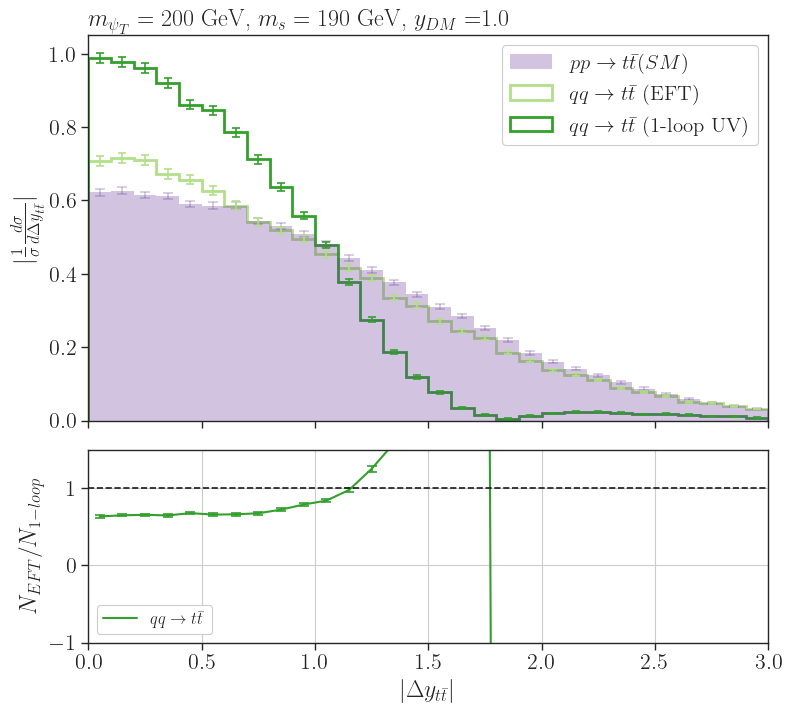

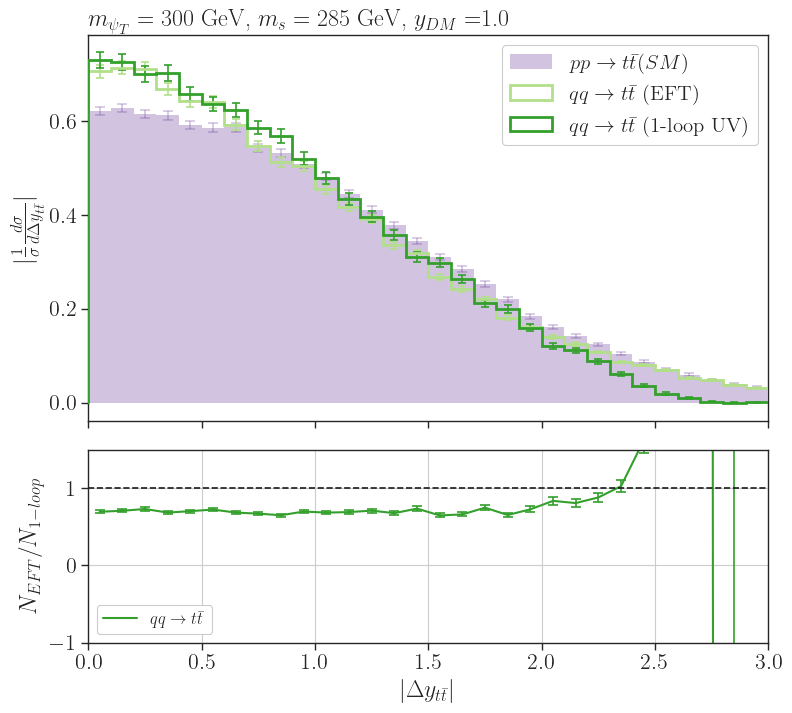

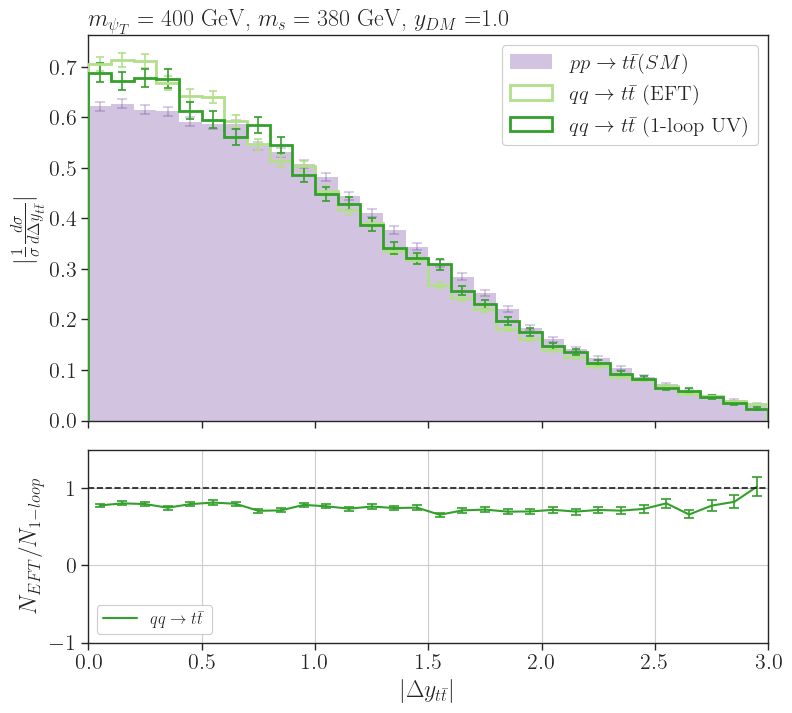

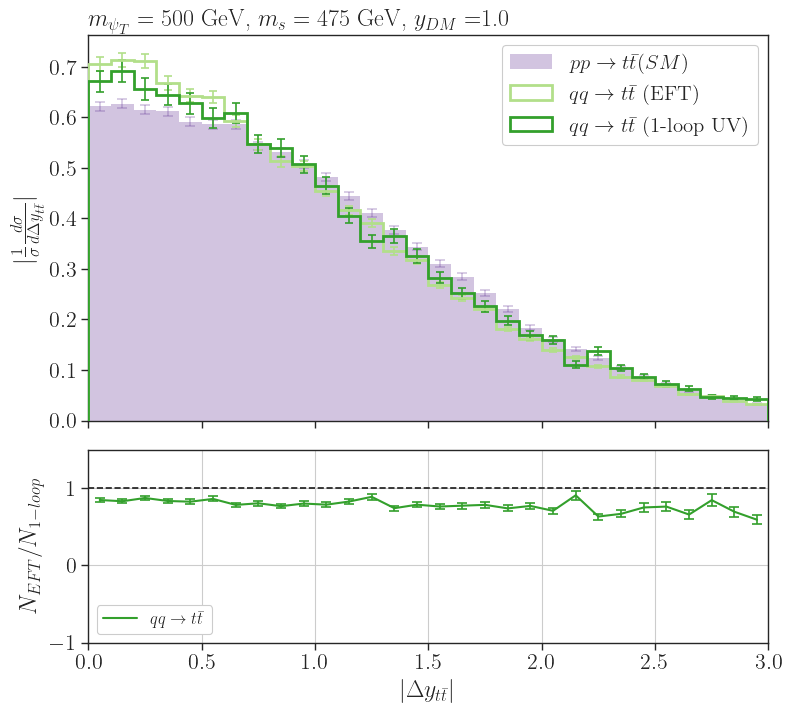

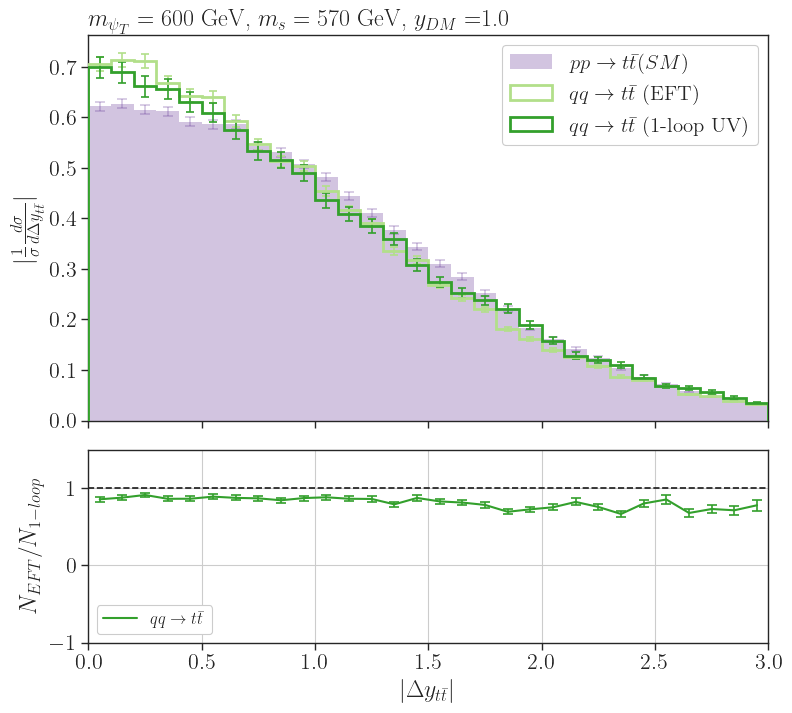

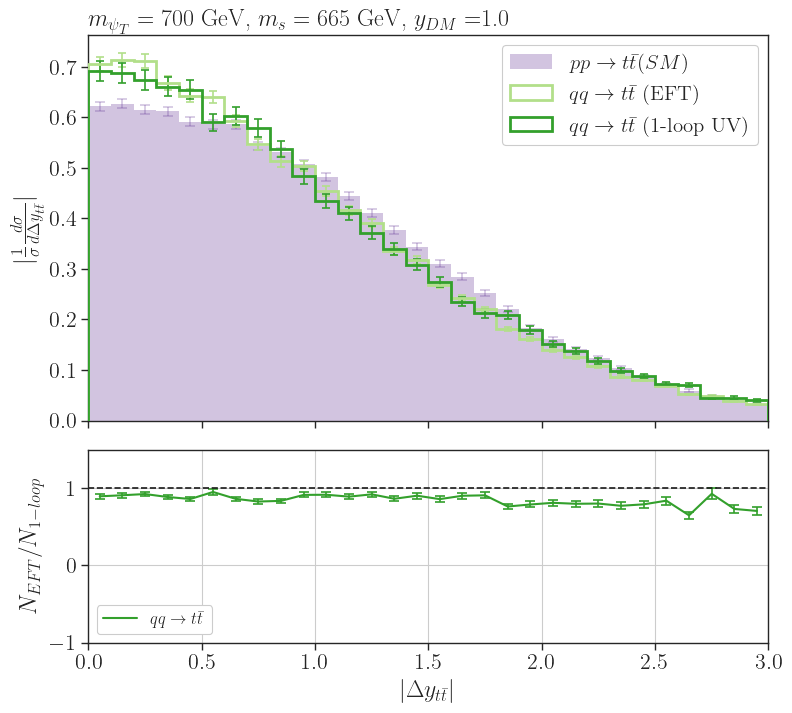

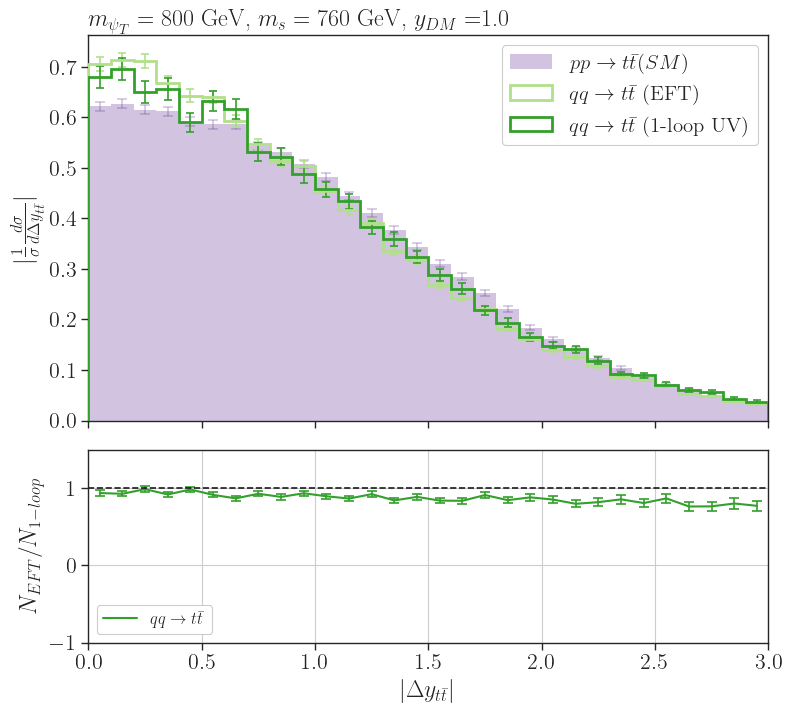

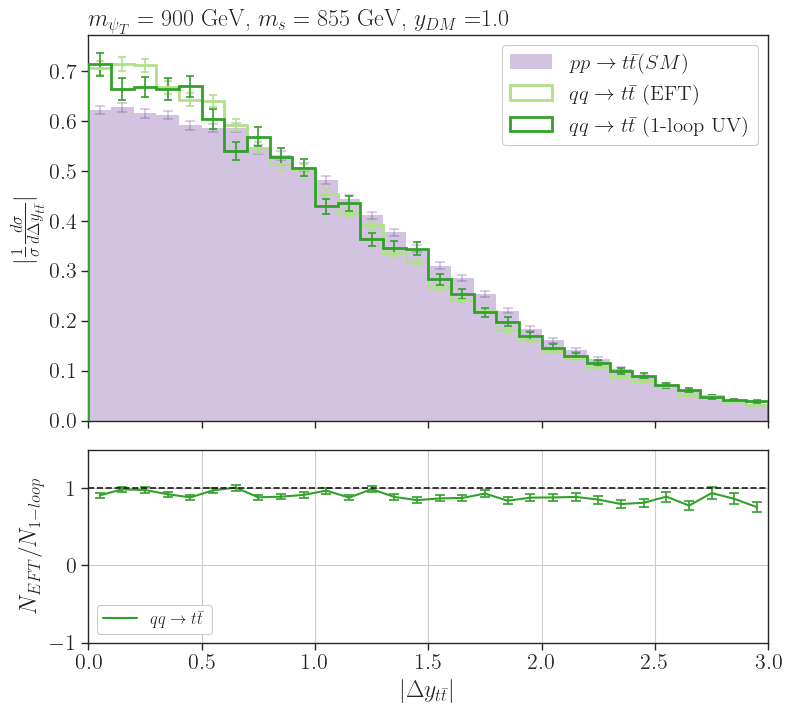

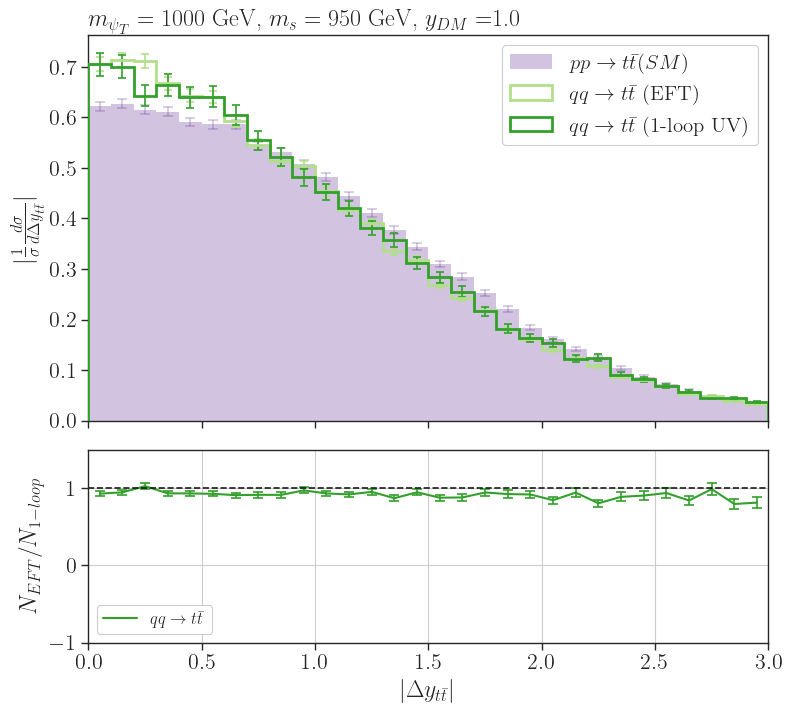

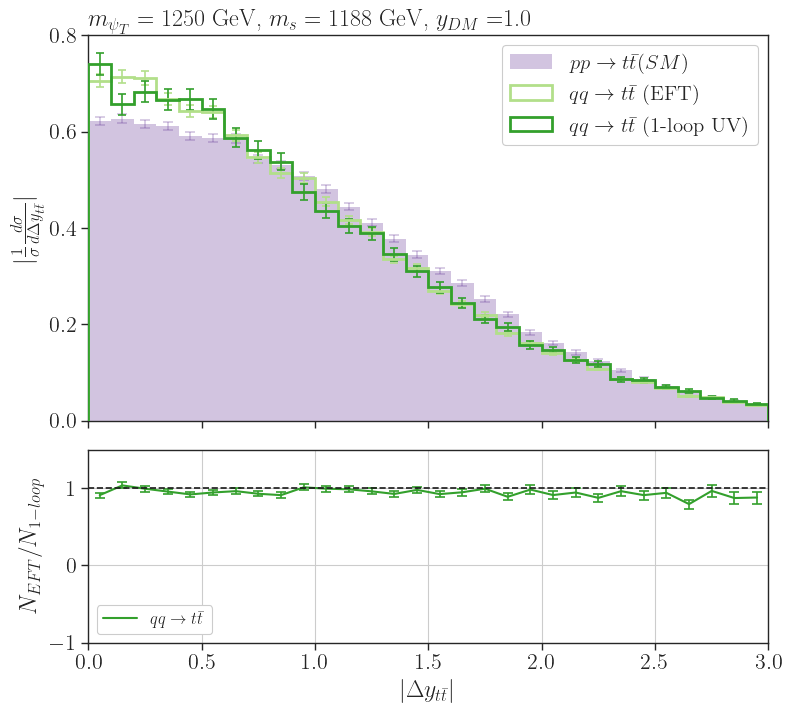

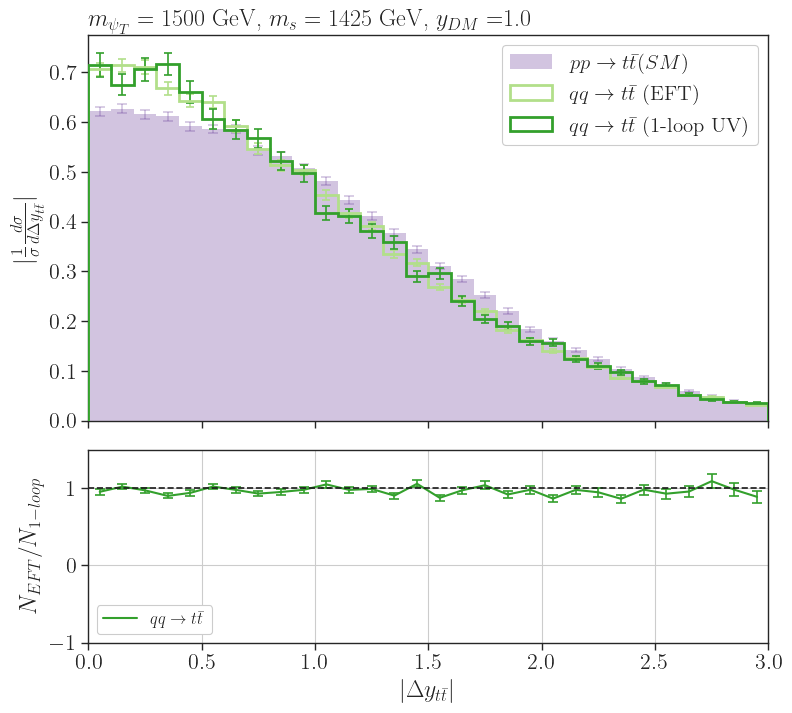

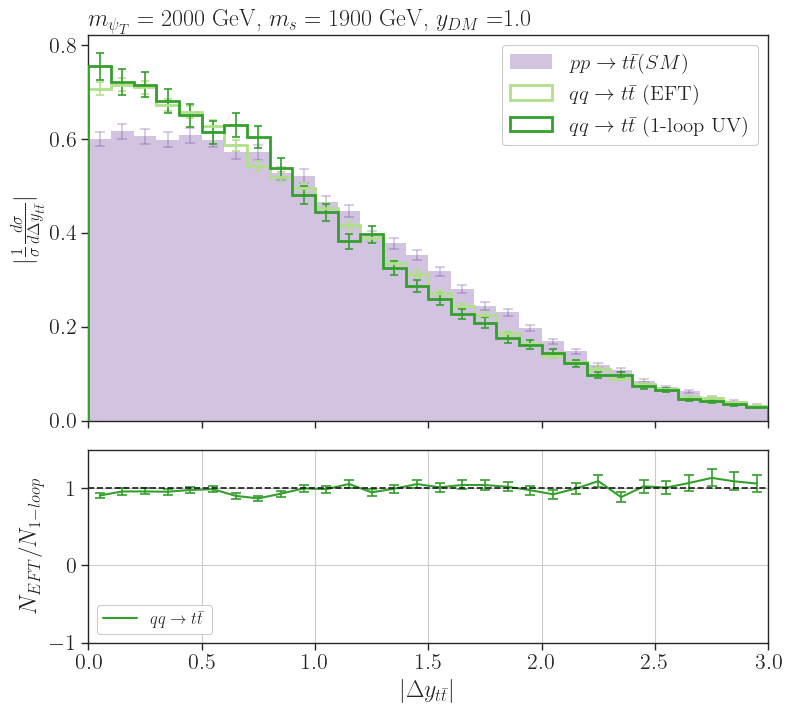

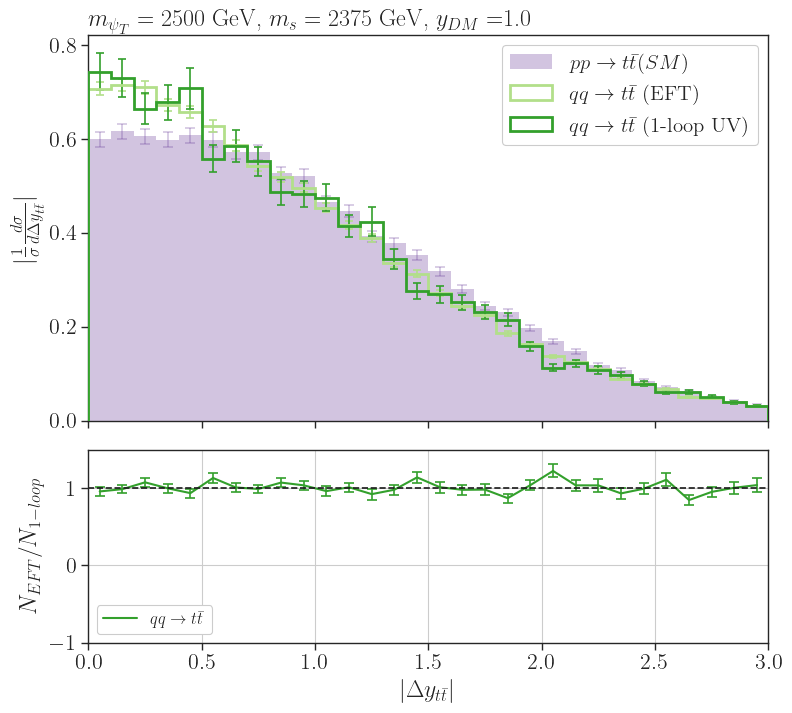

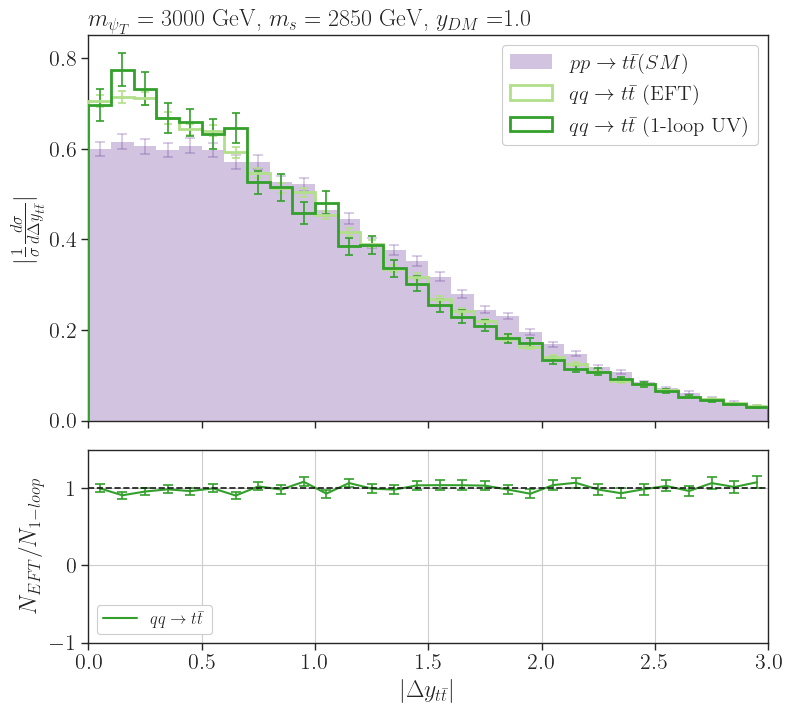

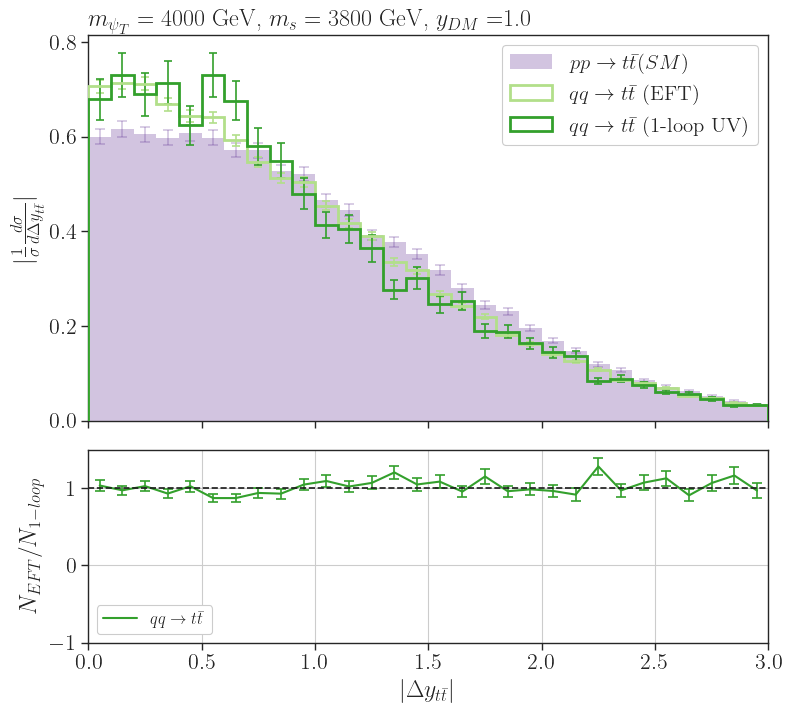

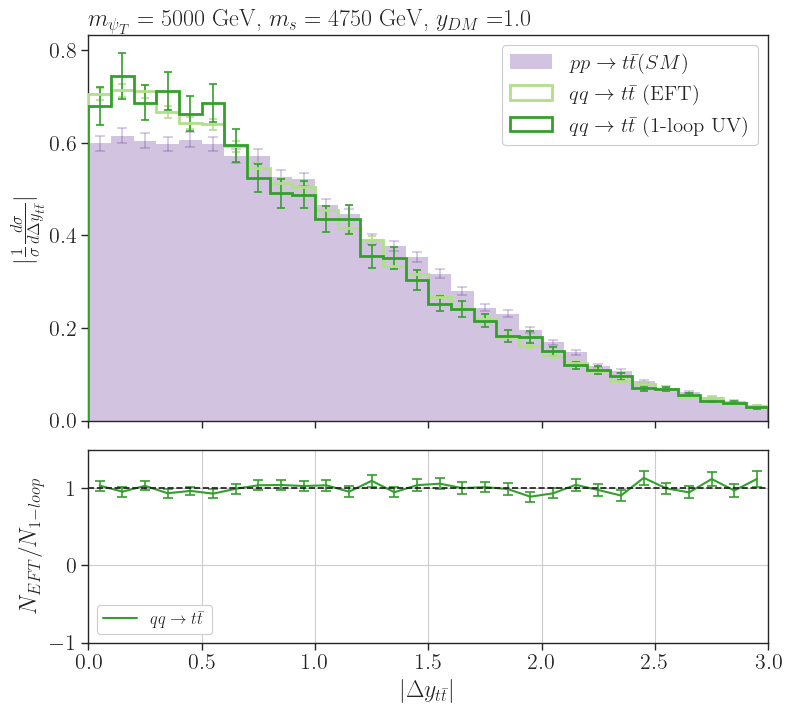

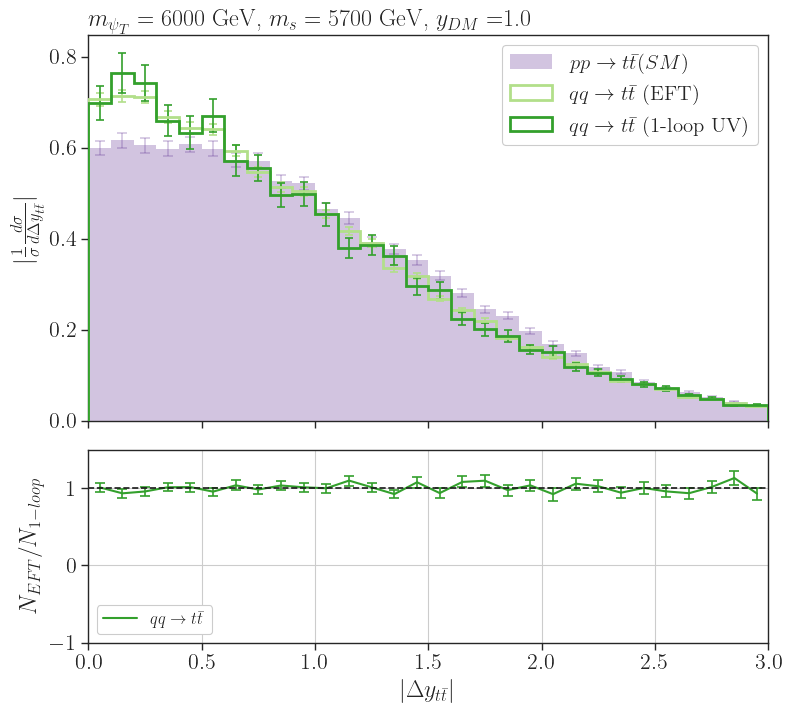

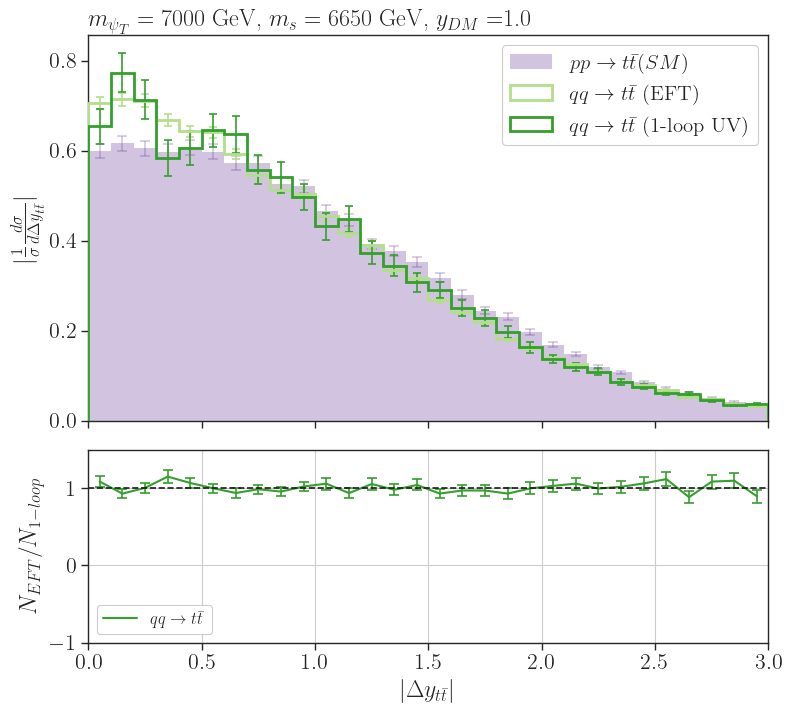

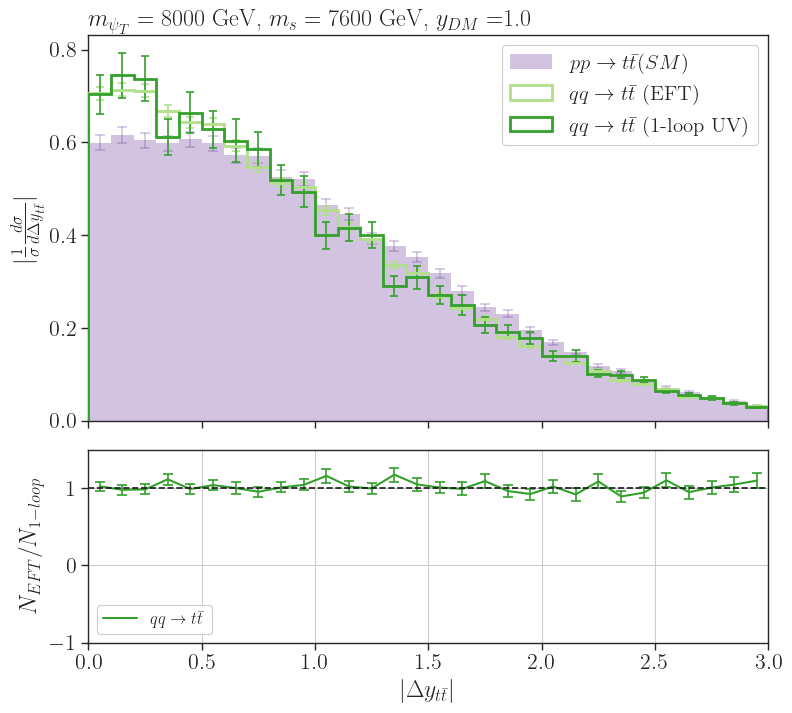

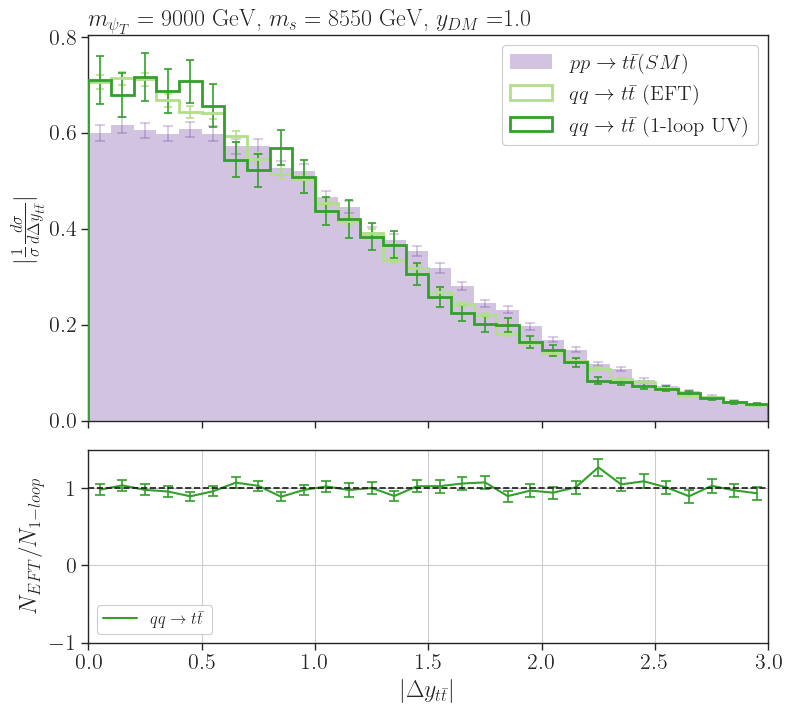

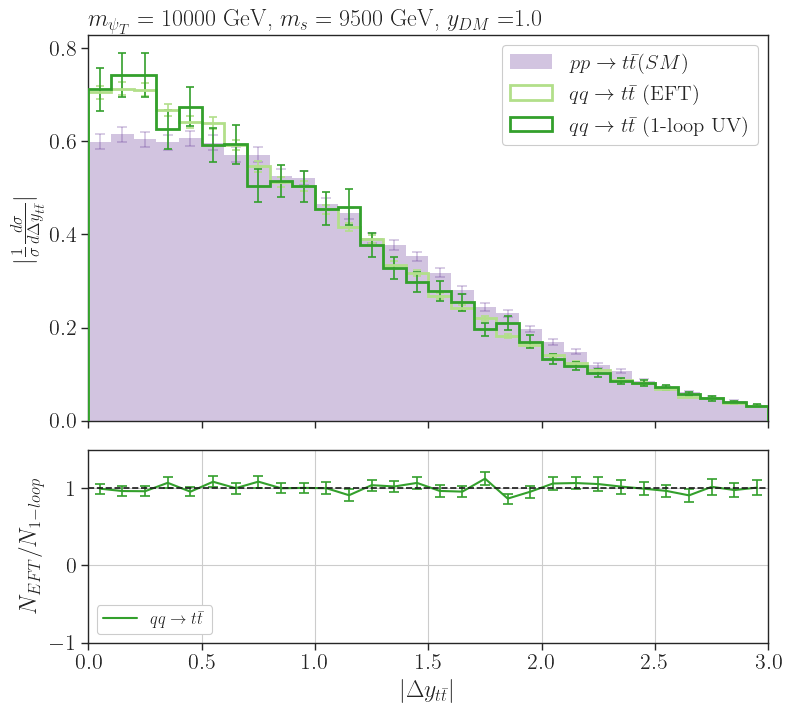

In [63]:


# Generating the BSM histograms and plotting them
# Coupling value
yDM = 1.0
dist = 'abs_delta_y'
#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']
    #Defining the binning according to the BSM masses
    
    bins = np.arange(0.0,3.1,0.1)
    #Loop over the processes and models

    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(abs(d[dist]),bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(abs(d[dist]),bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(abs(d[dist]),bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(abs(d[dist]),bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    #axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d \Delta y_{t\bar{t}}}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    
    
    #Subplot configs
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$\vert \Delta y_{t\bar{t}}\vert$')
    
plt.show()

# Absolute value of the difference of the absolute rapidity values $qq\to t \bar{t}$

$$\Delta \vert y_{t\bar{t}} \vert = \vert y_t \vert - \vert y_{\bar{t}} \vert$$

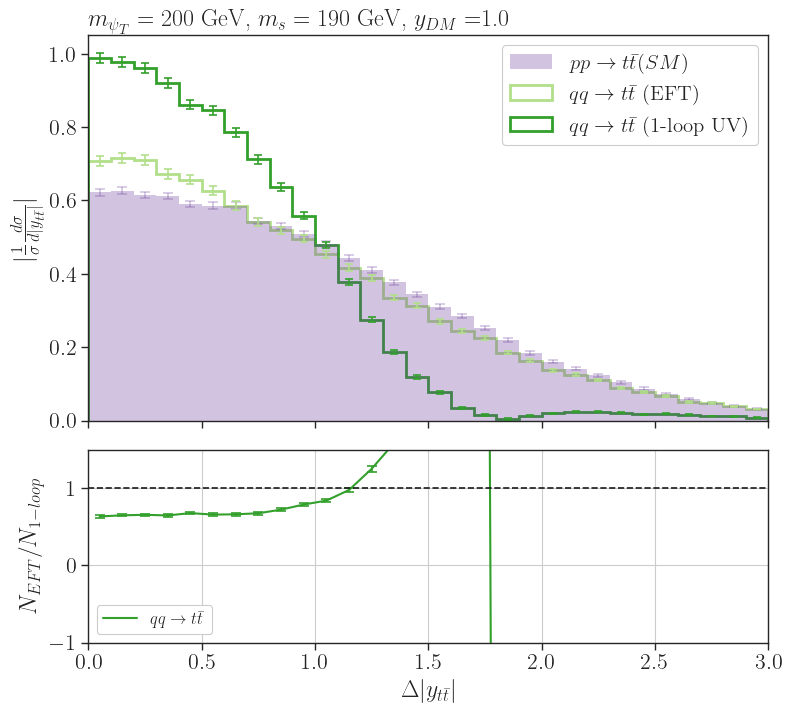

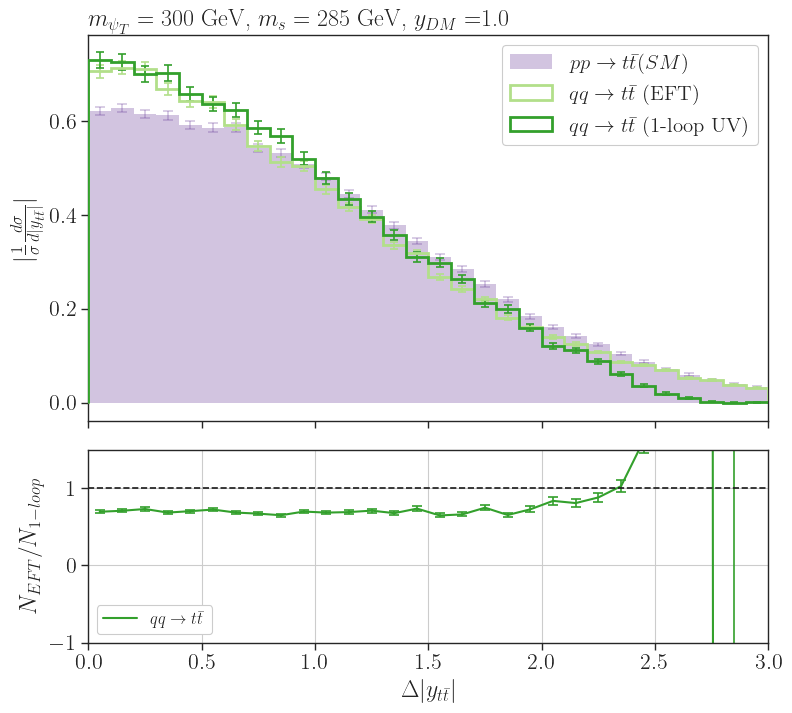

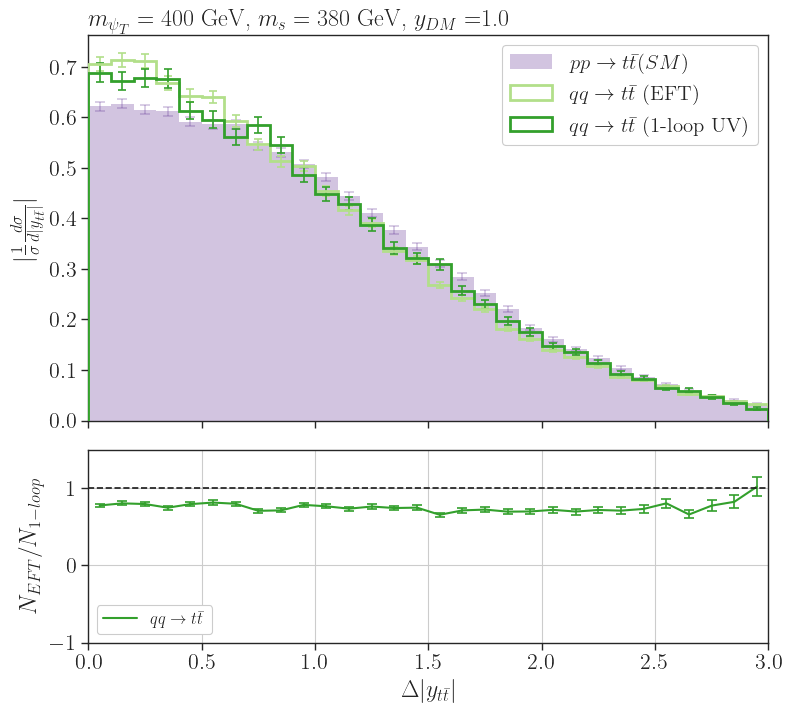

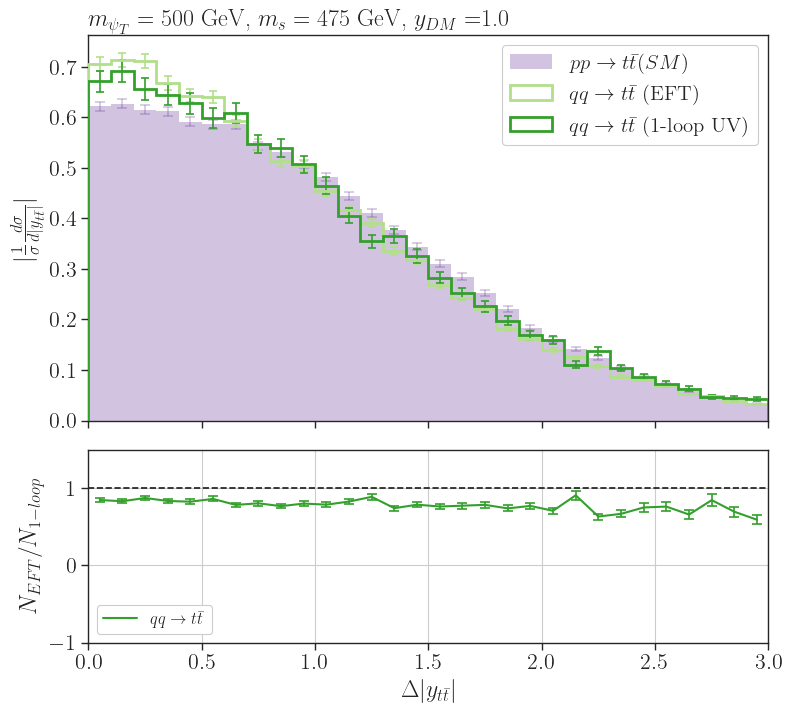

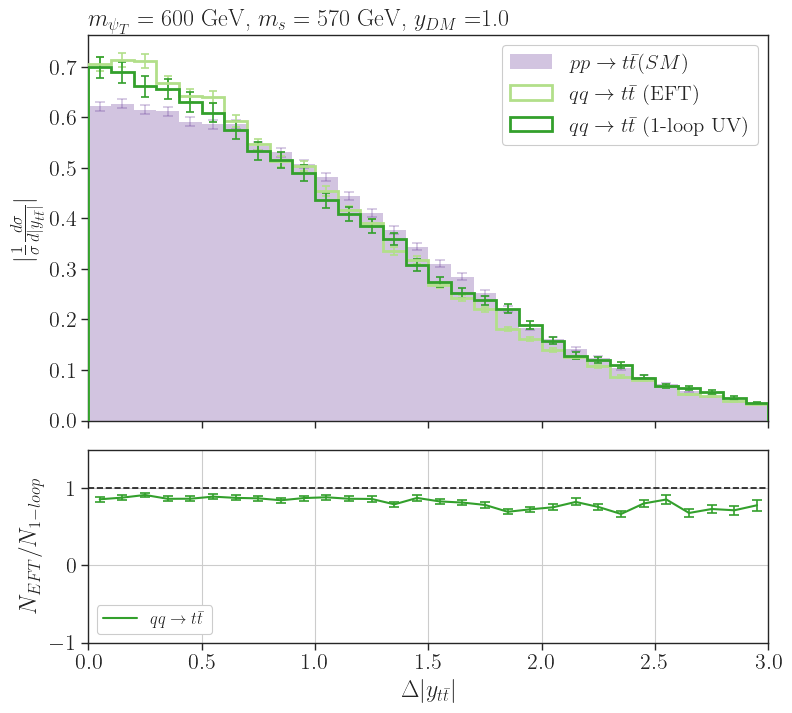

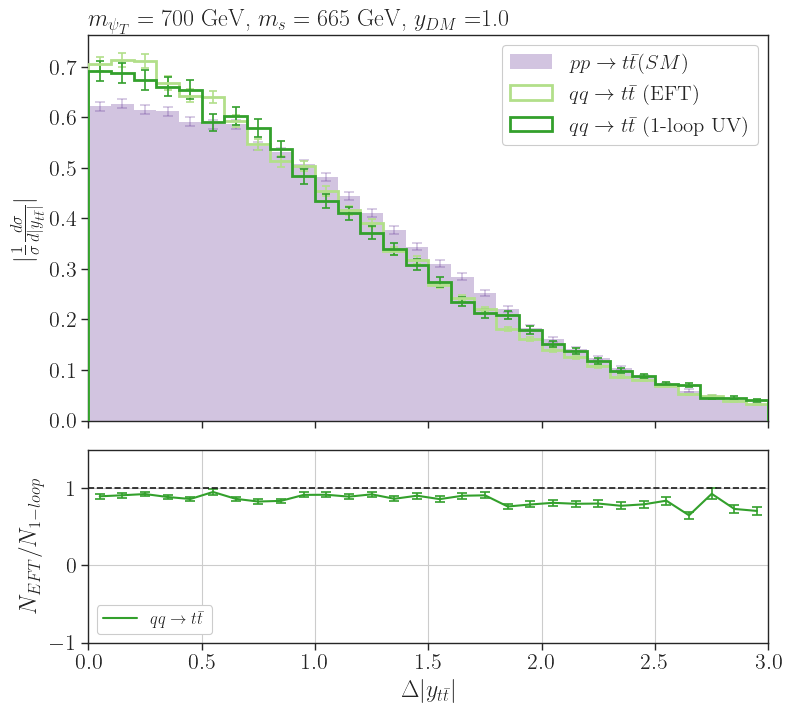

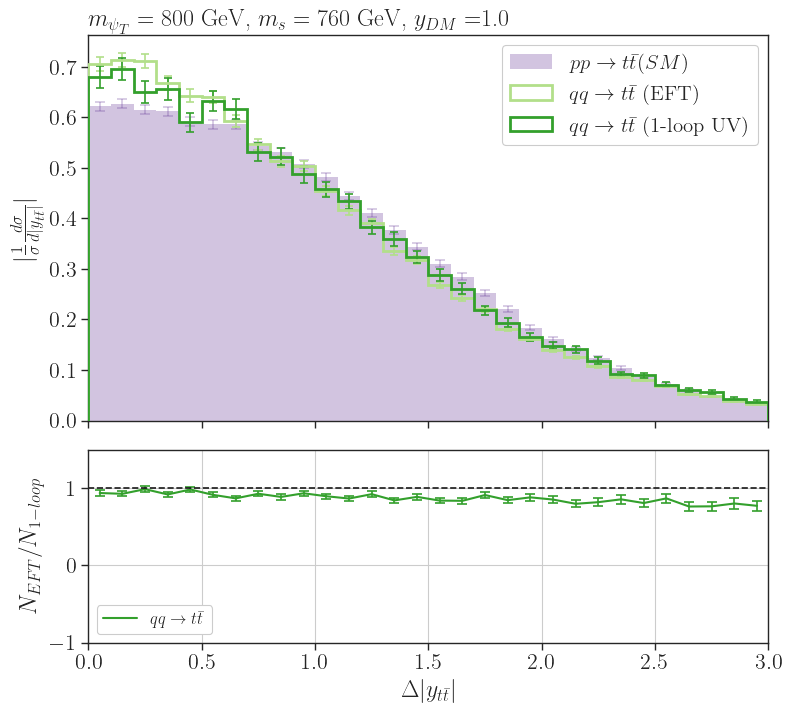

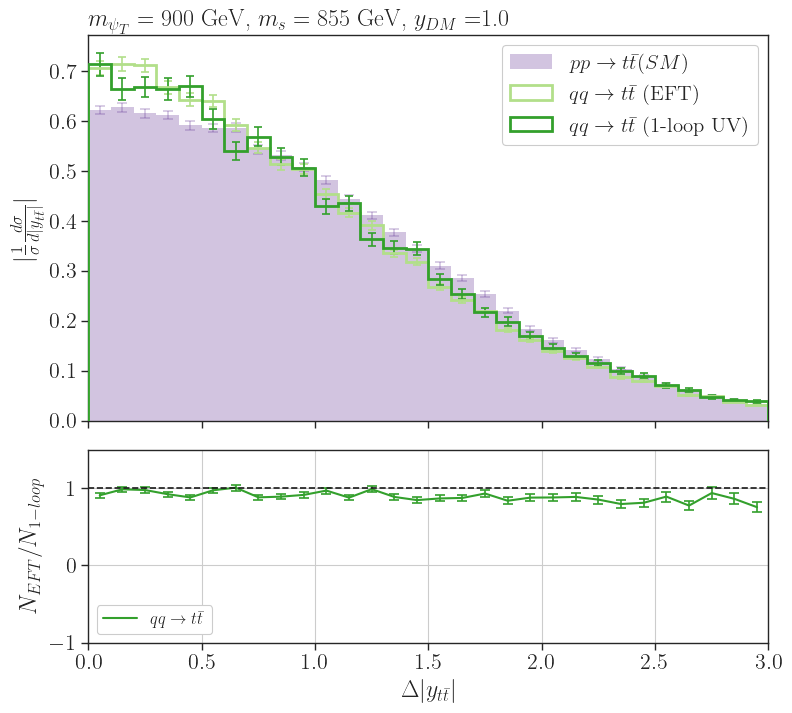

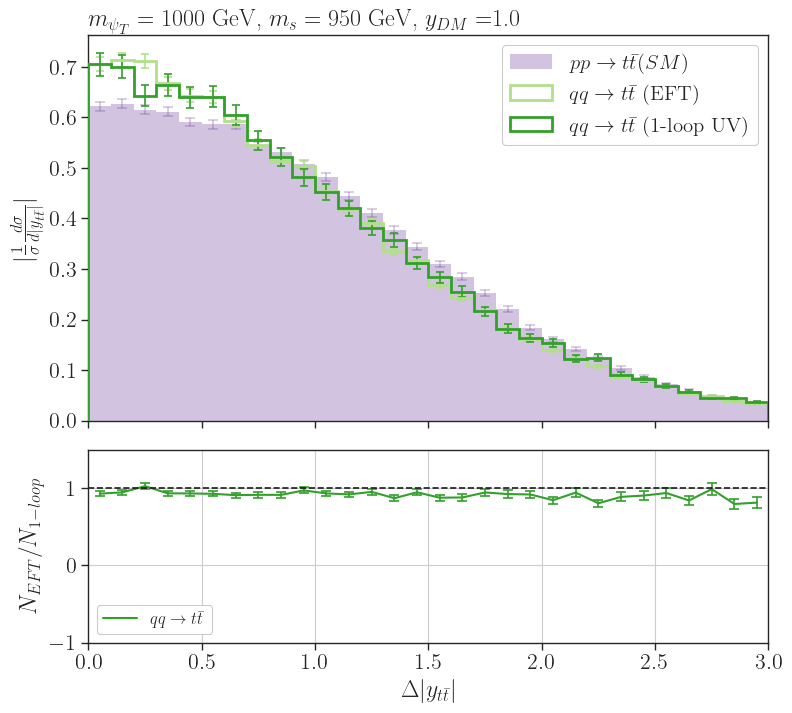

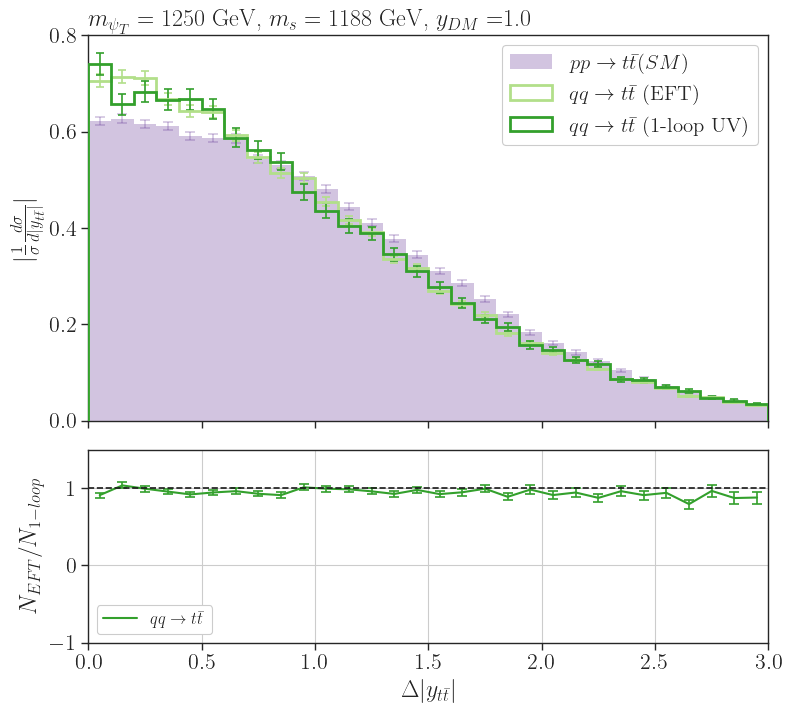

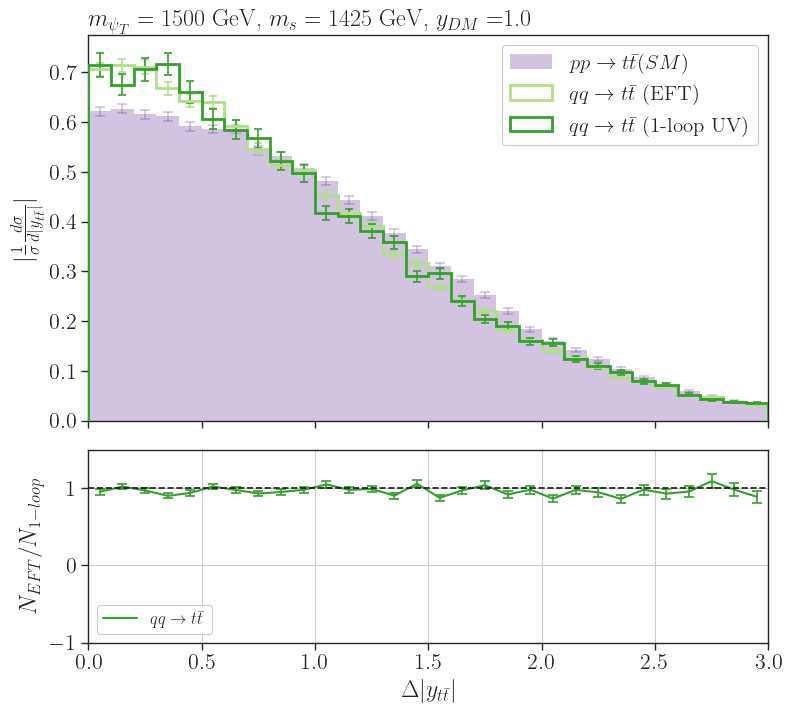

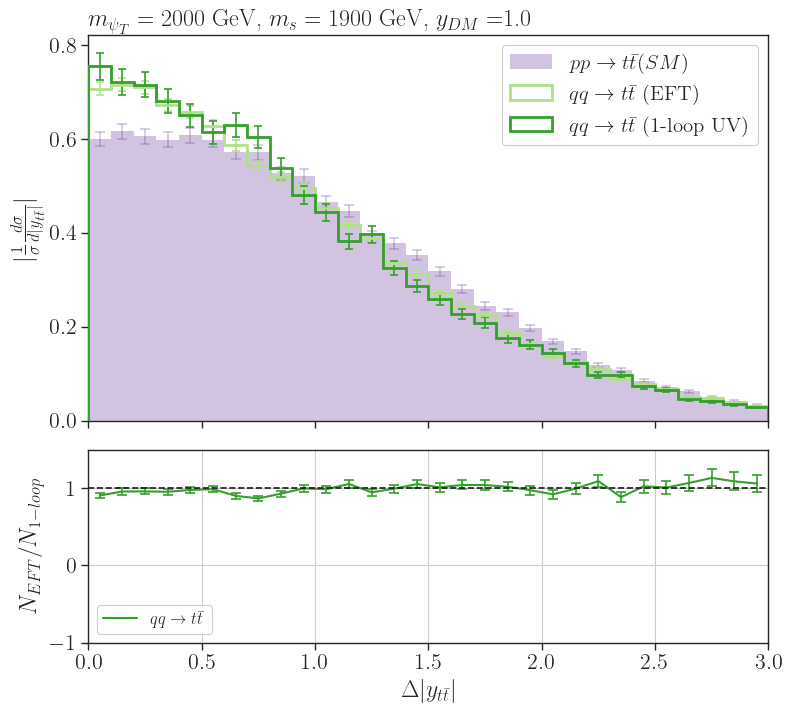

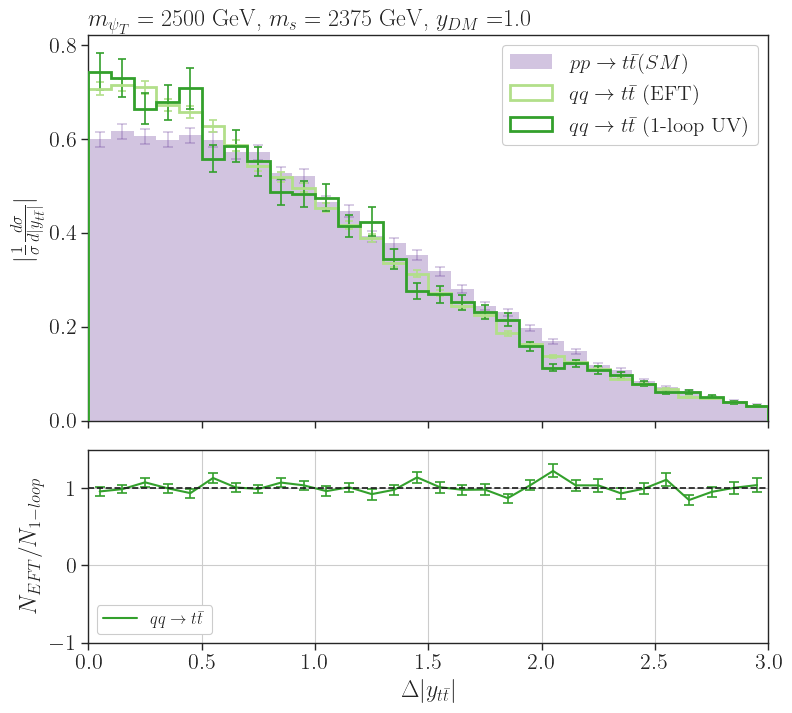

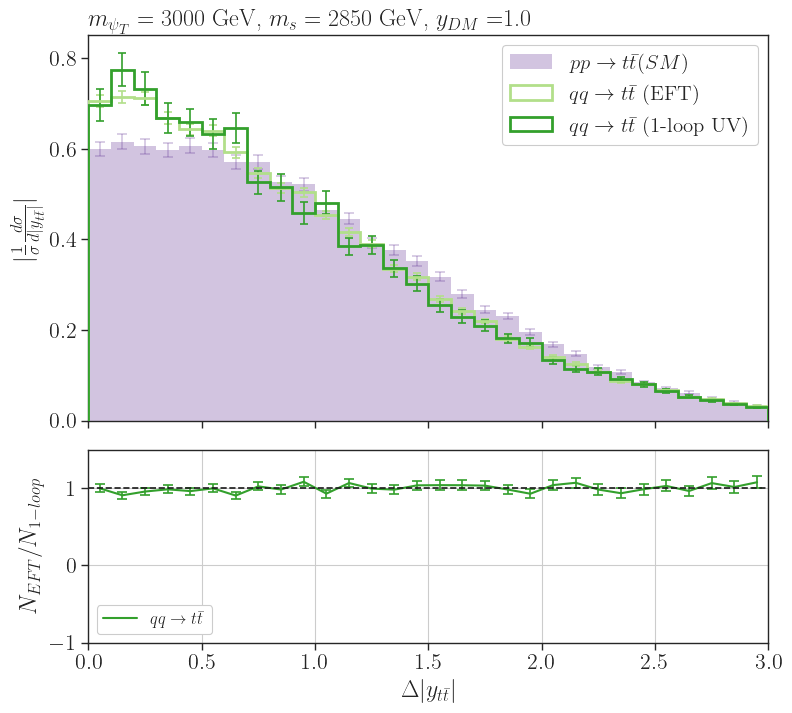

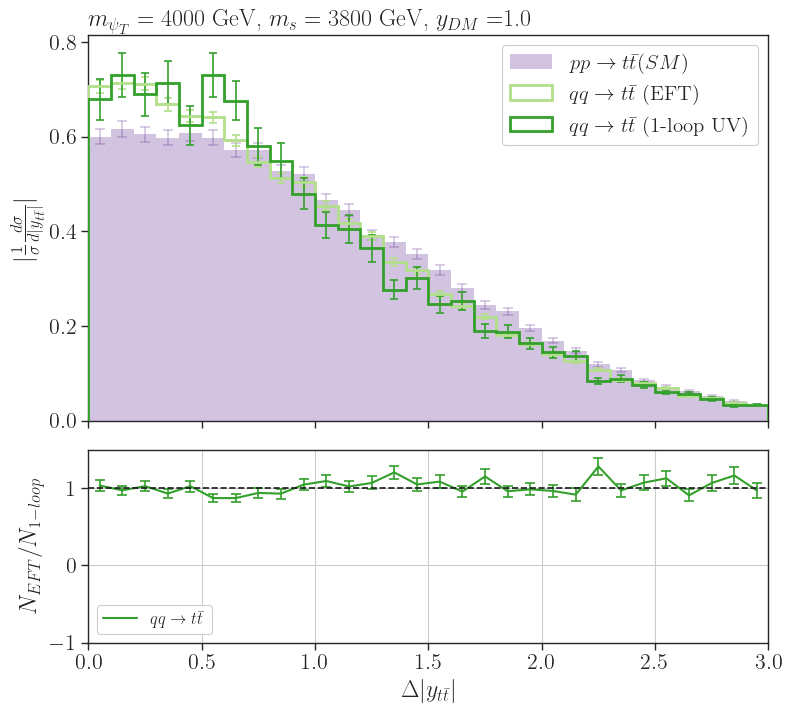

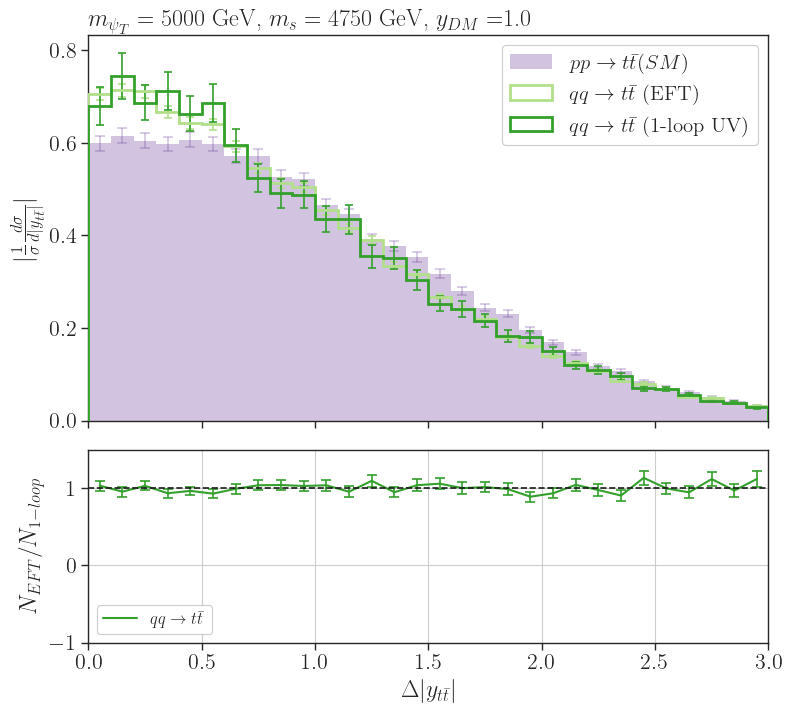

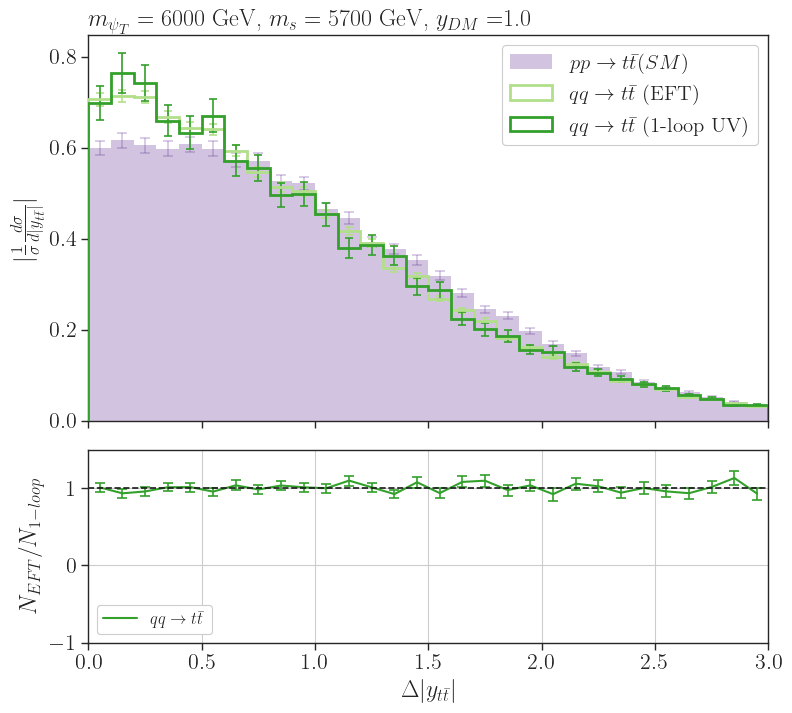

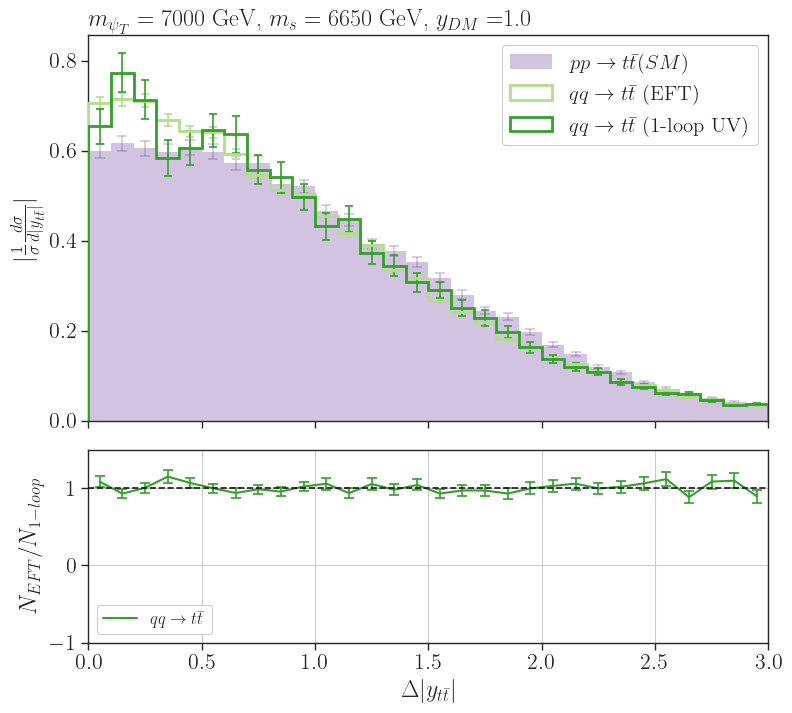

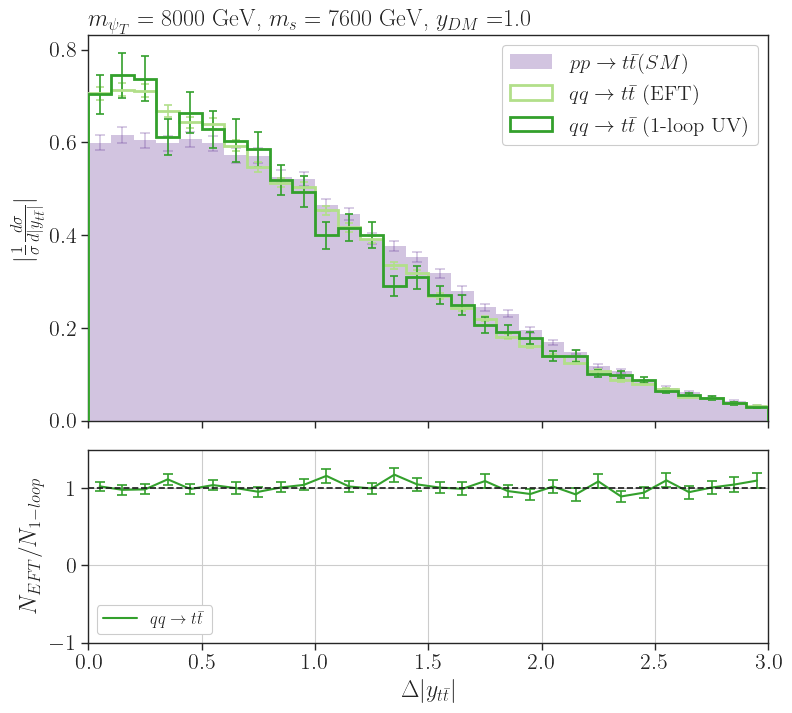

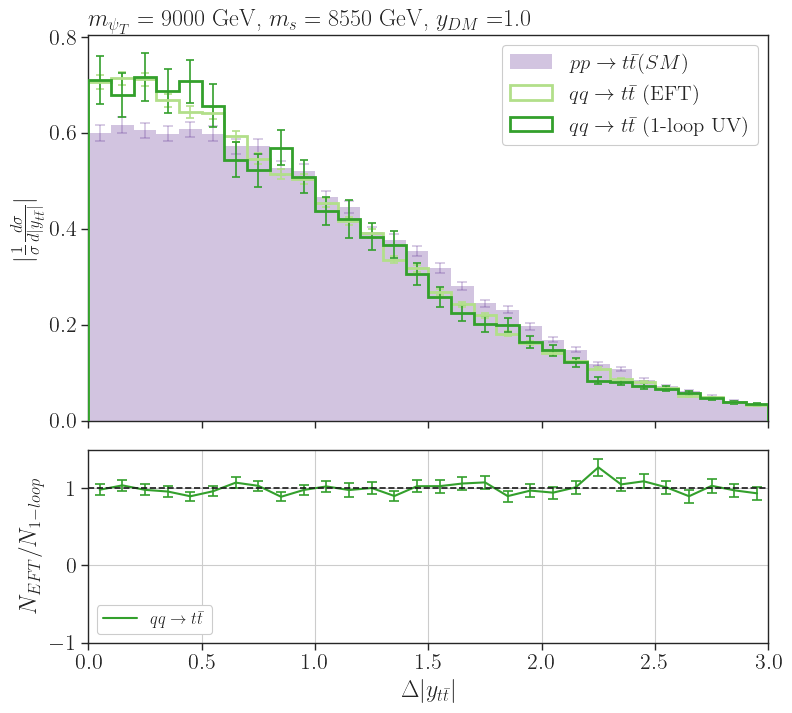

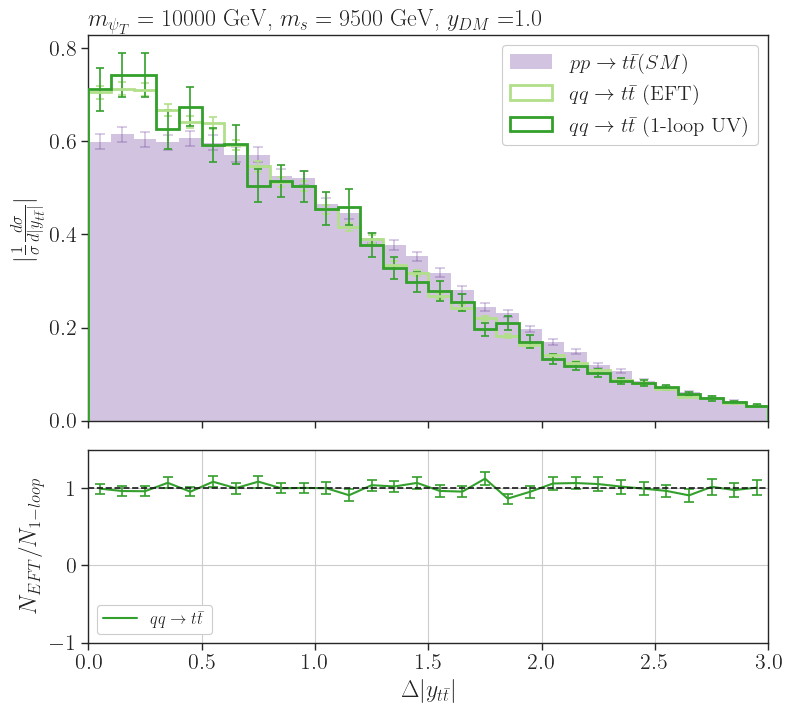

In [64]:


# Generating the BSM histograms and plotting them
# Coupling value
yDM = 1.0
dist = 'abs_delta_y'
#Loop over the masses configurations. Each mass configuration has 2 models with 2 processes each
for i in range(0, len(data), 4):
    #Selecting the models and process for the same mass configuration
    selected = data[i : i+4]

    #Defining the space for the two plots 
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    #Variables used to store hist info
    #BSM masses
    mPsiT,mSDM = selected[0]['mass_params']
    #Defining the binning according to the BSM masses
    
    bins = np.arange(0.0,3.1,0.1)
    #Loop over the processes and models

    #SM plot
    labels_sm = []
    pmodels = []
    hists_sm = []
    histsErr_sm = []
    hists_sm_norm = []

    if mPsiT > 1500.:
        selected_sm = data_sm[-1]
    else:
        selected_sm = data_sm[-2]

    for d in selected_sm:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels_sm.append(label)
        h,_ = np.histogram(abs(d[dist]),bins=bins,weights=d['weights'])
        hists_sm.append(h)
        #Compute MC error
        hErr,_ = np.histogram(abs(d[dist]),bins=bins,weights=(np.array(d['weights']))**2)
        hErr = np.sqrt(hErr)    
        histsErr_sm.append(hErr)
    #Plotting the SM hist
    aux = axarr[0].hist(bins[:-1],weights=np.abs(sum(hists_sm)),label=r'$p p \to t\bar{t} (SM)$',bins=bins,
                          color=sns.color_palette('Paired')[9],alpha=0.3,histtype='step',density=True,
                         linewidth=0,fill=True,stacked=True,linestyle='solid')
    #Storing the normalized histogram
    hists_sm_norm.append(aux[0])

    #Plotting the SM error
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #We have to propagate the error because we are using density = True
    yErr = abs(y)*np.sqrt((np.array(histsErr_sm[2])/np.array(hists_sm[2]))**2 + sum(np.power(histsErr_sm[2],2))/(sum(hists_sm[2])**2))  
    #Plot
    axarr[0].errorbar(x,y, yerr = yErr,
                    color=sns.color_palette('Paired')[9], fmt = 'none', ms = 5, capsize = 3.5, capthick = 1.2, 
                      ecolor =sns.color_palette('Paired')[9], barsabove = True, alpha = 0.3)
    
    #variables to store info
    labels = []
    pmodels = []
    hists = []
    histsErr = []
    hErr_norm = []
    c = []
    hists_norm = []
    
    for j,d in enumerate(selected):
        if r'$g g \to t \bar{t}$' in d['process']:
            labels.append('0')
            c.append('0')
            continue
        else:
            process = d['process']
            model = d['model']
            weights = d['weights']
            pmodels.append(r'%s (%s)' %(process,model))
            label = pmodels[-1]
            labels.append(label)
            c.append(selectColor(model,process))
            h,_ = np.histogram(abs(d[dist]),bins=bins,weights=d['weights'])
            hists.append(h)
            #Compute MC error
            hErr,_ = np.histogram(abs(d[dist]),bins=bins,weights=(d['weights'])**2)
            hErr = np.sqrt(hErr)    
            histsErr.append(hErr)
            #Plotting the BSM hists
            aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                              color=c[j],alpha=1.0,histtype='step', density = True,
                             linewidth=2,fill=False,zorder=i,linestyle='solid')
            hists_norm.append(aux[0])
            
            #Plotting the errors
            x = (bins[:-1]+bins[1:])/2.0
            y = aux[0]
            #Propagating the error since we are dealing with normalized histograms
            yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
            hErr_norm.append(yErr)
            axarr[0].errorbar(x,aux[0], yerr = yErr,
                          color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
           
        
    

    #Ratio plot
    # Separating the EFT and the 1-loop UV results
    hLoop = hists[1]
    hLoop_Err = histsErr[1]
    hEFT = hists[0]
    hEFT_Err = histsErr[0]
    #Computing the ratio EFT/1-loop UV
    labels_r = [r'$q q \to t \bar{t}$']
    ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
    ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
    # Remove zero values
    nonzero = np.where((np.sign(ratio) != 0))
    x = (bins[:-1]+bins[1:])/2.0
    y = ratio
    label = labels_r[0]
        #Ratio plots
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                              label=label,c=c[j])
    axarr[1].errorbar(x,y, yerr = ratio_Err,
                          color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
        
    #Main plot configs
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    #axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d \vert y_{t\bar{t}}\vert}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    #axarr[0].set_ylim(1e-8,1e-1)
    
    
    #Subplot configs
    axarr[1].set_ylabel(r'$N_{EFT}/N_{1-loop}$')
    axarr[1].set_ylim(-1,1.5)
    #axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
    #axarr[1].set_yscale('log')
    axarr[1].grid()
    axarr[1].axhline(y=1, color='k', linestyle='--')
    axarr[1].legend(loc='lower left',fontsize=12,framealpha=1.0,ncol=2)
    axarr[1].set_xlabel(r'$ \Delta \vert y_{t\bar{t}}\vert$')
    
plt.show()

In [8]:
print(6.304100e+01 + 4.043310e+02)
print(4.673080e+02)

467.372
467.308
